# TOC

1. Loading data
2. H2o AutoML package for Day-data
3. Interpretations
4. H2O gradient boosting algorithm
5. H2o AutoML package for hourly-data
6. Interpretations

## 1. Loading data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 32 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=61bee9c52e0254441b9cb3e9d26e6268ef2a51e765f82bbec6254f81a1d05360
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv3982ovz
  JVM stdout: /tmp/tmpv3982ovz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv3982ovz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.4
H2O_cluster_version_age:    1 month and 6 days
H2O_cluster_name:           H2O_from_python_unknownUser_09xgqw
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

In [ ]:
df = pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## 2. H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         3 mins 05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.3
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_h7v5u6
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.162 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.12 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_BestOfFamily_4_AutoML_2_20220304_180002 17951.5 133.983 17951.5 90.7892 0.139301 131 0.035076 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_2_20220304_180002 20443.5 142.981 20443.5 94.1367 0.17165 167 0.085865 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_2_20220304_180002 20556.1 143.374 20556.1 94.2192 0.172034 184 0.106528 StackedEnsemble 
 GBM_grid_1_AutoML_2_20220304_180002_model_2 20868 144.458 20868 100.122 0.142487 295 0.0235 GBM 
 StackedEnsemble_BestOfFamily_2_AutoML_2_20220304_180002 21099.8 145.258 21099.8 95.6247 0.170462 253 0.044175 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_2_20220304_180002 21258 145.801 21258 96.0228 0.171272 134 0.034862 StackedEnsemble 
 XGBoost_grid_1_AutoML_2_20220304_180002_model_3 21487.4 146.586 21487.4 98.1007 0.137841 211 0.004688 XGBoost 
 GBM_3_AutoML_2_20220304_180002 22702.9 150.675 22702.9 98.5684 0.172909 435 0.029507 GBM 
 XGBoost_grid_1_AutoML_2_20220304_180002_model_8 27883.2 166.983 27883.2 115.877 0.151401 63 0.003438 XGBoost 
 GBM_4_AutoML_2_20220304_180002 29679.5 172.277 29679.5 117.105 0.182011 536 0.033695 GBM 
 StackedEnsemble_BestOfFamily_1_AutoML_2_20220304_180002 38267.4 195.621 38267.4 137.577 0.175825 132 0.02777 StackedEnsemble 
 GBM_2_AutoML_2_20220304_180002 38568.2 196.388 38568.2 134.39 0.192452 453 0.030275 GBM 
 XGBoost_1_AutoML_2_20220304_180002 38663.3 196.63 38663.3 142.359 0.172576 215 0.006721 XGBoost 
 XGBoost_2_AutoML_2_20220304_180002 40640.7 201.595 40640.7 145.539 0.177103 270 0.006646 XGBoost 
 GBM_grid_1_AutoML_2_20220304_180002_model_3 40709.4 201.766 40709.4 138.492 0.192628 291 0.048235 GBM 
 GBM_5_AutoML_2_20220304_180002 42098.2 205.178 42098.2 133.616 0.195968 437 0.037998 GBM 
 XGBoost_grid_1_AutoML_2_20220304_180002_model_1 48309.6 219.794 48309.6 162.43 0.153371 227 0.007654 XGBoost 
 XGBoost_grid_1_AutoML_2_20220304_180002_model_5 49215 221.845 49215 157.268 0.191323 215 0.007884 XGBoost 
 XGBoost_grid_1_AutoML_2_20220304_180002_model_4 55815.2 236.252 55815.2 161.269 0.19068 130 0.008625 XGBoost 
 XGBoost_grid_1_AutoML_2_20220304_180002_model_6 56841.6 238.415 56841.6 171.973 0.201235 239 0.006828 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

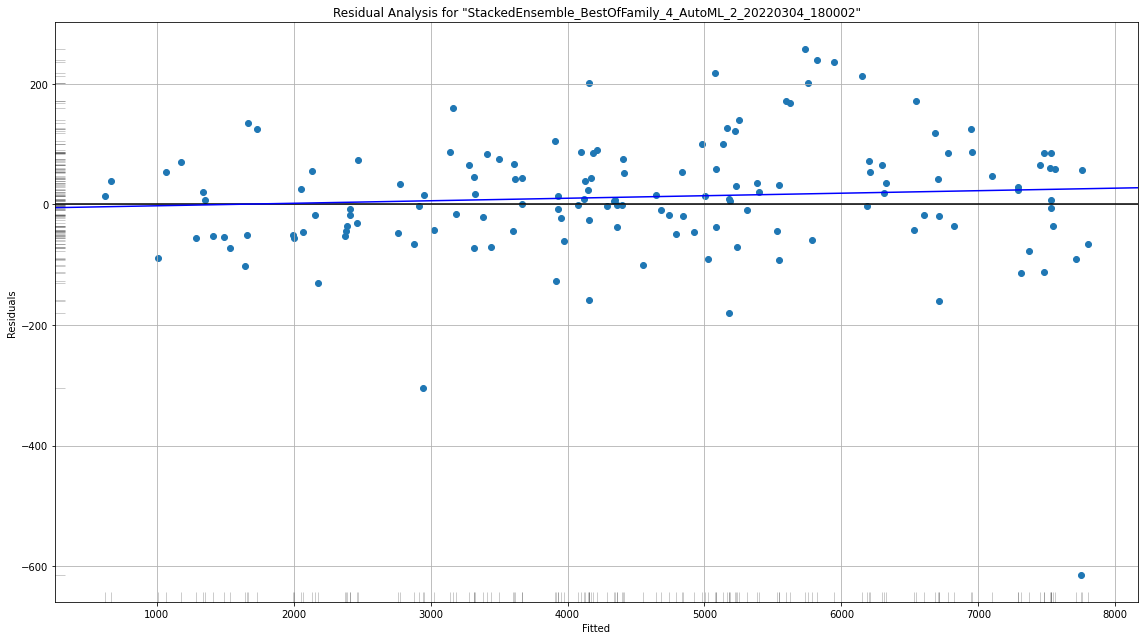

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

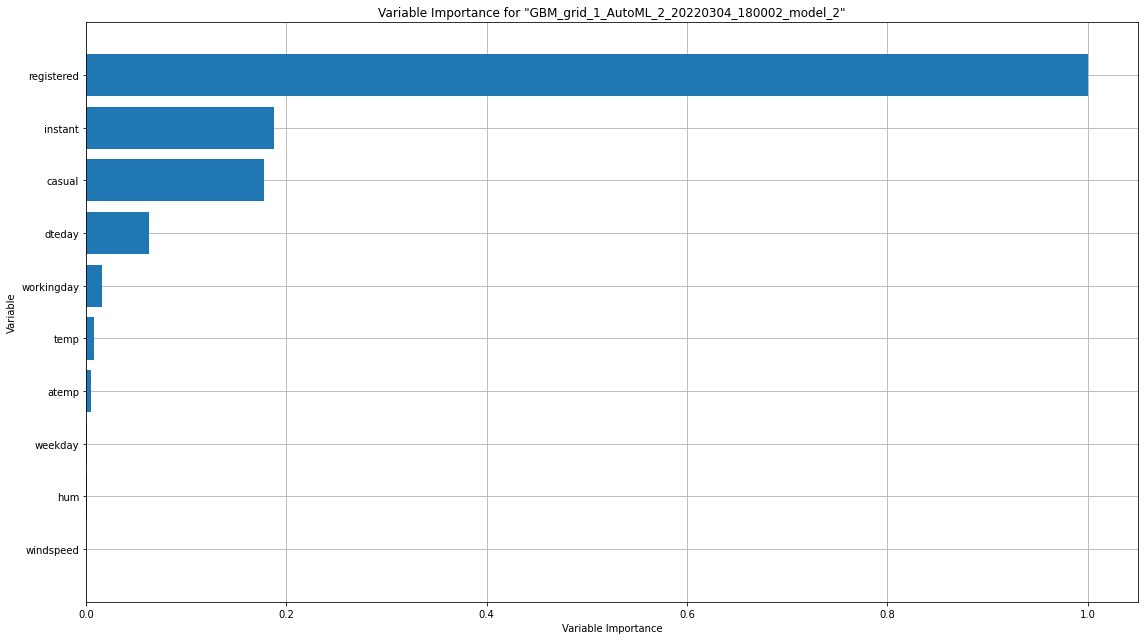

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

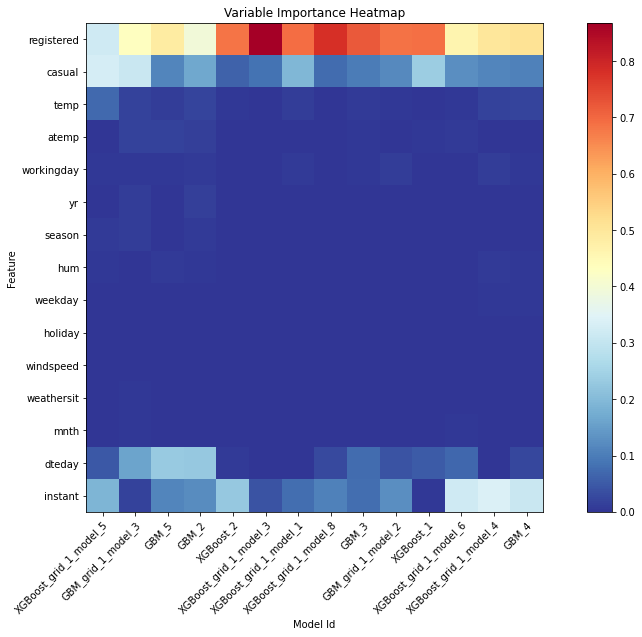

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

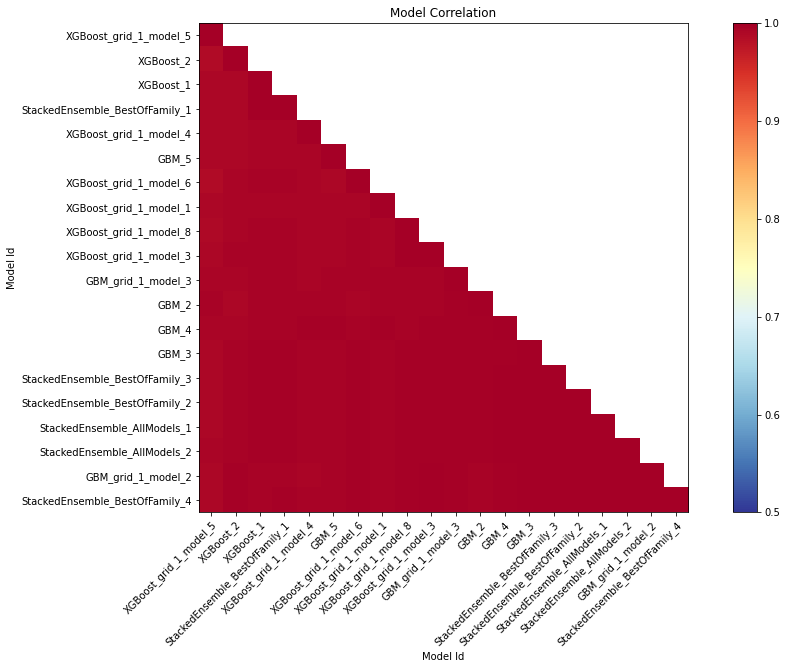

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

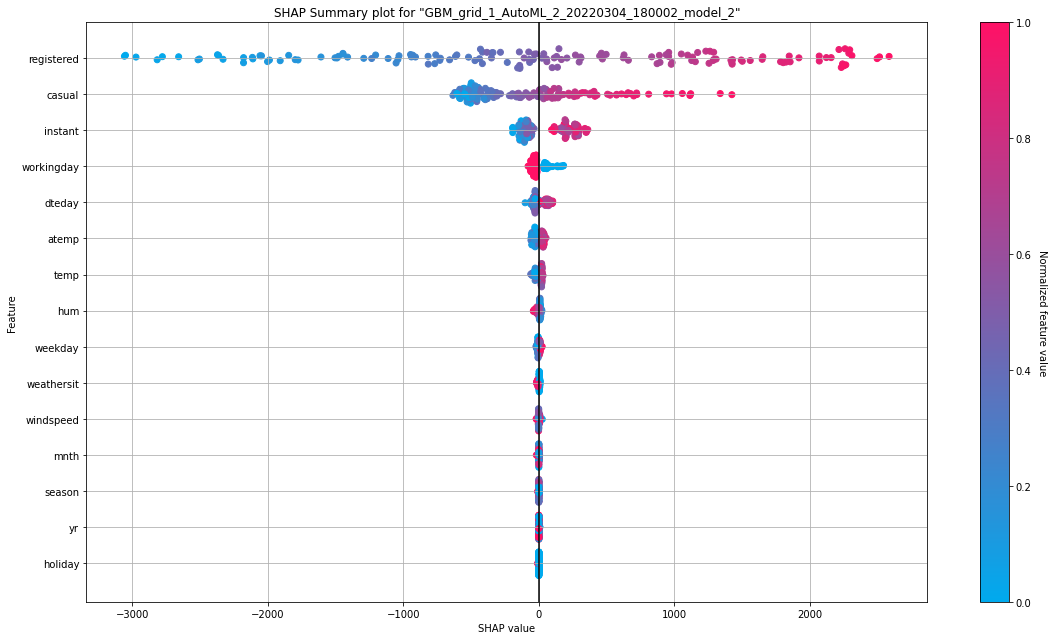

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

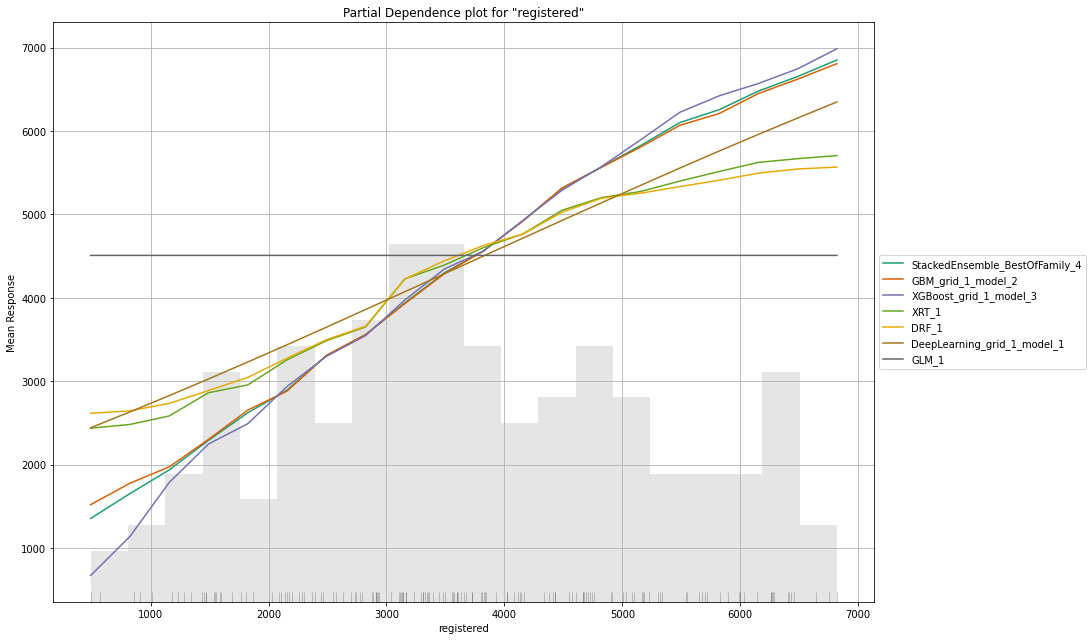

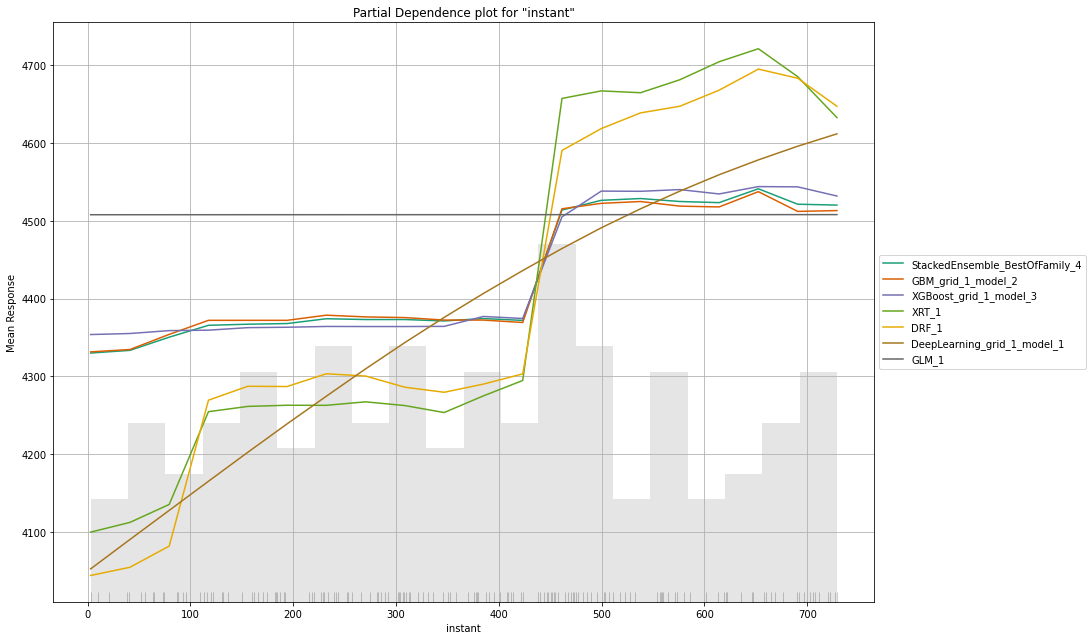

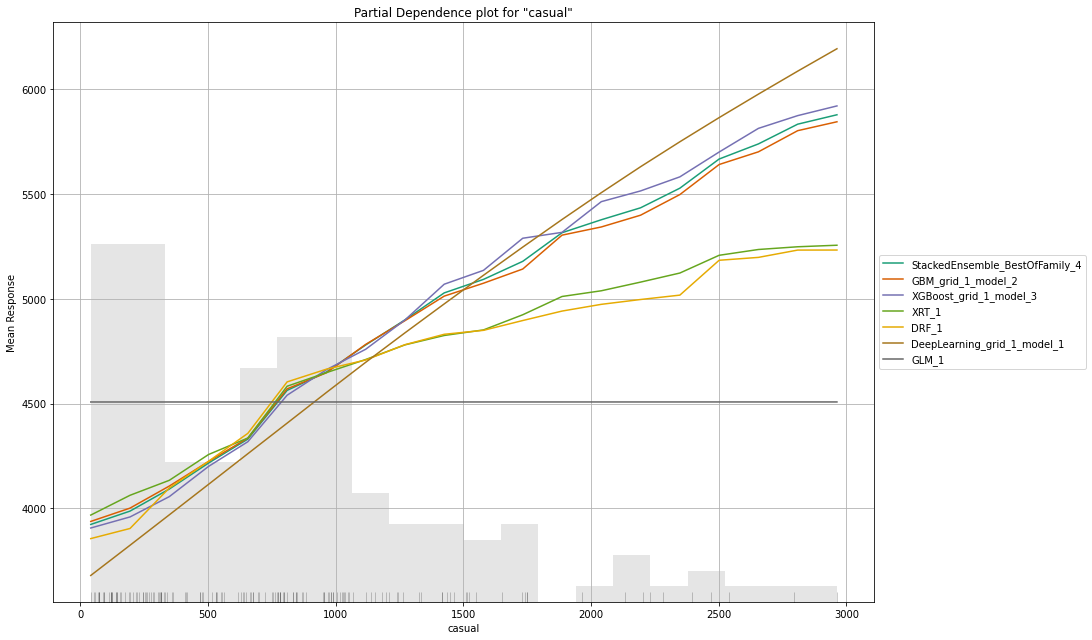

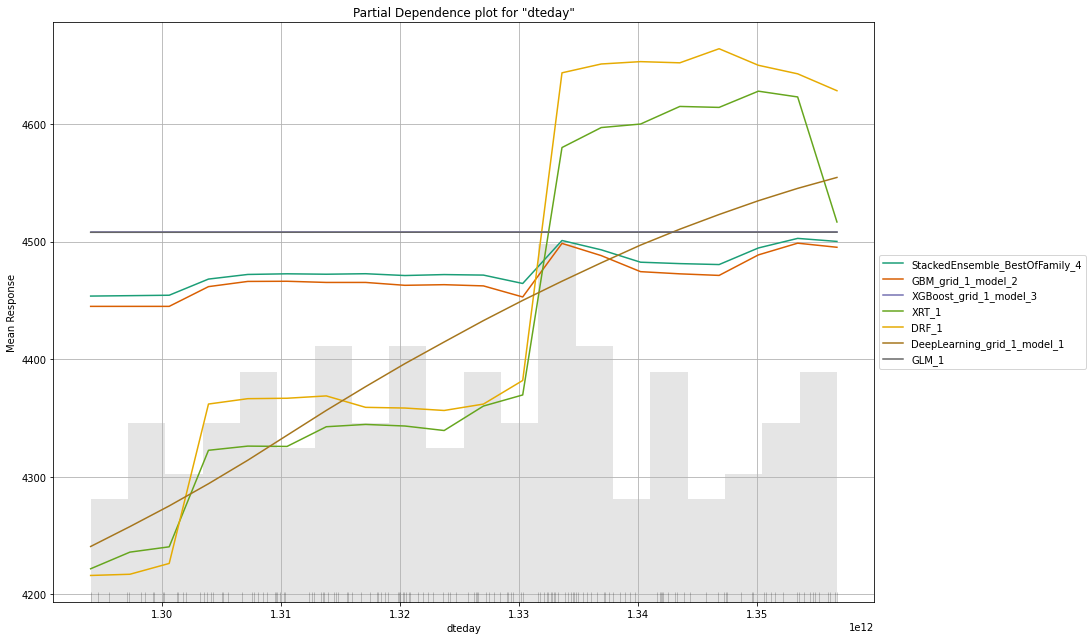

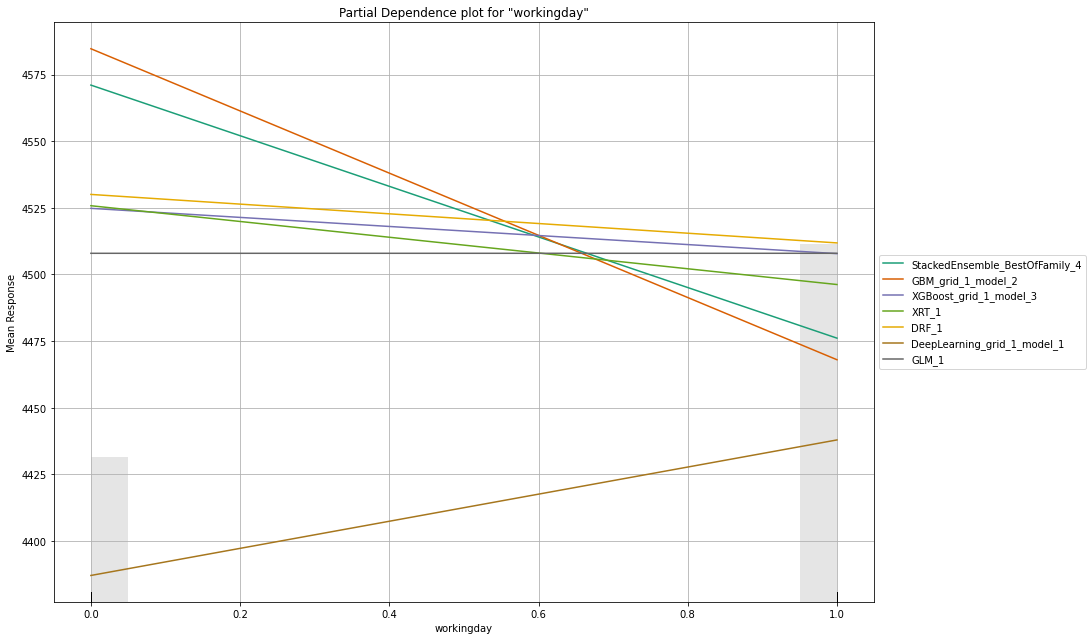

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

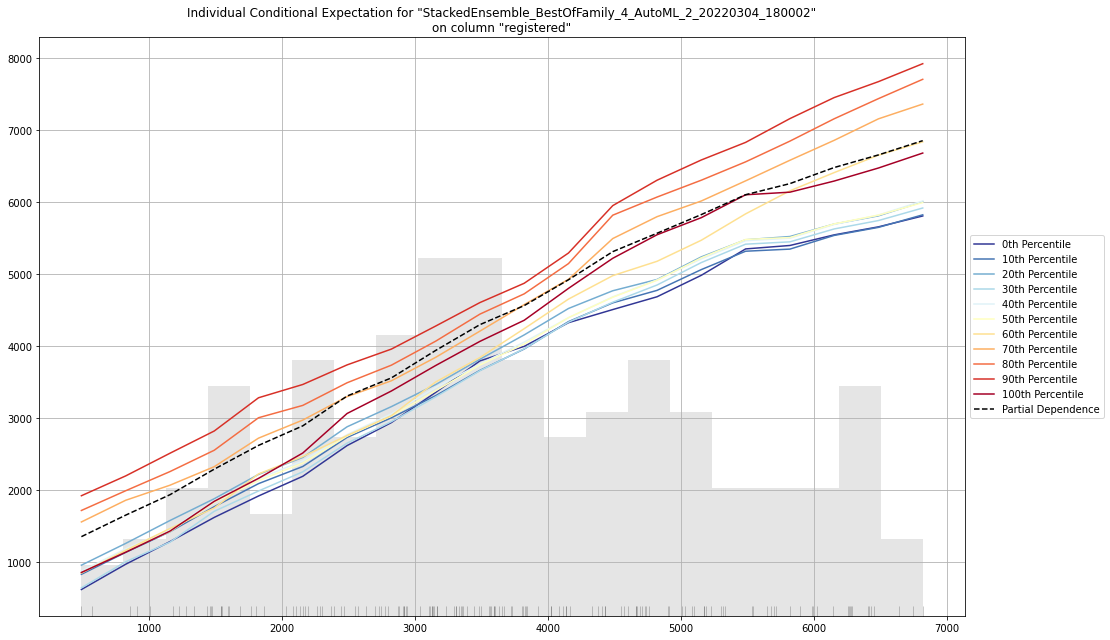

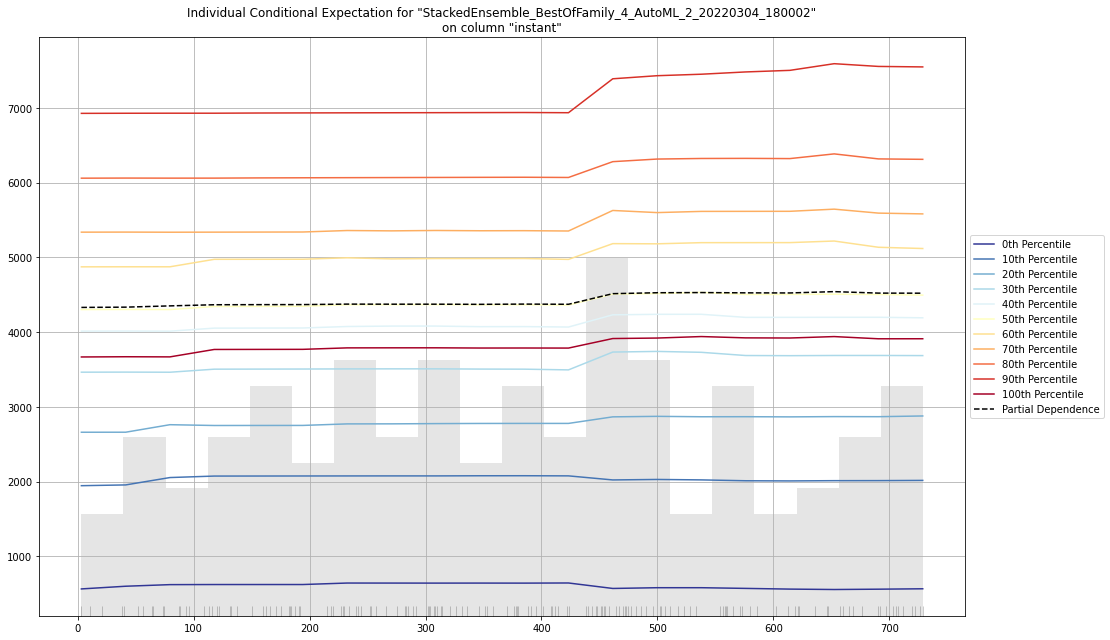

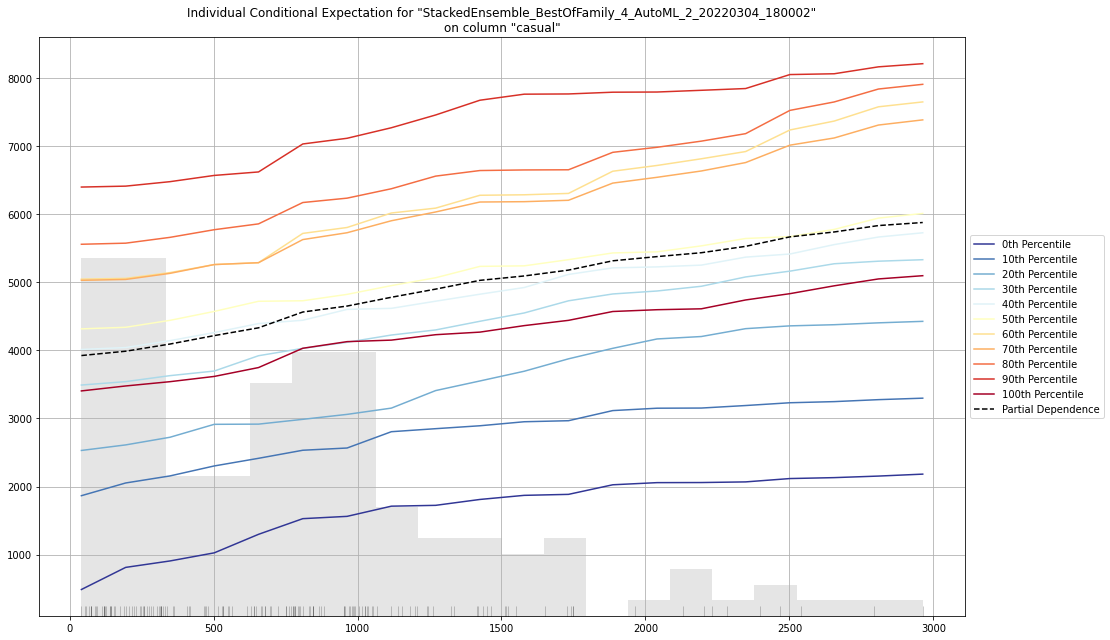

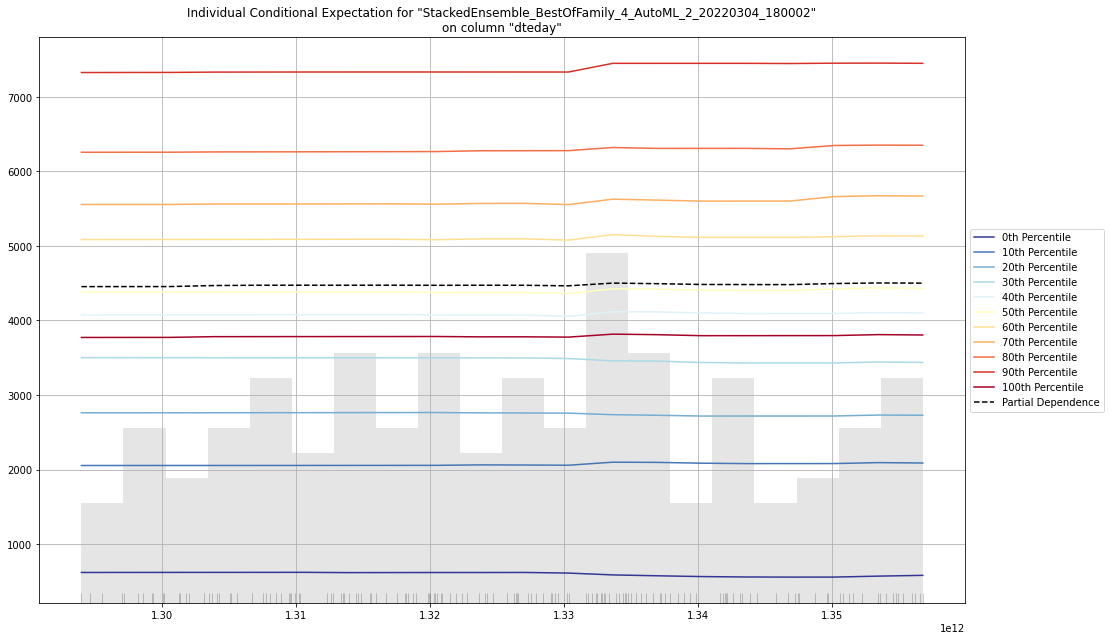

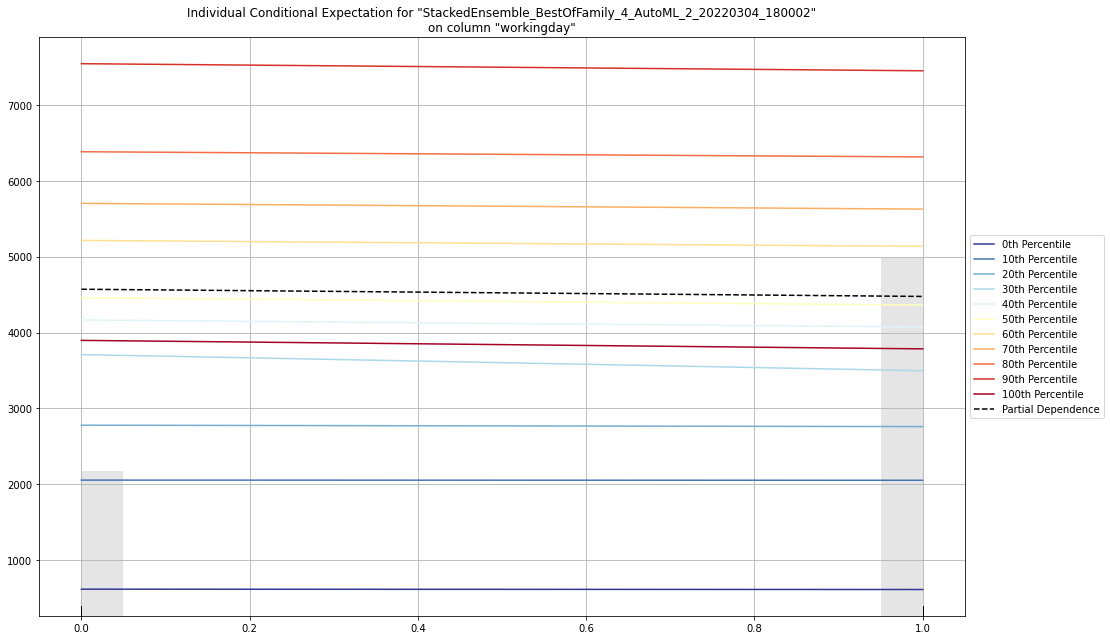

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

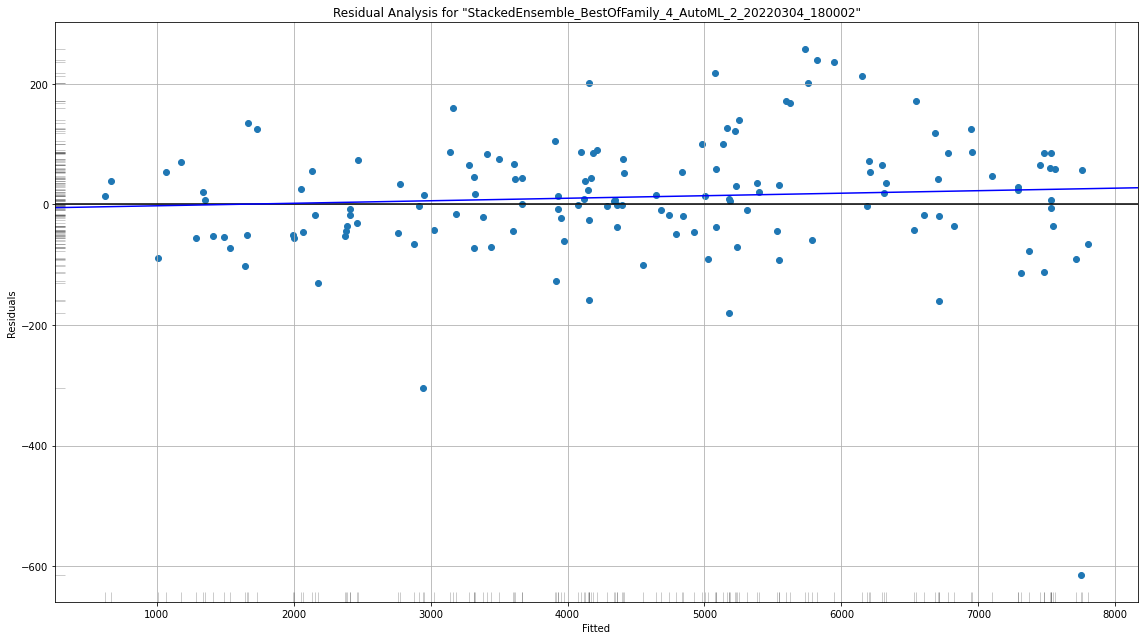

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

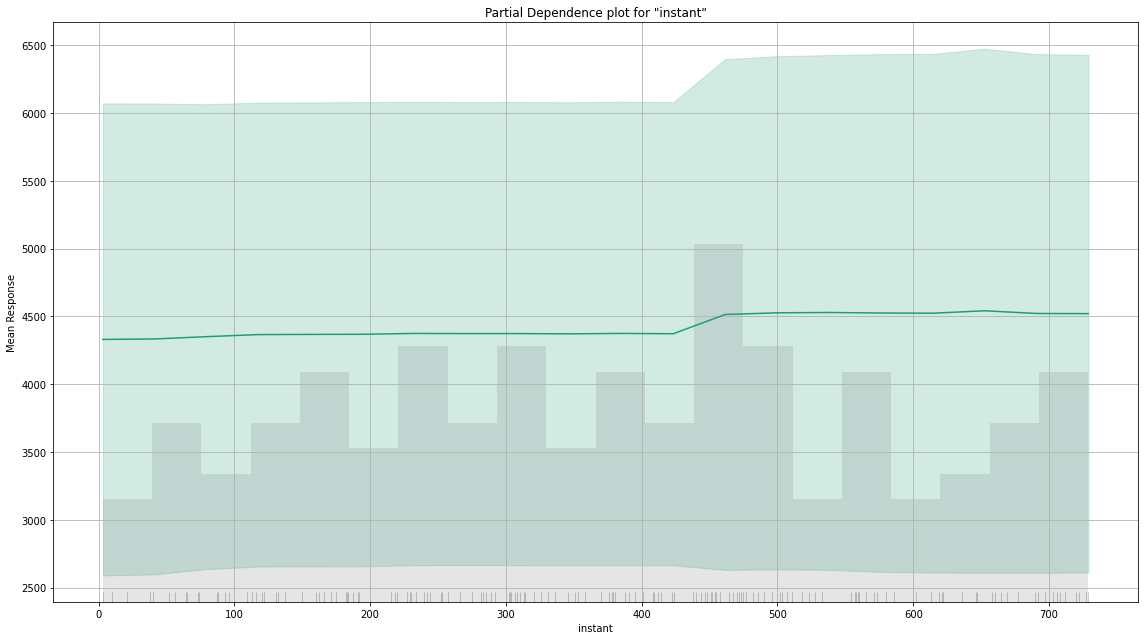

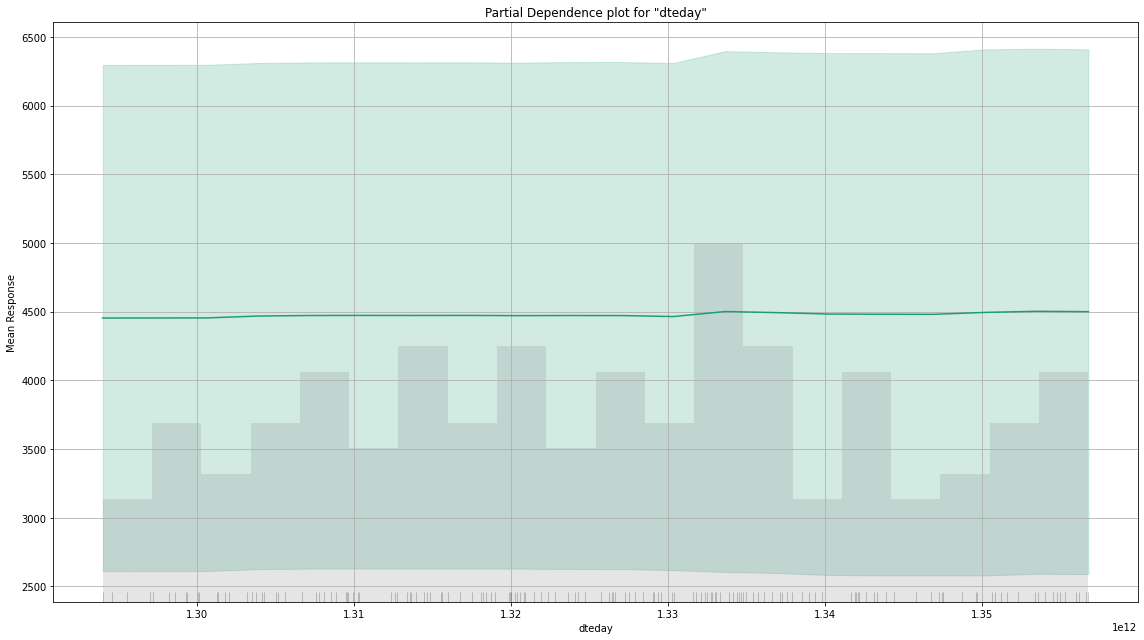

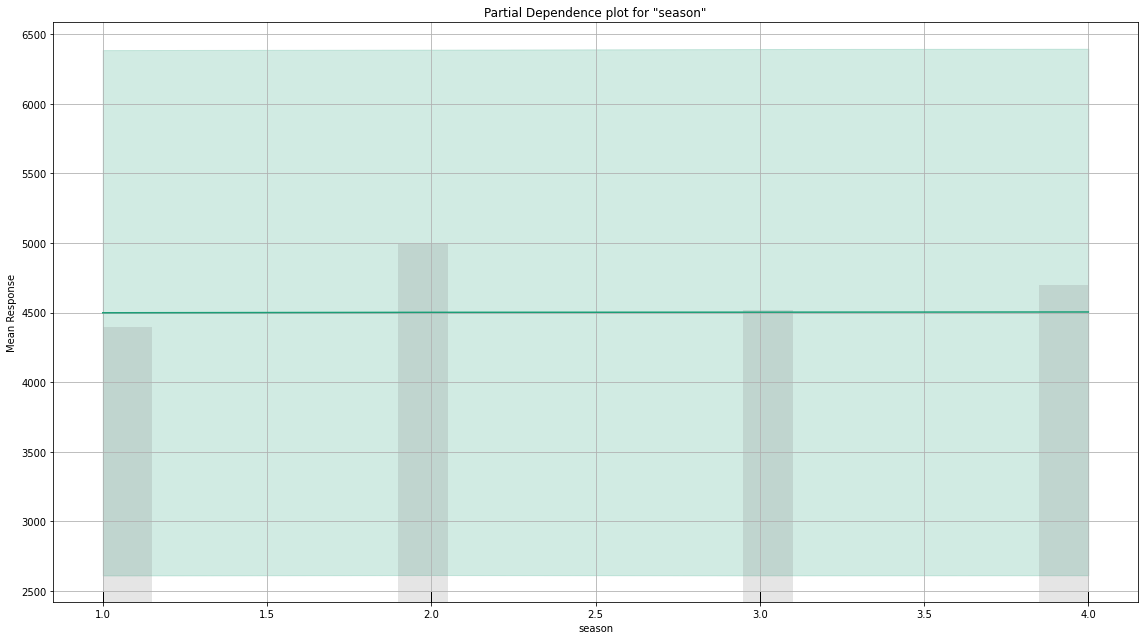

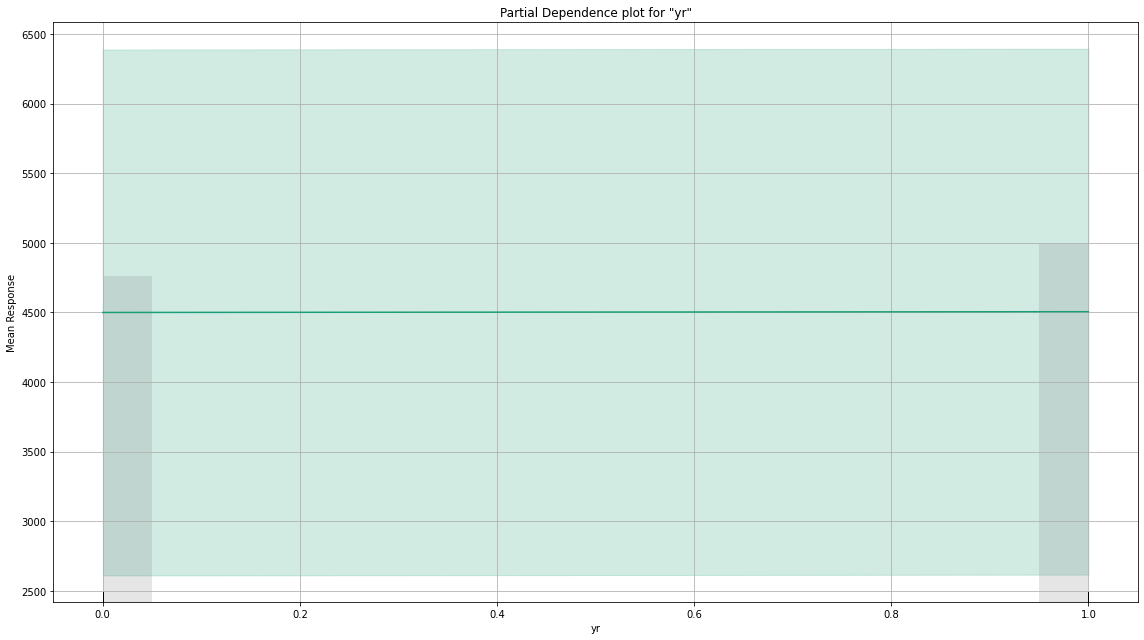

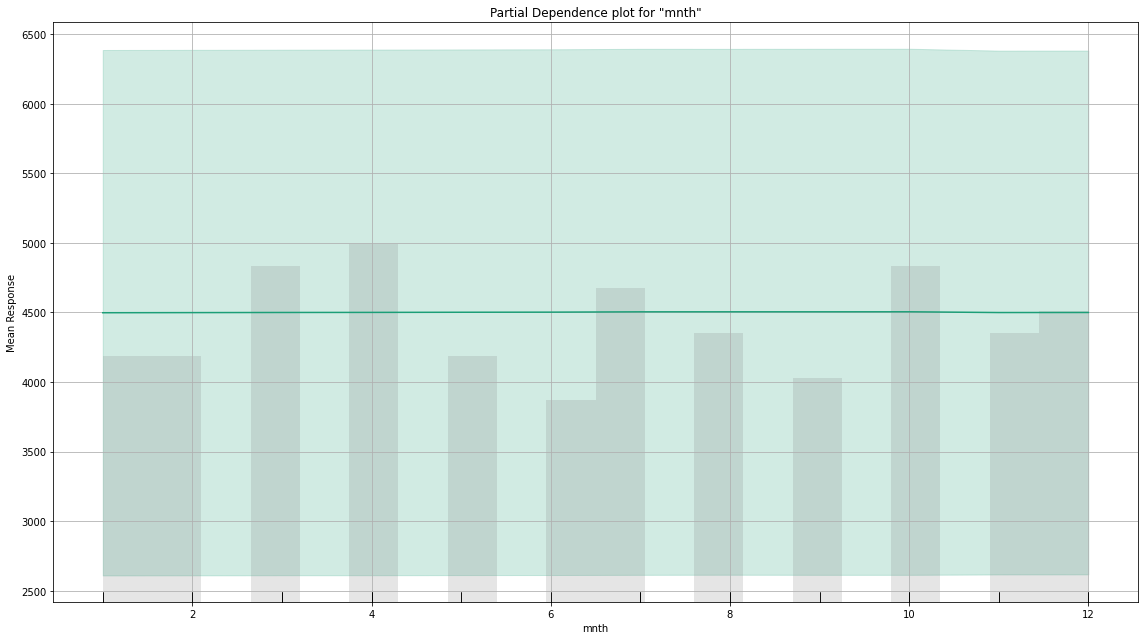

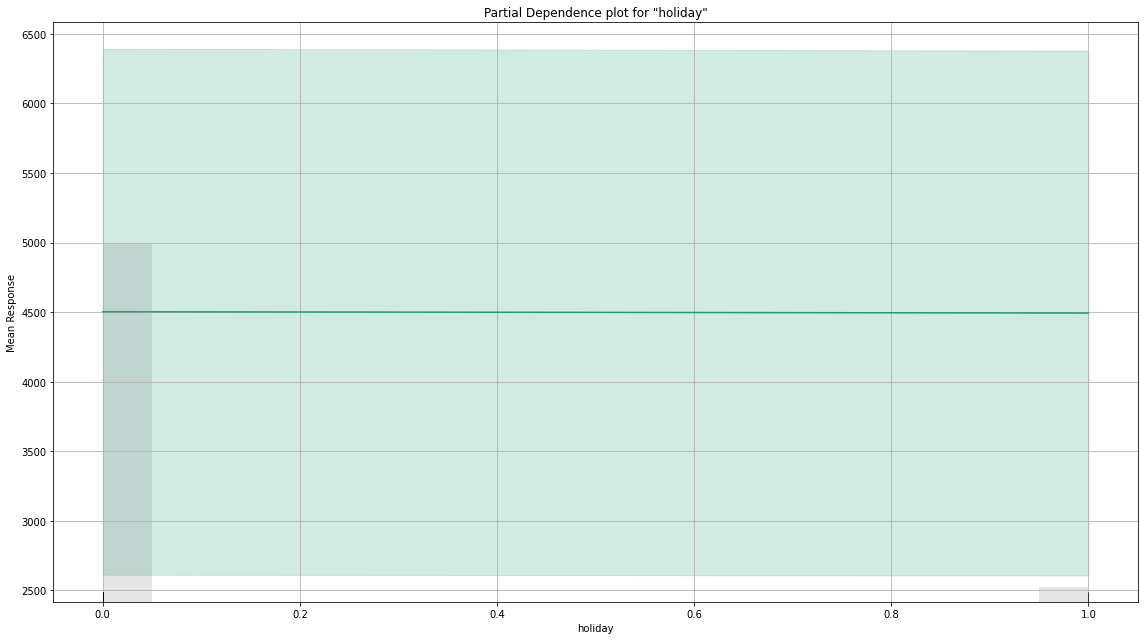

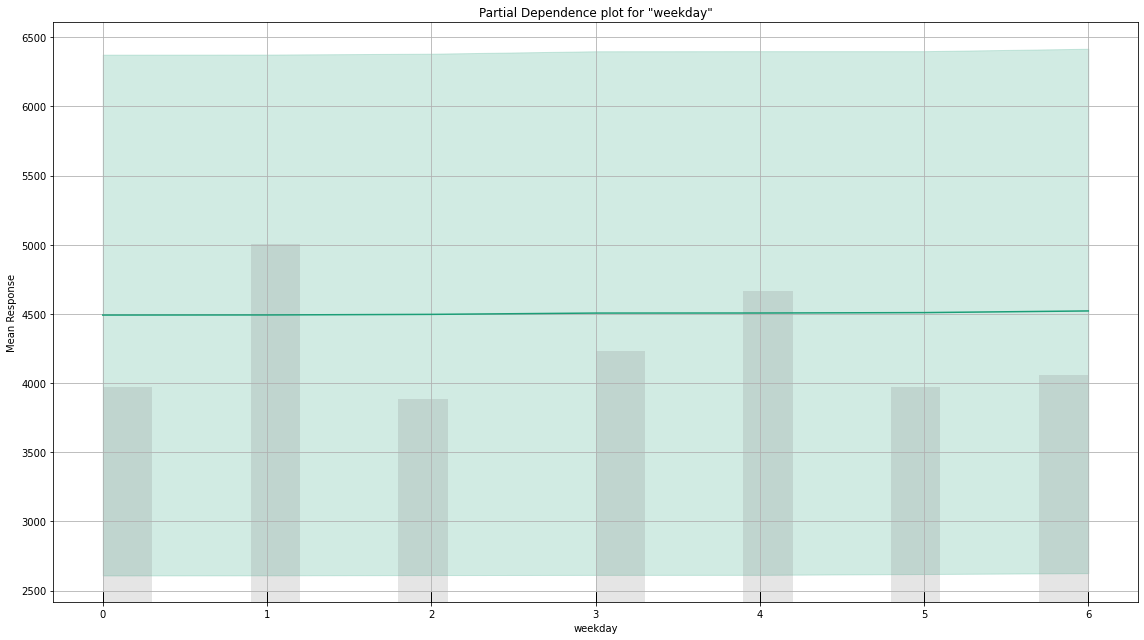

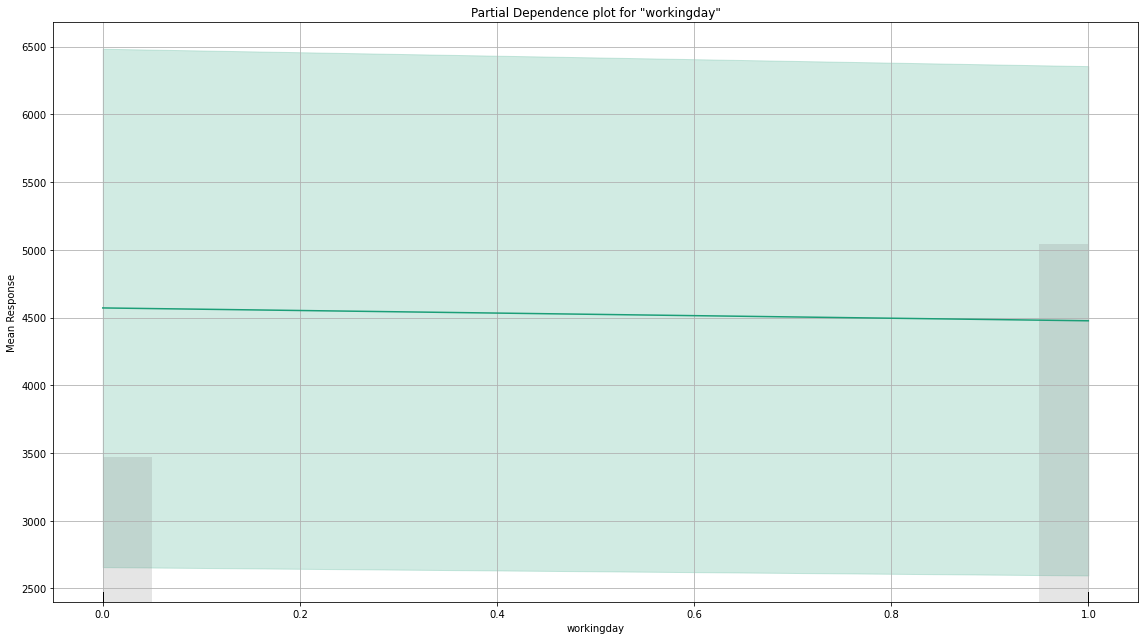

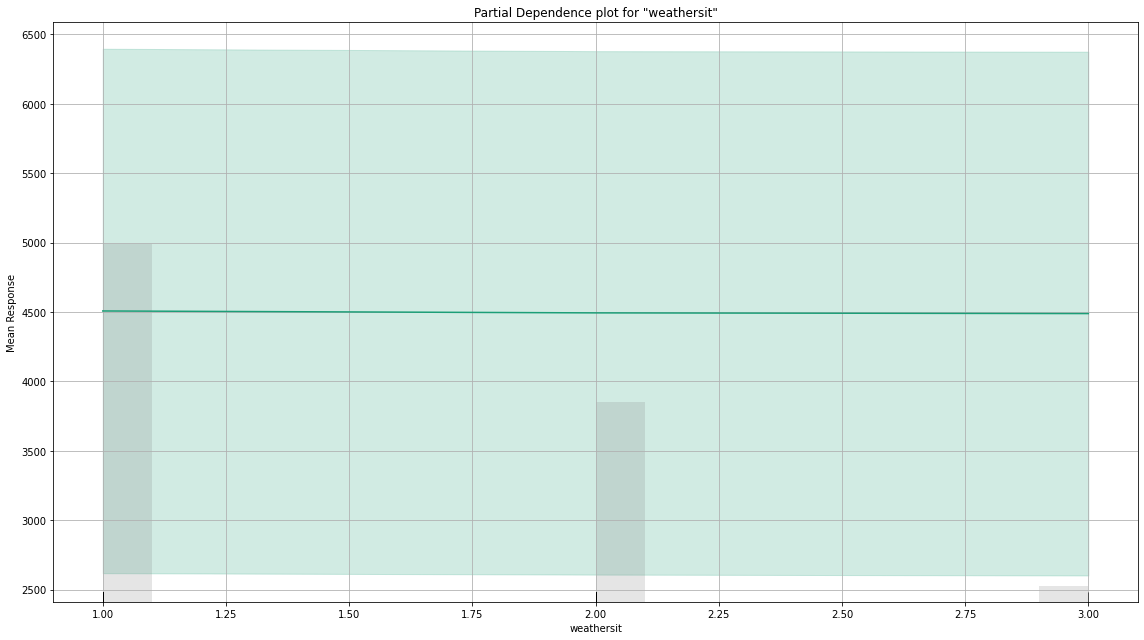

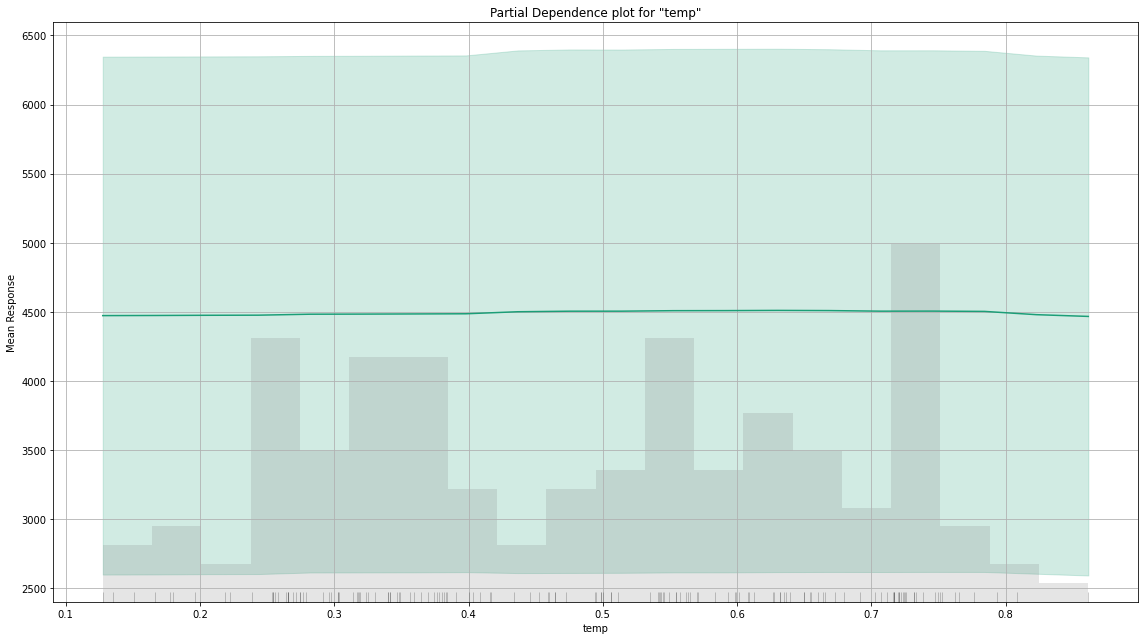

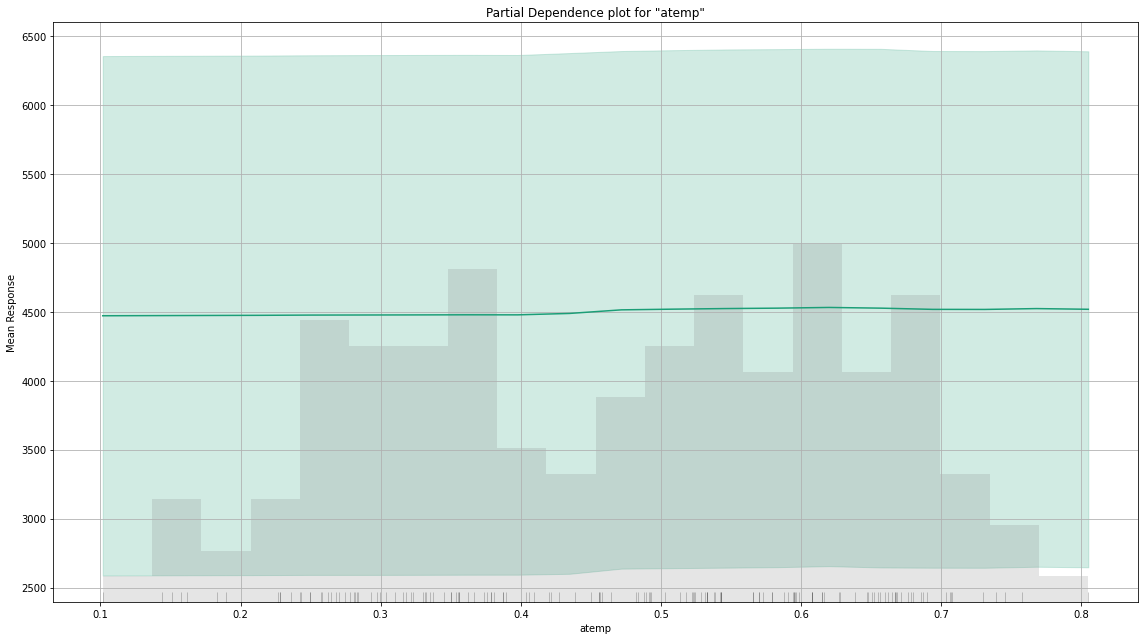

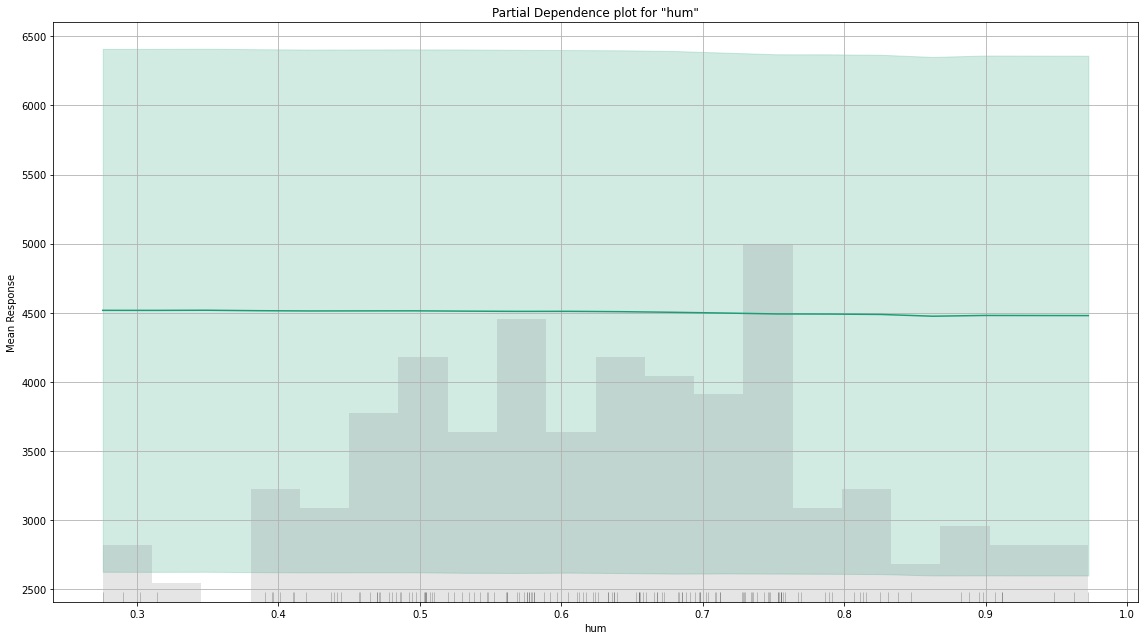

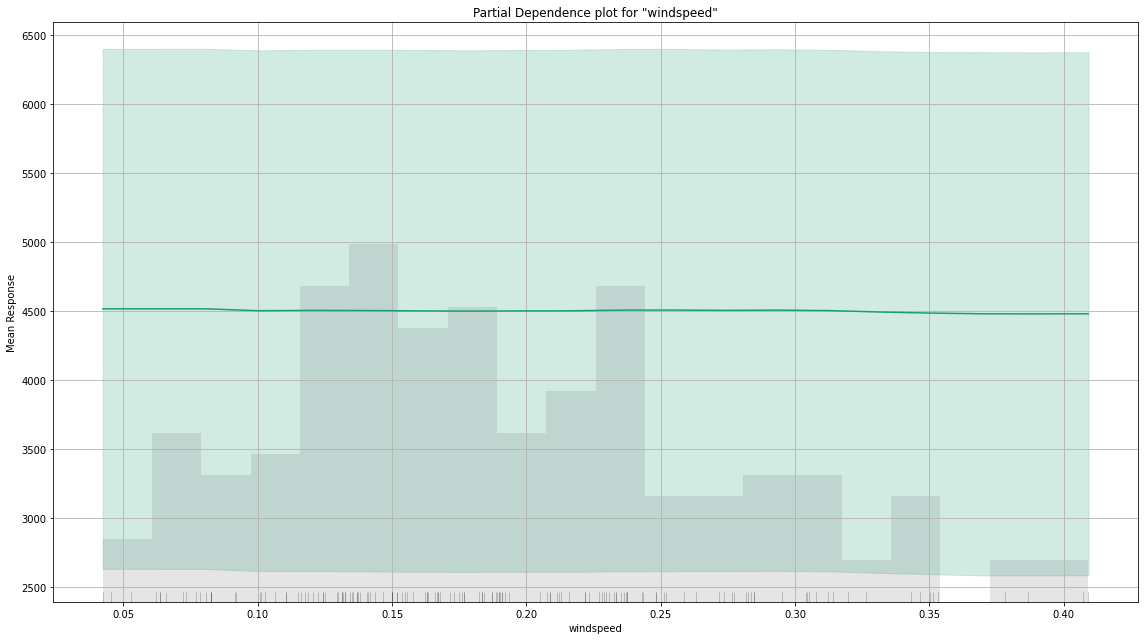

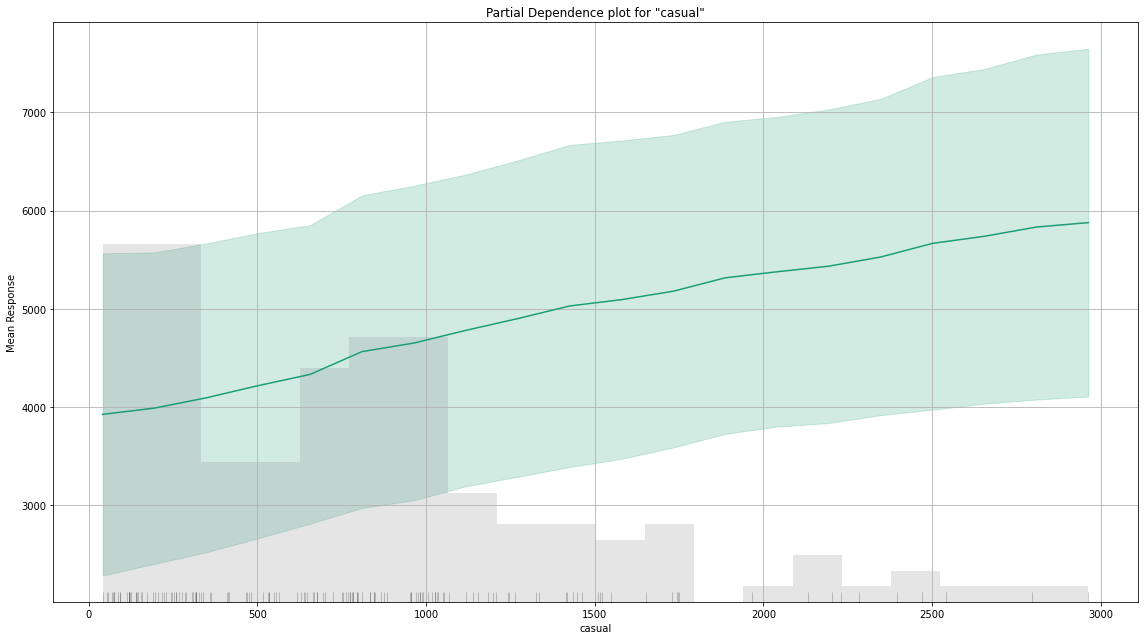

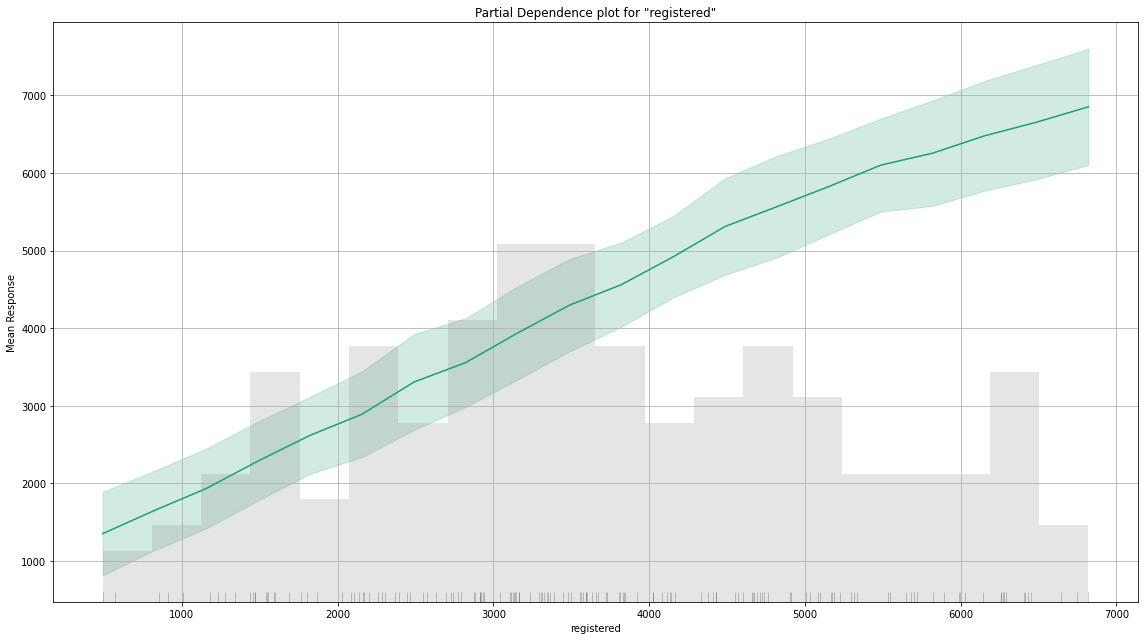

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

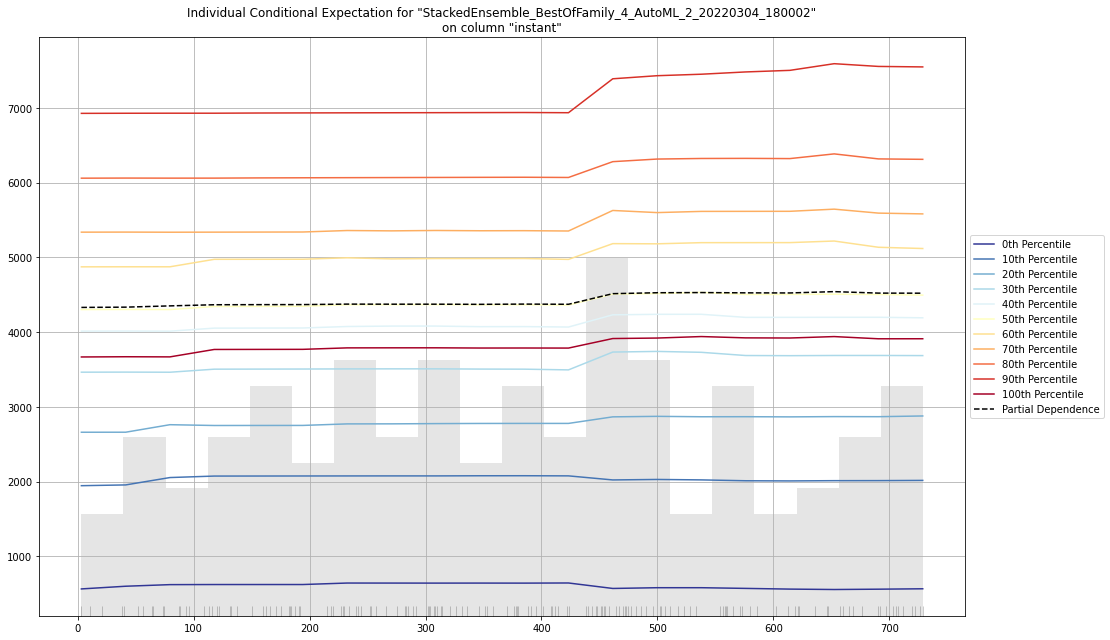

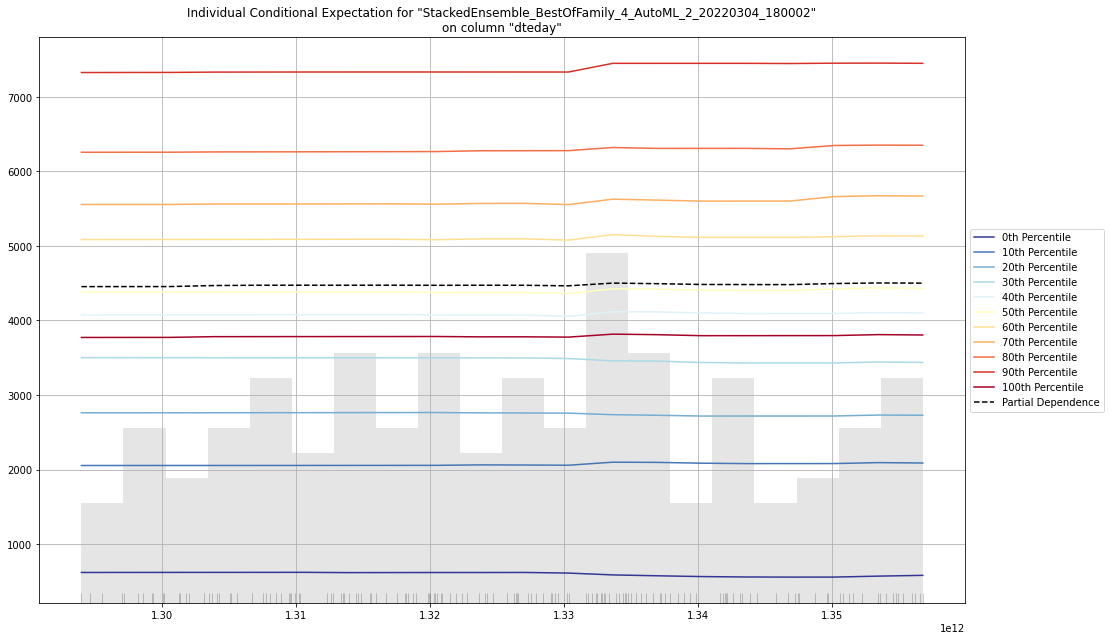

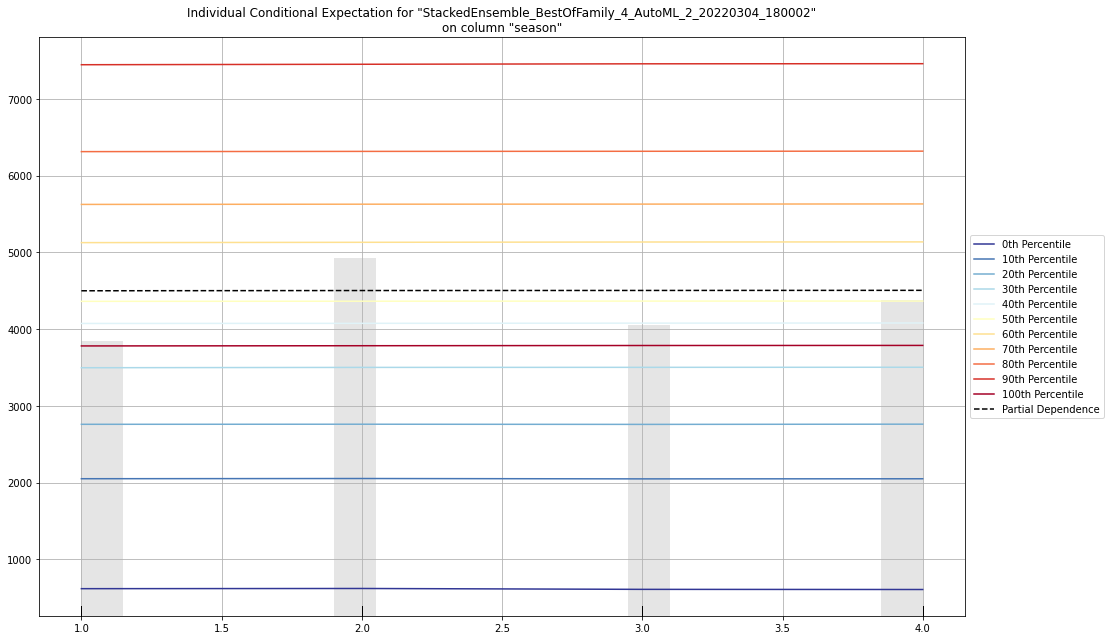

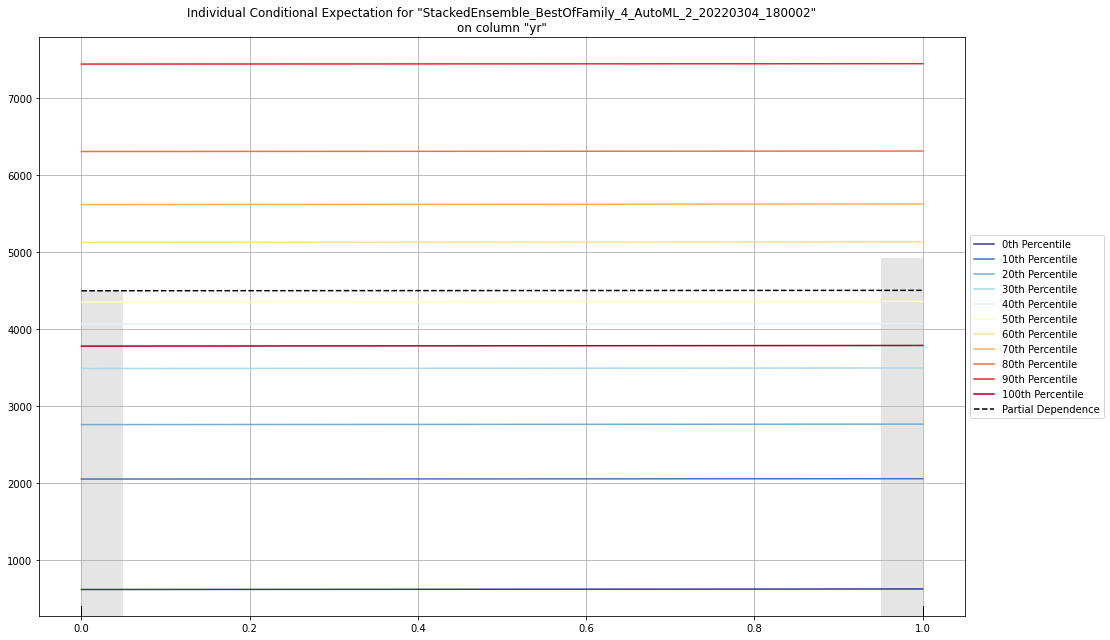

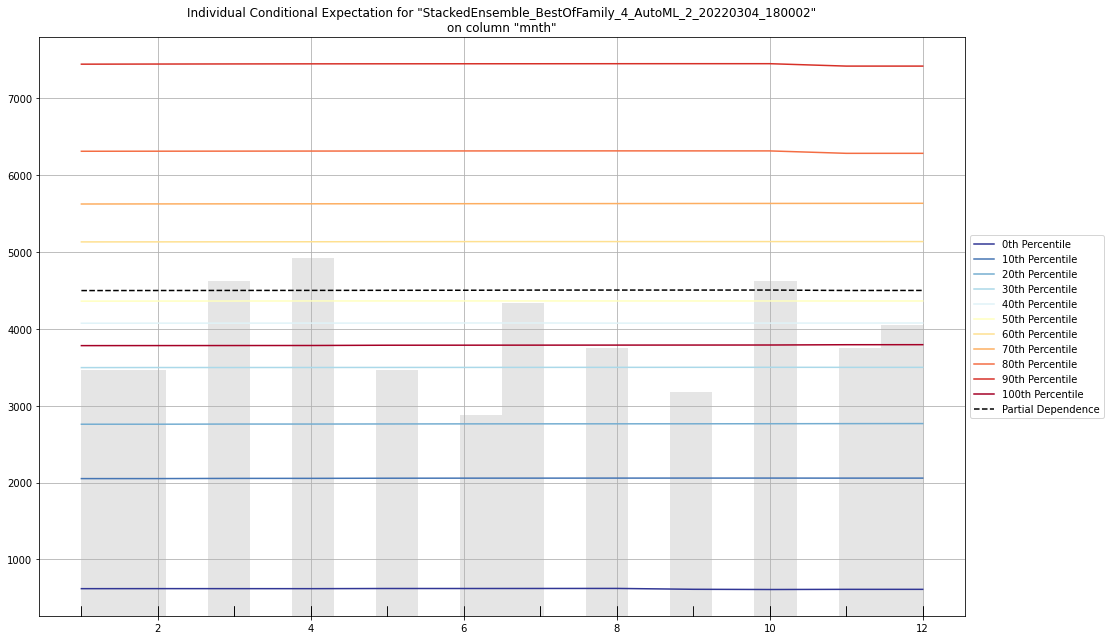

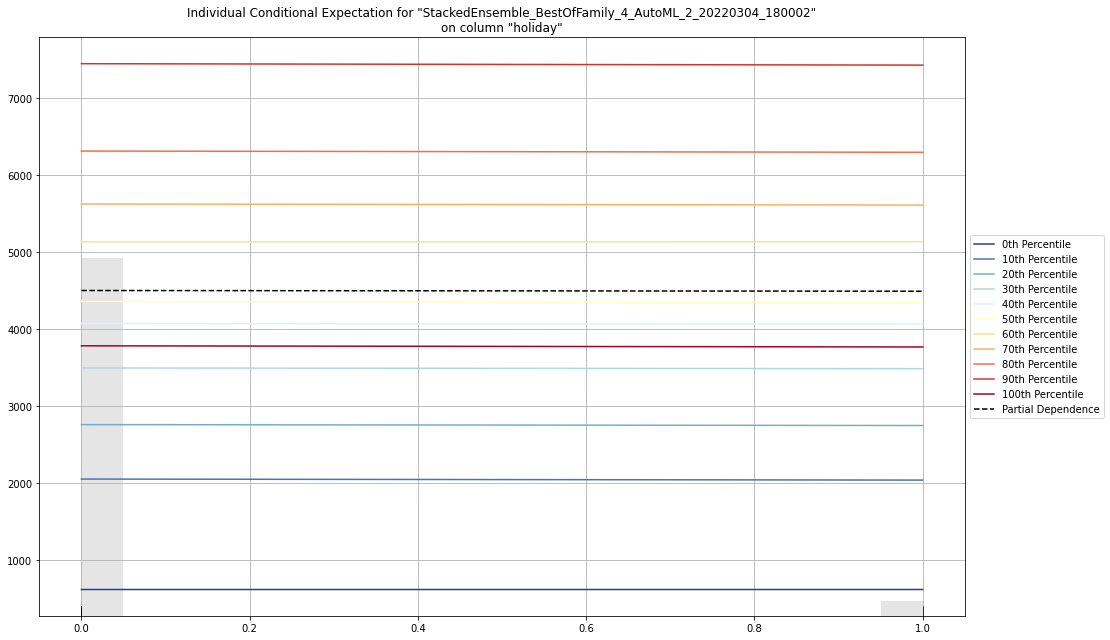

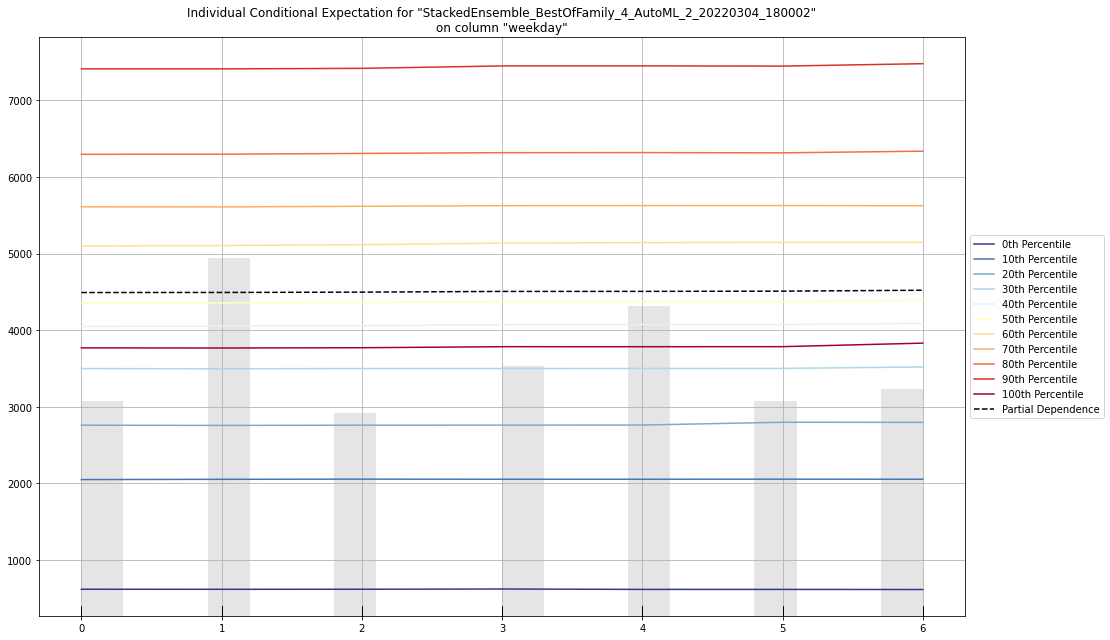

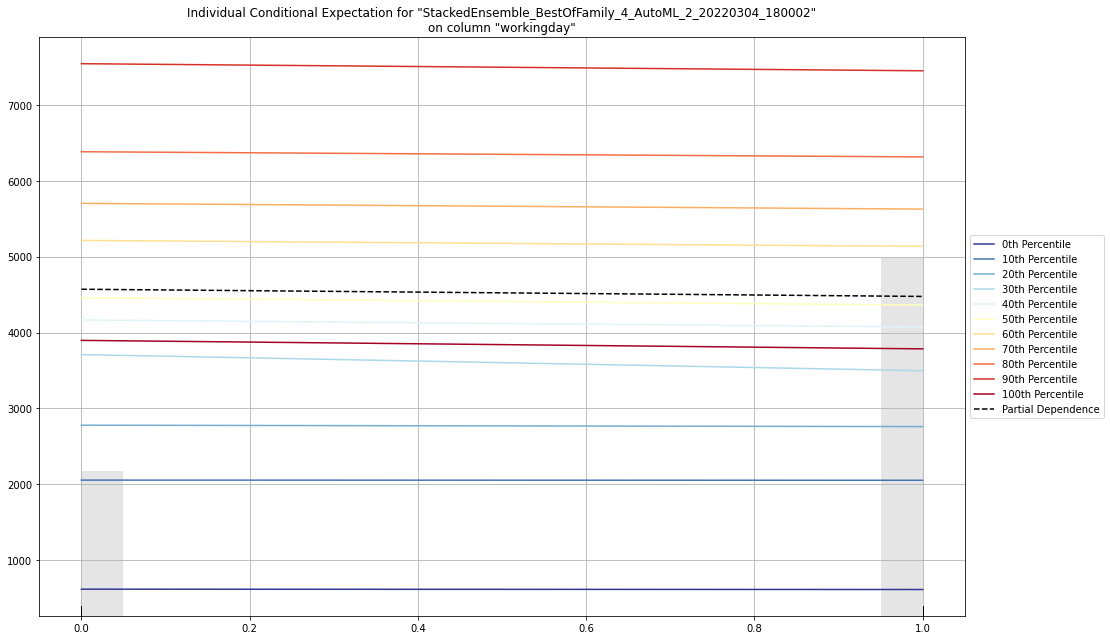

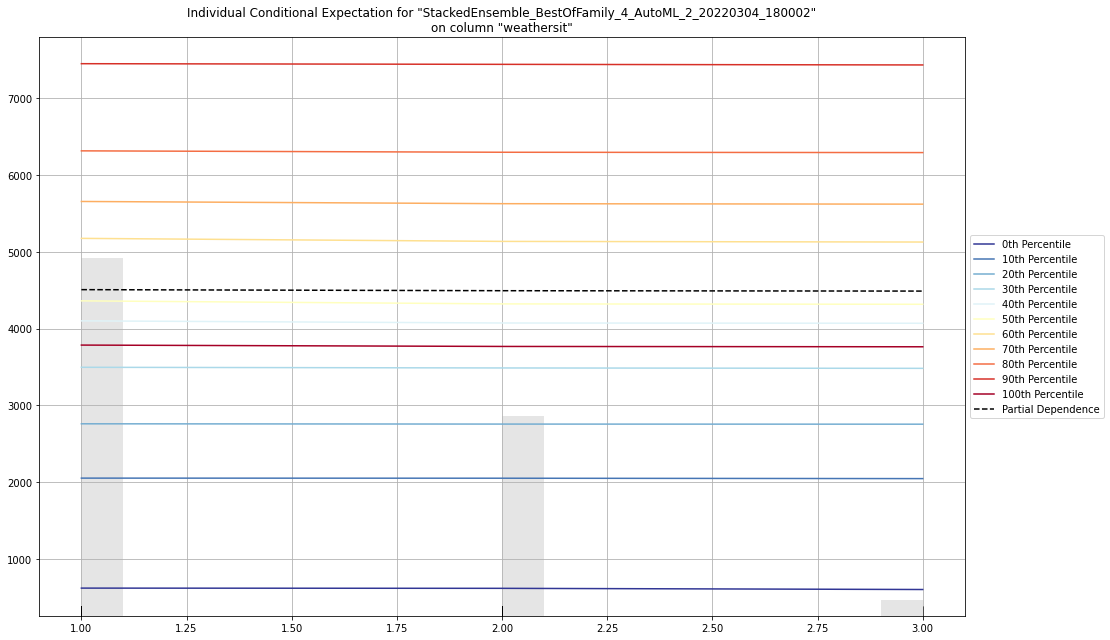

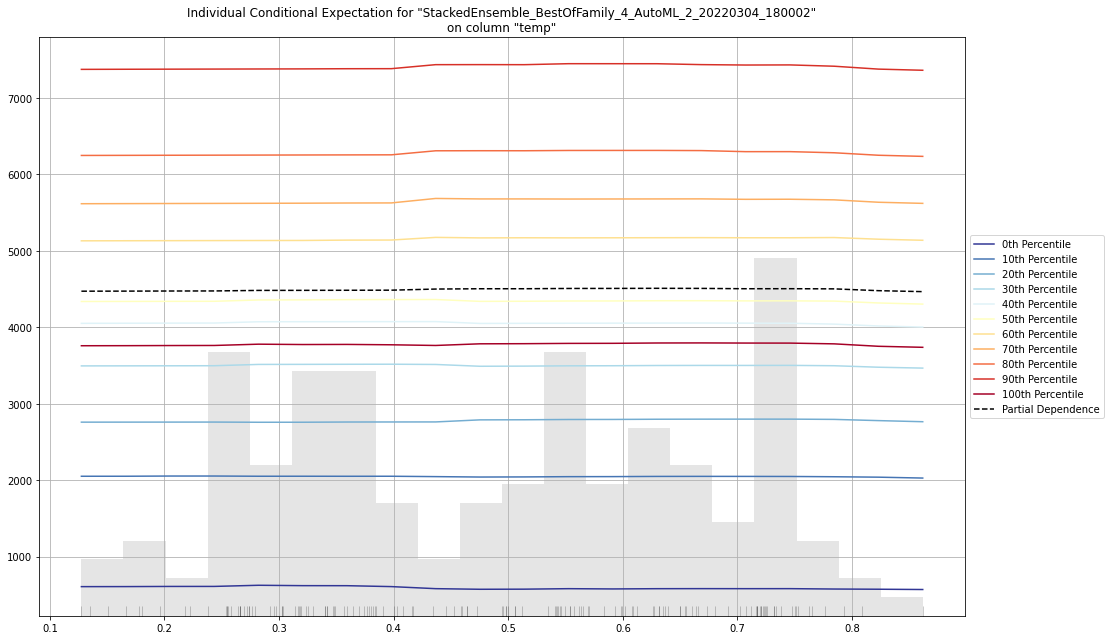

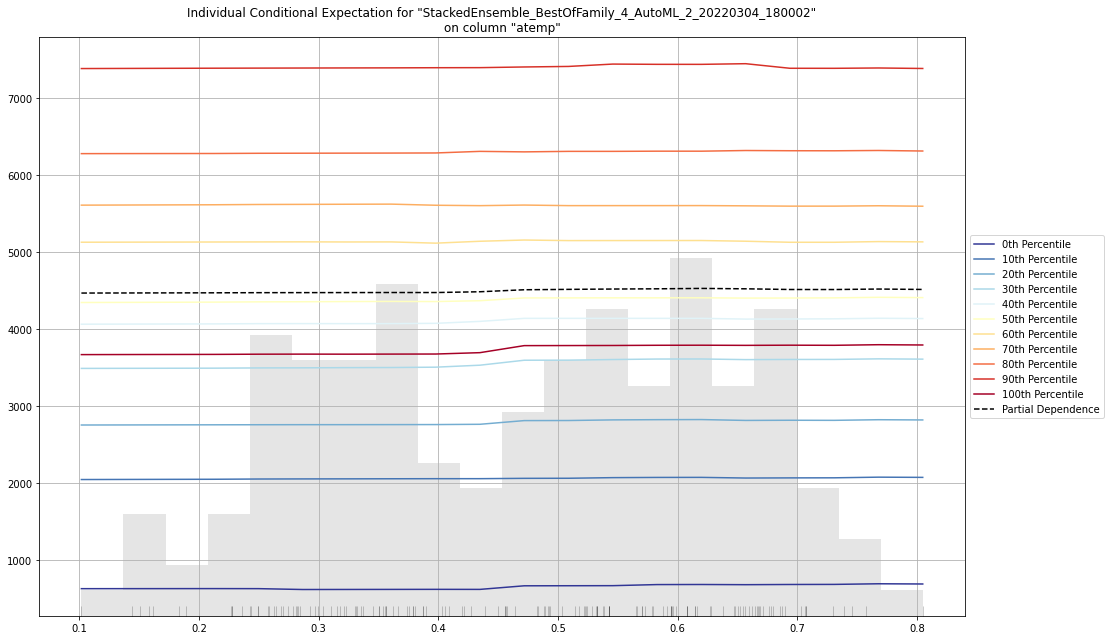

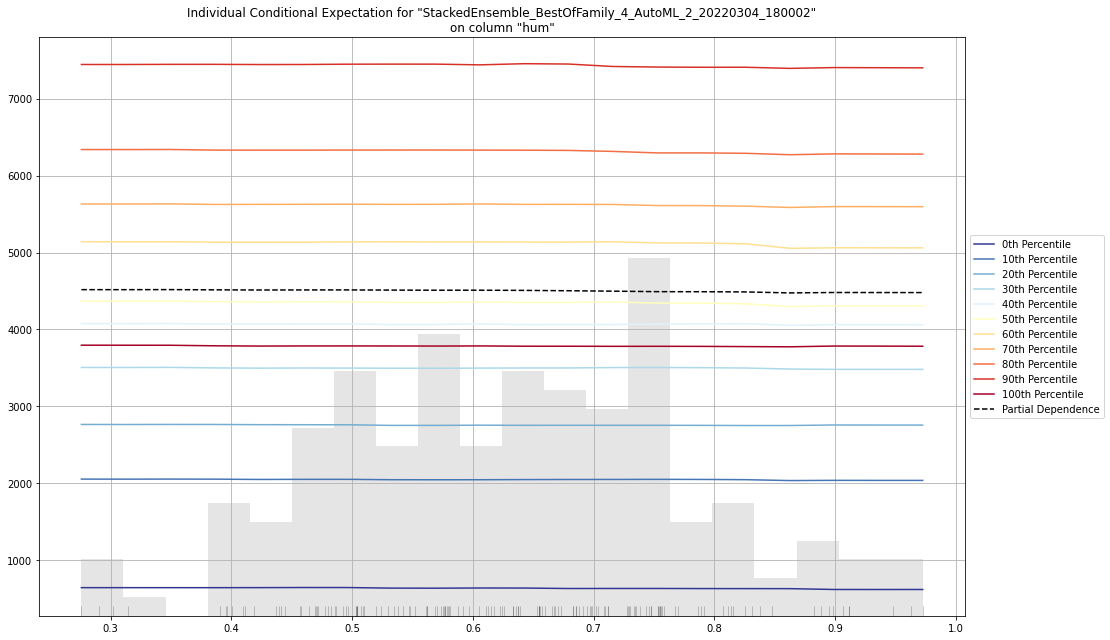

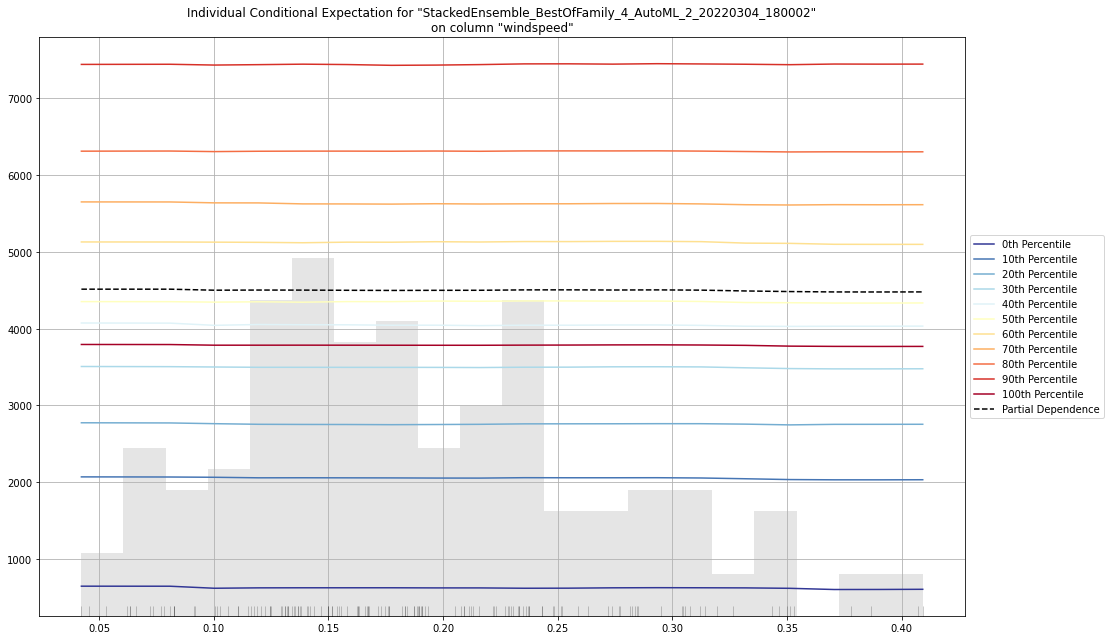

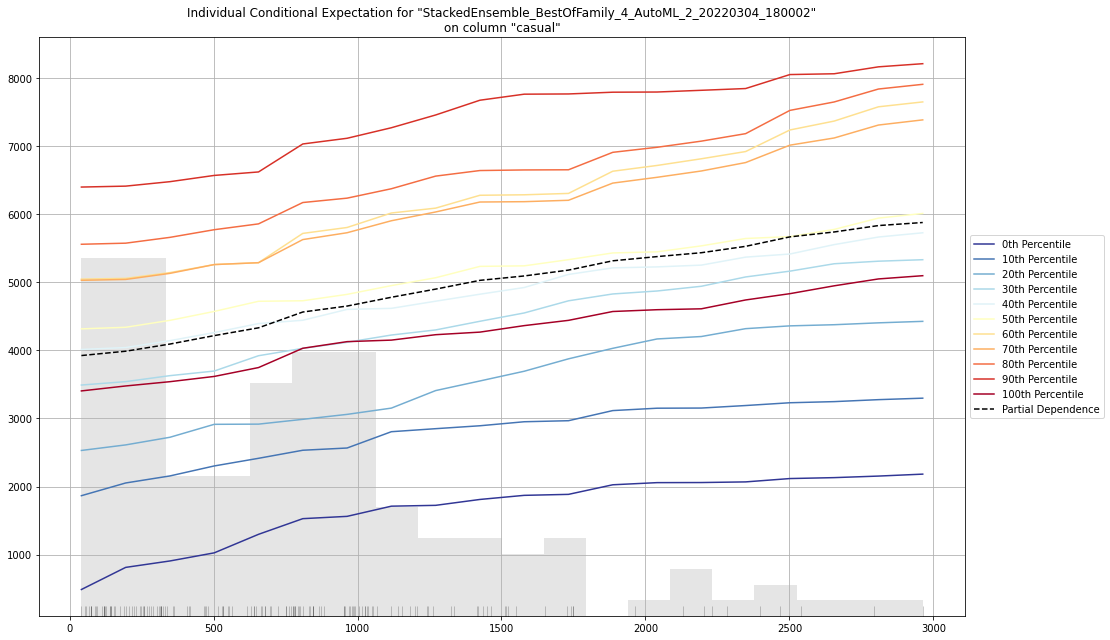

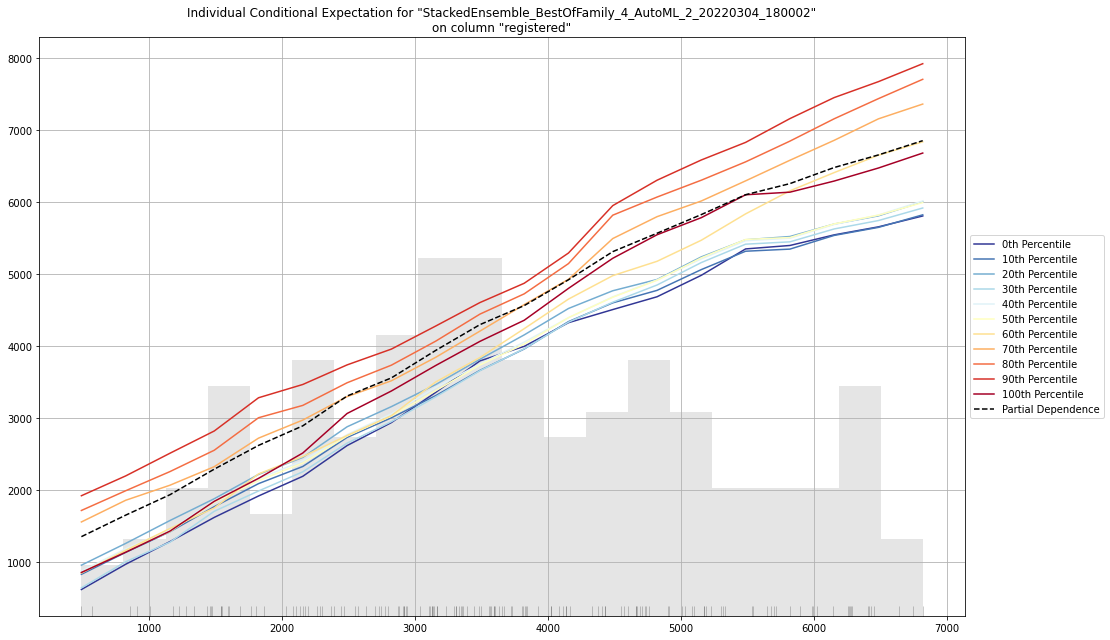

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import data
f = "/content/day.csv"
df = h2o.import_file(f)

# Reponse column
y = "cnt"

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

# Explain a generic list of models
# use h2o.explain as follows:
# exl = h2o.explain(model_list, test)

#       1. loc             : numeric % McCabe's line count of code
#       2. v(g)            : numeric % McCabe "cyclomatic complexity"
#       3. ev(g)           : numeric % McCabe "essential complexity"
#       4. iv(g)           : numeric % McCabe "design complexity"
#       5. n               : numeric % Halstead total operators + operands
#       6. v               : numeric % Halstead "volume"
#       7. l               : numeric % Halstead "program length"
#       8. d               : numeric % Halstead "difficulty"
#       9. i               : numeric % Halstead "intelligence"
#      10. e               : numeric % Halstead "effort"
#      11. b               : numeric % Halstead 
#      12. t               : numeric % Halstead's time estimator
#      13. lOCode          : numeric % Halstead's line count
#      14. lOComment       : numeric % Halstead's count of lines of comments
#      15. lOBlank         : numeric % Halstead's count of blank lines
#      16. lOCodeAndComment: numeric
#      17. uniq_Op         : numeric % unique operators
#      18. uniq_Opnd       : numeric % unique operands
#      19. total_Op        : numeric % total operators
#      20. total_Opnd      : numeric % total operands
#      21: branchCount     : numeric % of the flow graph
#      22. defects         : {false,true} % module has/has not one or more 
#                                         % reported defects


## 3. Interpretation for Day data set

Interpretation for Day data set 
- 1.Ensumble modeled stacked tree model give good result.
- 2.Registered users are using bike rent more than casual users on daily basis.
- 3.temparature,season,wether is also influencing bike rental user counts.
- 4.In weekday users are taking more than Workingday.
- 5.instant users also influing total users count.
- 6.from residual analysis all are bavaving random nature except some of them.

## 4. H2OGradientBoostingEstimator

In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
h2o.init()

# Import the prostate dataset into H2O:
prostate = h2o.import_file("/content/day.csv")

# Set the predictors and response; set the factors:
#prostate["CAPSULE"] = prostate["CAPSULE"].asfactor()
predictors = ['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
response = "cnt"

# Build and train the model:
pros_gbm = H2OGradientBoostingEstimator(nfolds=5,
                                        seed=1111,
                                        keep_cross_validation_predictions = True)
pros_gbm.train(x=predictors, y=response, training_frame=prostate)

# Eval performance:
perf = pros_gbm.model_performance()

# Generate predictions on a test set (if necessary):
pred = pros_gbm.predict(prostate)

# Extract feature interactions:
feature_interactions = pros_gbm.feature_interaction()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         16 mins 32 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.3
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_h7v5u6
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.148 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.12 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Eval performance:
perf


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 140556.8342076669
RMSE: 374.90910126011465
MAE: 266.56865327889875
RMSLE: 0.2081184624132346
Mean Residual Deviance: 140556.8342076669


In [ ]:
# Generate predictions on a test set (if necessary):
pred


predict 
 
 
 1300.57 
 1243.38 
 1449.43 
 1521.4 
 1610.27 
 1547.12 
 1543.26 
 1163.11 
 920.621 
 1404.16

In [ ]:
# Extract feature interactions:
feature_interactions


Interaction Depth 0: 


interaction          gain  fscore    wfscore  average_wfscore  \
0         dteday  1.427676e+09    99.0  27.112175         0.273860   
1            hum  7.722569e+08   141.0  31.789330         0.225456   
2        holiday  2.490052e+07    11.0   4.678523         0.425320   
3        instant  1.231276e+09    95.0  39.730506         0.418216   
4     weathersit  2.630713e+08    52.0  17.777018         0.341866   
5     workingday  7.713250e+07    35.0   4.135431         0.118155   
6        weekday  1.467094e+08    60.0  13.815322         0.230255   
7          atemp  8.907909e+08   115.0  29.924761         0.260215   
8      windspeed  3.096727e+08   102.0  26.257182         0.257423   
9         season  2.875453e+07    13.0   2.660739         0.204672   
10          temp  1.880225e+09   116.0  42.232558         0.364074   
11          mnth  4.819775e+07    20.0   2.820793         0.141040   

    average_gain  expected_gain  gain_rank  fscore_rank  wfscore_rank  \
0   1.442097e+07   6.437115e+08        2.0          5.0           5.0   
1   5.476999e+06   1.750971e+08        5.0          1.0           3.0   
2   2.263684e+06   8.856334e+06       12.0         12.0           9.0   
3   1.296080e+07   5.599051e+08        3.0          6.0           2.0   
4   5.059063e+06   9.606271e+07        7.0          8.0           7.0   
5   2.203786e+06   8.050176e+06        9.0          9.0          10.0   
6   2.445157e+06   2.695471e+07        8.0          7.0           8.0   
7   7.746008e+06   3.176547e+08        4.0          3.0           4.0   
8   3.036007e+06   4.601171e+07        6.0          4.0           6.0   
9   2.211887e+06   6.960991e+06       11.0         11.0          12.0   
10  1.620884e+07   7.512359e+08        1.0          2.0           1.0   
11  2.409887e+06   7.287019e+06       10.0         10.0          11.0   

    avg_wfscore_rank  avg_gain_rank  expected_gain_rank  average_rank  \
0                5.0            2.0                 2.0      3.500000   
1                9.0            5.0                 5.0      4.666667   
2                1.0           10.0                 9.0      8.833333   
3                2.0            3.0                 3.0      3.166667   
4                4.0            6.0                 6.0      6.333333   
5               12.0           12.0                10.0     10.333333   
6                8.0            8.0                 8.0      7.833333   
7                6.0            4.0                 4.0      4.166667   
8                7.0            7.0                 7.0      6.166667   
9               10.0           11.0                12.0     11.166667   
10               3.0            1.0                 1.0      1.500000   
11              11.0            9.0                11.0     10.333333   

    average_tree_index  average_tree_depth  
0            20.484848            2.939394  
1            20.539007            2.957447  
2            34.181818            2.545455  
3            19.094737            2.210526  
4            15.711538            2.596154  
5            20.742857            3.628571  
6            25.283333            3.400000  
7            21.913043            3.052174  
8            24.088235            2.745098  
9            24.000000            2.692308  
10           21.250000            2.336207  
11           27.700000            3.450000


Interaction Depth 1: 


interaction          gain  fscore    wfscore  average_wfscore  \
0            mnth|season  2.821378e+07     5.0   0.778386         0.155677   
1            holiday|hum  1.782332e+07     4.0   1.400821         0.350205   
2             hum|season  1.639325e+07     3.0   0.731874         0.243958   
3          atemp|weekday  8.735750e+07    21.0   4.552668         0.216794   
4         instant|season  1.166190e+07     4.0   0.359781         0.089945   
5         holiday|season  1.032932e+07     1.0   0.306430         0.306430   
6      instant|windspeed  1.422491e+08    16.0   4.036936         0.252308   
7      weekday|windspeed  4.024111e+07     7.0   0.670315         0.095759   
8       atemp|weathersit  1.588002e+08    16.0   2.983584         0.186474   
9       dteday|windspeed  1.638956e+08    20.0   5.228454         0.261423   
10          atemp|dteday  1.495860e+09    31.0   7.559508         0.243855   
11       holiday|weekday  5.443140e+06     3.0   1.500684         0.500228   
12        temp|windspeed  1.562132e+08    16.0   4.890561         0.305660   
13     season|workingday  5.493386e+06     1.0   0.051984         0.051984   
14            dteday|hum  4.967216e+08    29.0   5.086183         0.175386   
15     dteday|weathersit  2.705548e+08    21.0   6.998632         0.333268   
16         hum|windspeed  5.257070e+08    55.0   9.444596         0.171720   
17    weathersit|weekday  7.092771e+06     3.0   1.191519         0.397173   
18              hum|mnth  4.955324e+06     1.0   0.064295         0.064295   
19              hum|temp  1.974394e+09    47.0  10.073871         0.214338   

    average_gain  expected_gain  gain_rank  fscore_rank  wfscore_rank  \
0   5.642756e+06   4.258823e+06       39.0         38.0          40.0   
1   4.455831e+06   5.822378e+06       41.0         41.0          33.0   
2   5.464415e+06   3.767325e+06       44.0         46.0          41.0   
3   4.159881e+06   1.558048e+07       29.0         10.0          17.0   
4   2.915476e+06   1.062351e+06       47.0         42.0          52.0   
5   1.032932e+07   3.165210e+06       48.0         56.0          53.0   
6   8.890570e+06   2.420223e+07       23.0         19.0          22.0   
7   5.748730e+06   3.428474e+06       36.0         35.0          45.0   
8   9.925014e+06   3.055802e+07       21.0         20.0          26.0   
9   8.194780e+06   4.132996e+07       20.0         14.0          13.0   
10  4.825355e+07   5.675397e+08        4.0          5.0           6.0   
11  1.814380e+06   2.619274e+06       56.0         47.0          32.0   
12  9.763323e+06   3.344447e+07       22.0         21.0          16.0   
13  5.493386e+06   2.855659e+05       55.0         57.0          63.0   
14  1.712833e+07   7.773402e+07       11.0          6.0          14.0   
15  1.288356e+07   9.898807e+07       16.0         11.0           7.0   
16  9.558309e+06   5.096951e+07       10.0          1.0           5.0   
17  2.364257e+06   2.102918e+06       51.0         48.0          36.0   
18  4.955324e+06   3.186050e+05       57.0         58.0          62.0   
19  4.200839e+07   5.356695e+08        2.0          3.0           4.0   

    avg_wfscore_rank  avg_gain_rank  expected_gain_rank  average_rank  \
0               45.0           35.0                37.0     39.000000   
1               10.0           43.0                36.0     34.000000   
2               24.0           37.0                39.0     38.500000   
3               29.0           47.0                29.0     26.833333   
4               55.0           53.0                54.0     50.500000   
5               15.0           20.0                41.0     38.833333   
6               22.0           27.0                24.0     22.833333   
7               54.0           34.0                40.0     40.666667   
8               39.0           21.0                20.0     24.500000   
9               19.0           28.0                18.0     18.666667   
10              25.0            6.0  


See the whole table with table.as_data_frame()

Interaction Depth 2: 


interaction          gain  fscore   wfscore  \
0     season|weathersit|windspeed  6.198361e+06     1.0  0.077975   
1       instant|instant|windspeed  9.234046e+07     6.0  0.592339   
2           mnth|season|windspeed  5.067696e+06     1.0  0.125855   
3             hum|temp|workingday  7.756141e+07     5.0  0.554036   
4                holiday|hum|temp  4.242343e+07     5.0  1.207934   
5              dteday|mnth|season  3.910059e+07     3.0  0.439124   
6              atemp|temp|weekday  3.882600e+06     1.0  0.586867   
7                  atemp|hum|temp  3.411334e+08    13.0  2.470588   
8               atemp|dteday|temp  5.408421e+08     6.0  2.254446   
9             mnth|temp|windspeed  9.218780e+05     1.0  0.102599   
10           atemp|dteday|instant  1.677928e+09     8.0  2.250342   
11         atemp|atemp|workingday  2.176232e+06     1.0  0.285910   
12        dteday|season|windspeed  3.230041e+07     3.0  0.786594   
13        instant|temp|workingday  9.094685e+06     2.0  0.180575   
14            dteday|mnth|weekday  1.997870e+06     1.0  0.388509   
15    dteday|windspeed|workingday  8.429727e+06     1.0  0.125855   
16       hum|weathersit|windspeed  3.186124e+07     2.0  0.418605   
17      instant|season|weathersit  5.051034e+06     1.0  0.080711   
18           instant|temp|weekday  8.621766e+07     9.0  1.559508   
19            hum|temp|weathersit  8.053994e+07     3.0  0.733242   

    average_wfscore  average_gain  expected_gain  gain_rank  fscore_rank  \
0          0.077975  6.198361e+06   4.833196e+05      121.0        112.0   
1          0.098723  1.539008e+07   7.722399e+06       48.0         38.0   
2          0.125855  5.067696e+06   6.377948e+05      129.0        113.0   
3          0.110807  1.551228e+07   5.366970e+06       53.0         45.0   
4          0.241587  8.484686e+06   9.860195e+06       73.0         46.0   
5          0.146375  1.303353e+07   5.758378e+06       78.0         60.0   
6          0.586867  3.882600e+06   2.278571e+06      137.0        114.0   
7          0.190045  2.624103e+07   4.233957e+07       21.0          9.0   
8          0.375741  9.014034e+07   1.155486e+08       14.0         39.0   
9          0.102599  9.218780e+05   9.458393e+04      155.0        115.0   
10         0.281293  2.097410e+08   5.763434e+08        3.0         25.0   
11         0.285910  2.176232e+06   6.222059e+05      150.0        116.0   
12         0.262198  1.076680e+07   7.052427e+06       80.0         61.0   
13         0.090287  4.547343e+06   9.415123e+05      112.0         80.0   
14         0.388509  1.997870e+06   7.761904e+05      152.0        117.0   
15         0.125855  8.429727e+06   1.060923e+06      113.0        118.0   
16         0.209302  1.593062e+07   5.651928e+06       81.0         81.0   
17         0.080711  5.051034e+06   4.076758e+05      130.0        119.0   
18         0.173279  9.579740e+06   2.009603e+07       49.0         20.0   
19         0.244414  2.684665e+07   2.067525e+07       51.0         62.0   

    wfscore_rank  avg_wfscore_rank  avg_gain_rank  expected_gain_rank  \
0          146.0             142.0          108.0               140.0   
1           73.0             122.0           65.0                66.0   
2          129.0             104.0          116.0               135.0   
3           77.0             114.0           64.0                76.0   
4           41.0              49.0           95.0                58.0   
5           86.0              92.0           74.0                72.0   
6           74.0               2.0          127.0               102.0   
7           12.0              71.0           39.0                24.0   
8           14.0              15.0           11.0                12.0   
9          132.0             118.0          154.0               152.0   
10          15.0              33.0            3.0                 2.0   
11         106.0              32.0          144.0               136.0   
12          59.0          


See the whole table with table.as_data_frame()

Interaction Depth 3: 


interaction          gain  fscore   wfscore  \
0                  atemp|holiday|season|temp  2.572816e+07     2.0  0.172367   
1         atemp|dteday|weathersit|weathersit  5.044528e+07     2.0  0.365253   
2                      atemp|atemp|atemp|hum  6.638416e+06     2.0  0.165527   
3         instant|instant|instant|weathersit  1.861656e+07     1.0  0.053352   
4               dteday|dteday|temp|windspeed  1.975732e+07     1.0  0.277702   
5            atemp|dteday|instant|weathersit  1.938939e+08     5.0  0.668947   
6                hum|hum|windspeed|windspeed  8.736873e+06     2.0  0.257182   
7                    holiday|hum|season|temp  2.879121e+07     2.0  0.362517   
8        dteday|instant|weathersit|windspeed  9.140052e+07     1.0  0.098495   
9     dteday|weathersit|weathersit|windspeed  4.372473e+07     2.0  0.689466   
10              dteday|holiday|hum|windspeed  2.957444e+06     1.0  0.630643   
11             dteday|instant|temp|windspeed  1.547164e+08     2.0  0.227086   
12                       hum|hum|hum|weekday  2.072757e+06     1.0  0.484268   
13              dteday|dteday|dteday|weekday  2.492584e+06     1.0  0.451436   
14          atemp|instant|instant|weathersit  2.883376e+07     2.0  0.290014   
15       dteday|weathersit|weekday|windspeed  2.599179e+07     1.0  0.095759   
16              atemp|temp|weekday|windspeed  1.123301e+08     3.0  0.720930   
17          dteday|temp|weathersit|windspeed  1.612875e+08     6.0  1.456908   
18                atemp|atemp|hum|workingday  2.666672e+06     1.0  0.285910   
19            atemp|dteday|dteday|workingday  2.104061e+08     1.0  0.060192   

    average_wfscore  average_gain  expected_gain  gain_rank  fscore_rank  \
0          0.086183  1.286408e+07   2.210324e+06      119.0         64.0   
1          0.182627  2.522264e+07   9.176064e+06       93.0         65.0   
2          0.082763  3.319208e+06   5.867432e+05      175.0         66.0   
3          0.053352  1.861656e+07   9.932228e+05      133.0        119.0   
4          0.277702  1.975732e+07   5.486644e+06      131.0        120.0   
5          0.133789  3.877877e+07   2.722431e+07       53.0         26.0   
6          0.128591  4.368436e+06   1.068185e+06      170.0         67.0   
7          0.181259  1.439560e+07   5.163298e+06      115.0         68.0   
8          0.098495  9.140052e+07   9.002513e+06       79.0        121.0   
9          0.344733  2.186237e+07   1.507337e+07       98.0         69.0   
10         0.630643  2.957444e+06   1.865091e+06      204.0        122.0   
11         0.113543  7.735818e+07   1.636228e+07       63.0         70.0   
12         0.484268  2.072757e+06   1.003770e+06      214.0        123.0   
13         0.451436  2.492584e+06   1.125243e+06      209.0        124.0   
14         0.145007  1.441688e+07   3.152476e+06      114.0         71.0   
15         0.095759  2.599179e+07   2.488954e+06      117.0        125.0   
16         0.240310  3.744338e+07   9.359977e+06       74.0         39.0   
17         0.242818  2.688125e+07   3.267646e+07       60.0         18.0   
18         0.285910  2.666672e+06   7.624274e+05      207.0        126.0   
19         0.060192  2.104061e+08   1.266466e+07       52.0        127.0   

    wfscore_rank  avg_wfscore_rank  avg_gain_rank  expected_gain_rank  \
0          151.0             168.0          127.0               138.0   
1           84.0              77.0           96.0                81.0   
2          153.0             173.0          197.0               200.0   
3          200.0             196.0          111.0               178.0   
4          108.0              39.0          107.0               105.0   
5           41.0             113.0           78.0                41.0   
6          116.0             121.0          186.0               175.0   
7           85.0              79.0          121.0               106.0   
8          174.0             145.0           38.0                82.0   
9           40.0         


See the whole table with table.as_data_frame()

Interaction Depth 4: 


interaction          gain  fscore  \
0              atemp|instant|instant|season|temp  1.140298e+07     1.0   
1                hum|instant|temp|temp|windspeed  2.289680e+08     3.0   
2           atemp|hum|instant|instant|weathersit  4.186820e+08     1.0   
3            dteday|hum|season|weekday|windspeed  8.853563e+06     1.0   
4              atemp|atemp|dteday|temp|windspeed  4.986964e+06     1.0   
5               season|temp|temp|temp|weathersit  6.132882e+06     1.0   
6              dteday|hum|temp|weekday|windspeed  3.062845e+07     2.0   
7                    atemp|atemp|dteday|hum|temp  1.056386e+07     2.0   
8         atemp|dteday|instant|weekday|windspeed  2.323349e+07     1.0   
9                 dteday|dteday|hum|temp|weekday  2.815885e+06     1.0   
10              atemp|holiday|hum|temp|windspeed  1.362067e+07     2.0   
11              hum|instant|temp|weekday|weekday  1.497941e+06     1.0   
12              atemp|dteday|hum|instant|weekday  5.487448e+07     2.0   
13            hum|instant|season|temp|workingday  3.931874e+07     1.0   
14    dteday|instant|season|weathersit|windspeed  9.205190e+06     1.0   
15              dteday|dteday|dteday|hum|weekday  2.492580e+06     1.0   
16             atemp|dteday|hum|season|windspeed  8.306392e+06     1.0   
17         atemp|instant|temp|weathersit|weekday  1.212954e+07     2.0   
18                  atemp|dteday|hum|hum|instant  1.798713e+08     1.0   
19              hum|instant|instant|temp|weekday  6.174530e+08     3.0   

     wfscore  average_wfscore  average_gain  expected_gain  gain_rank  \
0   0.039672         0.039672  1.140298e+07   4.523754e+05      131.0   
1   0.320109         0.106703  7.632265e+07   7.723681e+06       31.0   
2   0.233926         0.233926  4.186820e+08   9.794067e+07       13.0   
3   0.305062         0.305062  8.853563e+06   2.700882e+06      152.0   
4   0.176471         0.176471  4.986964e+06   8.800524e+05      171.0   
5   0.209302         0.209302  6.132882e+06   1.283627e+06      163.0   
6   0.403557         0.201778  1.531422e+07   6.797258e+06       86.0   
7   0.294118         0.147059  5.281928e+06   9.512153e+05      137.0   
8   0.134063         0.134063  2.323349e+07   3.114750e+06       96.0   
9   0.061560         0.061560  2.815885e+06   1.733445e+05      193.0   
10  0.495212         0.247606  6.810335e+06   1.760977e+06      120.0   
11  0.028728         0.028728  1.497941e+06   4.303251e+04      206.0   
12  0.361149         0.180575  2.743724e+07   1.015252e+07       71.0   
13  0.051984         0.051984  3.931874e+07   2.043929e+06       83.0   
14  0.080711         0.080711  9.205190e+06   7.429634e+05      151.0   
15  0.451436         0.451436  2.492580e+06   1.125241e+06      198.0   
16  0.064295         0.064295  8.306392e+06   5.340635e+05      153.0   
17  0.276334         0.138167  6.064772e+06   1.586361e+06      128.0   
18  0.027360         0.027360  1.798713e+08   4.921238e+06       39.0   
19  0.246238         0.082079  2.058177e+08   4.997417e+07        6.0   

    fscore_rank  wfscore_rank  avg_wfscore_rank  avg_gain_rank  \
0          72.0         188.0             186.0          119.0   
1          14.0          47.0              98.0           49.0   
2          73.0          72.0              31.0            3.0   
3          74.0          50.0              17.0          139.0   
4          75.0          97.0              55.0          169.0   
5          76.0          83.0              37.0          159.0   
6          30.0          32.0              41.0          102.0   
7          31.0          54.0              74.0          165.0   
8          77.0         114.0              80.0           87.0   
9          78.0         167.0             161.0          193.0   
10         32.0          20.0              27.0          151.0   
11         79.0         200.0             200.0          206.0   
12         33.0          42.0              51.0           76.0   
13         80.0         


See the whole table with table.as_data_frame()

Leaf Statistics: 


interaction  sum_leaf_values_left  \
0                      atemp|holiday|season|temp            -37.007877   
1              atemp|instant|instant|season|temp             52.706520   
2             instant|instant|instant|weathersit            -26.797775   
3                hum|instant|temp|temp|windspeed            163.977075   
4           atemp|hum|instant|instant|weathersit             17.465302   
5            dteday|hum|season|weekday|windspeed             -5.487533   
6              atemp|atemp|dteday|temp|windspeed             -3.283527   
7               season|temp|temp|temp|weathersit             -6.069165   
8                      instant|instant|windspeed              0.000000   
9              dteday|hum|temp|weekday|windspeed             70.675167   
10                   atemp|atemp|dteday|hum|temp              8.382744   
11        atemp|dteday|instant|weekday|windspeed             12.503242   
12                dteday|dteday|hum|temp|weekday             -5.455265   
13              atemp|holiday|hum|temp|windspeed            -34.840310   
14              hum|instant|temp|weekday|weekday            -18.301109   
15              atemp|dteday|hum|instant|weekday             16.213409   
16            hum|instant|season|temp|workingday             14.594304   
17    dteday|instant|season|weathersit|windspeed             36.552254   
18              dteday|dteday|dteday|hum|weekday              5.808645   
19             atemp|dteday|hum|season|windspeed             -3.564696   

    sum_leaf_values_right  sum_leaf_covers_left  sum_leaf_covers_right  
0                0.000000                  10.0                    0.0  
1                4.146184                  15.0                   14.0  
2                0.000000                  19.0                    0.0  
3              118.893892                 192.0                   42.0  
4              -24.856987                 122.0                   49.0  
5               14.206788                 197.0                   26.0  
6                9.286822                  81.0                   48.0  
7                7.850905                  93.0                   60.0  
8              -99.997765                   0.0                   11.0  
9               16.060269                  35.0                  260.0  
10              16.676899                  63.0                  152.0  
11              36.952221                  46.0                   52.0  
12              17.773310                  35.0                   10.0  
13              -6.575363                 335.0                   27.0  
14               1.599756                  10.0                   11.0  
15              80.257597                  62.0                  202.0  
16              40.281654                  10.0                   28.0  
17               3.460302                  11.0                   48.0  
18              19.274849                 302.0                   28.0  
19              17.330236                  10.0                   37.0


See the whole table with table.as_data_frame()

dteday Split Value Histogram: 


split_value  count
0     1.296125e+12      1
1     1.296429e+12      1
2     1.296559e+12      1
3     1.296911e+12      1
4     1.297596e+12      2
5     1.297604e+12      1
6     1.299751e+12      1
7     1.299758e+12      1
8     1.299780e+12      1
9     1.299790e+12      1
10    1.299921e+12      1
11    1.301014e+12      1
12    1.301474e+12      1
13    1.301589e+12      1
14    1.302956e+12      4
15    1.303449e+12      2
16    1.303840e+12      1
17    1.304095e+12      1
18    1.306898e+12      1
19    1.307858e+12      1


See the whole table with table.as_data_frame()

hum Split Value Histogram: 


split_value  count
0        0.316074      1
1        0.449567      1
2        0.453960      1
3        0.462422      1
4        0.493040      1
5        0.494395      1
6        0.503164      1
7        0.506940      1
8        0.524219      1
9        0.525989      1
10       0.528307      1
11       0.534453      1
12       0.535635      1
13       0.539434      1
14       0.540805      1
15       0.547919      1
16       0.550098      1
17       0.556616      1
18       0.560527      1
19       0.566000      1


See the whole table with table.as_data_frame()

holiday Split Value Histogram: 


split_value  count
0            0.5     11


instant Split Value Histogram: 


split_value  count
0            29.5      1
1            30.5      1
2            36.5      1
3            63.5      1
4            69.5      1
5            73.5      2
6            90.5      1
7           106.5      2
8           112.5      5
9           131.5      2
10          135.5      2
11          136.5      1
12          191.5      1
13          196.0      1
14          200.5      2
15          208.5      1
16          225.5      1
17          254.5      1
18          275.5      3
19          283.5      1


See the whole table with table.as_data_frame()

weathersit Split Value Histogram: 


split_value  count
0            1.5     35
1            2.5     17


workingday Split Value Histogram: 


split_value  count
0            0.5     35


weekday Split Value Histogram: 


split_value  count
0            0.5     11
1            1.5      8
2            2.5     12
3            3.5      8
4            4.5     12
5            5.5      9


atemp Split Value Histogram: 


split_value  count
0        0.186102      2
1        0.204209      2
2        0.216215      1
3        0.233816      1
4        0.234362      1
5        0.252826      2
6        0.261830      1
7        0.262447      1
8        0.267145      2
9        0.270330      1
10       0.278445      1
11       0.283751      1
12       0.287819      1
13       0.287932      1
14       0.288150      1
15       0.310228      1
16       0.312782      1
17       0.313013      1
18       0.315343      1
19       0.329342      2


See the whole table with table.as_data_frame()

windspeed Split Value Histogram: 


split_value  count
0        0.075426      1
1        0.083026      1
2        0.105763      1
3        0.111272      1
4        0.113343      1
5        0.125487      2
6        0.126606      1
7        0.128501      4
8        0.131495      1
9        0.132701      1
10       0.133194      1
11       0.133588      2
12       0.136080      1
13       0.137468      1
14       0.139000      1
15       0.140829      1
16       0.140936      1
17       0.141107      1
18       0.151242      1
19       0.154525      1


See the whole table with table.as_data_frame()

season Split Value Histogram: 


split_value  count
0            1.5      5
1            2.5      2
2            3.0      6


temp Split Value Histogram: 


split_value  count
0        0.173245      1
1        0.198932      1
2        0.199313      1
3        0.217598      2
4        0.218127      1
5        0.218410      1
6        0.222693      1
7        0.251389      1
8        0.254195      1
9        0.254670      4
10       0.255110      1
11       0.256134      1
12       0.256376      1
13       0.275534      1
14       0.279358      1
15       0.279546      1
16       0.298988      1
17       0.317708      1
18       0.322096      1
19       0.333967      1


See the whole table with table.as_data_frame()

mnth Split Value Histogram: 


split_value  count
0            1.5      1
1            3.5      7
2            5.5      1
3            6.5      1
4            7.5      3
5            8.0      1
6           10.5      2
7           11.5      4

[, , , , , , , , , , , , , , , , , ]

In [ ]:
prostate = h2o.import_file("/content/day.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
prostate.head()

instant dteday season yr mnth holiday weekday workingday weathersit temp atemp hum windspeed casual registered cnt 
 
 
 1 2011-01-01 00:00:00 1 0 1 0 6 0 2 0.344167 0.363625 0.805833 0.160446 331 654 985 
 2 2011-01-02 00:00:00 1 0 1 0 0 0 2 0.363478 0.353739 0.696087 0.248539 131 670 801 
 3 2011-01-03 00:00:00 1 0 1 0 1 1 1 0.196364 0.189405 0.437273 0.248309 120 1229 1349 
 4 2011-01-04 00:00:00 1 0 1 0 2 1 1 0.2 0.212122 0.590435 0.160296 108 1454 1562 
 5 2011-01-05 00:00:00 1 0 1 0 3 1 1 0.226957 0.22927 0.436957 0.1869 82 1518 1600 
 6 2011-01-06 00:00:00 1 0 1 0 4 1 1 0.204348 0.233209 0.518261 0.0895652 88 1518 1606 
 7 2011-01-07 00:00:00 1 0 1 0 5 1 2 0.196522 0.208839 0.498696 0.168726 148 1362 1510 
 8 2011-01-08 00:00:00 1 0 1 0 6 0 2 0.165 0.162254 0.535833 0.266804 68 891 959 
 9 2011-01-09 00:00:00 1 0 1 0 0 0 1 0.138333 0.116175 0.434167 0.36195 54 768 822 
 10 2011-01-10 00:00:00 1 0 1 0 1 1 1 0.150833 0.150888 0.482917 0.223267 41 1280 1321

In [ ]:
prostate.columns

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

## 5. H2O AutoML for Hourly data

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         1 hour 14 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.3
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_h7v5u6
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.048 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.12 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_1_AutoML_3_20220304_191130 12.8252 3.58123 12.8252 2.68475 nan 585 0.040622 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_3_20220304_191130 13.1864 3.63131 13.1864 2.73124 nan 590 0.045891 StackedEnsemble 
 StackedEnsemble_BestOfFamily_1_AutoML_3_20220304_191130 13.3274 3.65067 13.3274 2.75315 nan 713 0.043716 StackedEnsemble 
 GLM_1_AutoML_3_20220304_191130 39.5802 6.29128 39.5802 4.54091 nan 581 0.000452 GLM 
 XGBoost_1_AutoML_3_20220304_191130 58.346 7.63845 58.346 4.80139 0.0822345 1692 0.008198 XGBoost 
 GBM_1_AutoML_3_20220304_191130 82.1985 9.06634 82.1985 5.37005 nan 4210 0.028164 GBM 
 XGBoost_2_AutoML_3_20220304_191130 106.694 10.3293 106.694 5.79588 0.0493523 753 0.001105 XGBoost 
 DRF_1_AutoML_3_20220304_191130 291.877 17.0844 291.877 9.67783 0.153061 365 0.000957 DRF 
 GBM_2_AutoML_3_20220304_191130 3882.81 62.3122 3882.81 47.1842 0.987821 297 0.002354 GBM 
 GBM_3_AutoML_3_20220304_191130 5255.31 72.4935 5255.31 55.9507 1.06364 261 0.00211 GBM 
 GBM_4_AutoML_3_20220304_191130 10697.1 103.427 10697.1 79.8578 1.23618 277 0.001721 GBM

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

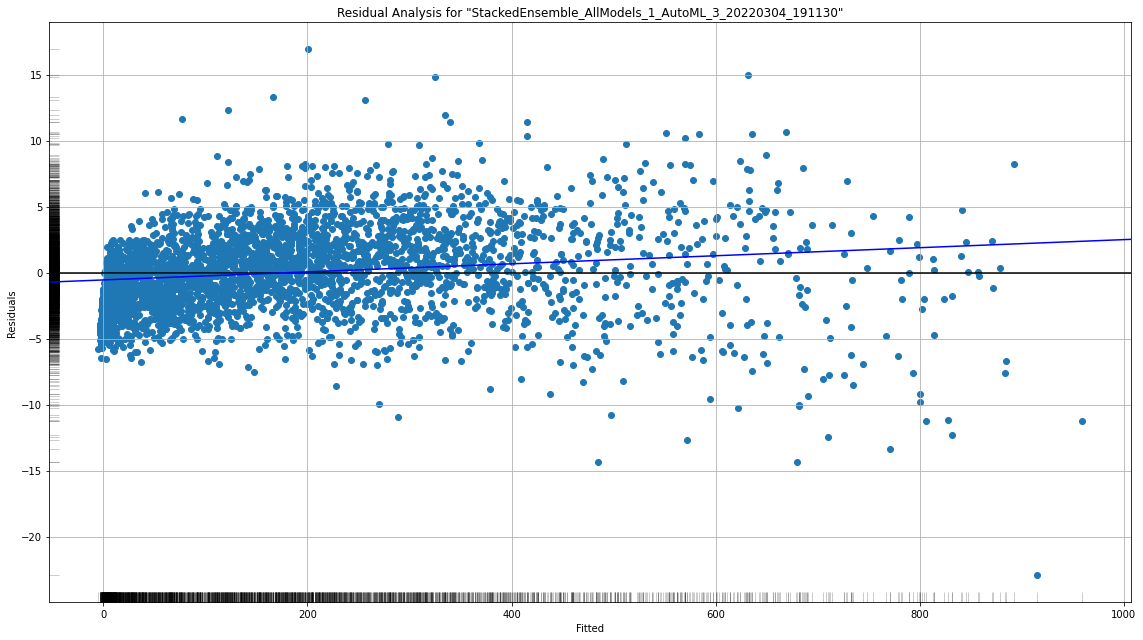

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

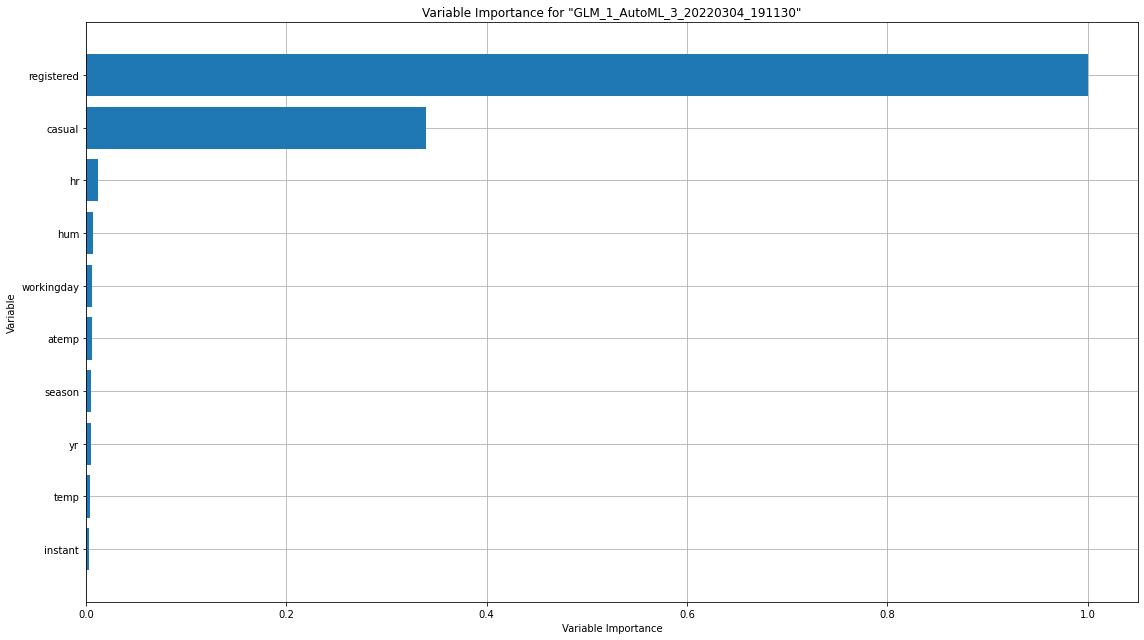

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

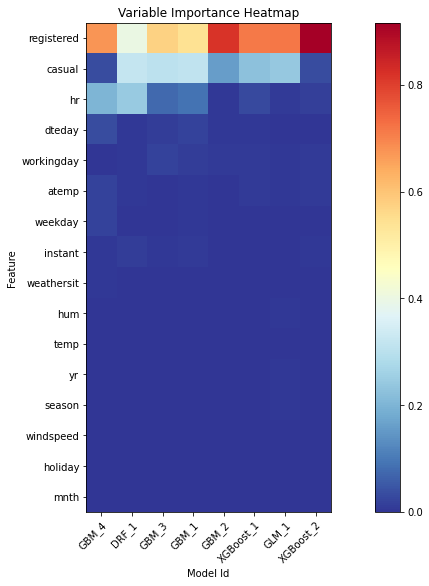

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

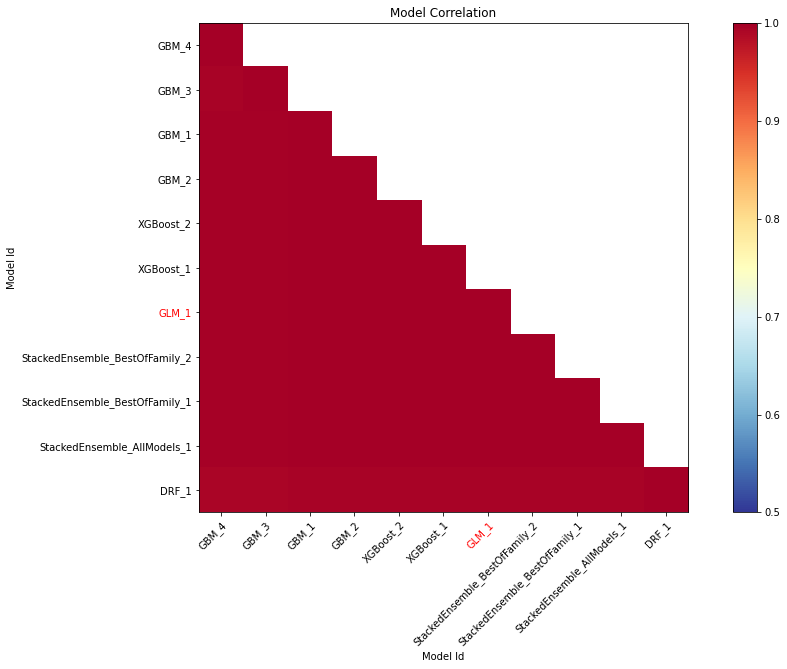

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

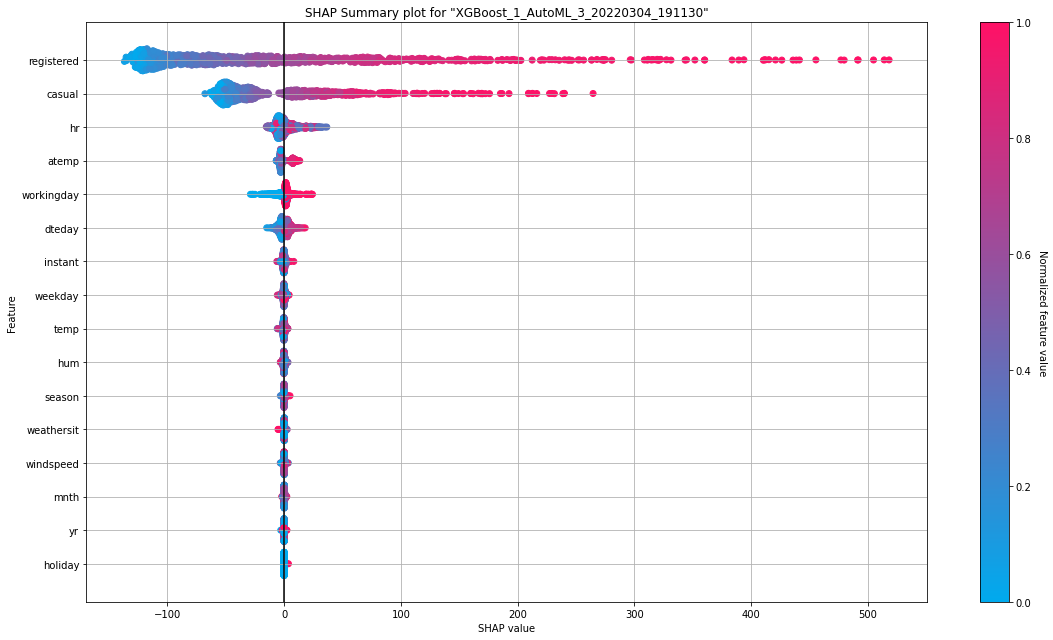

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

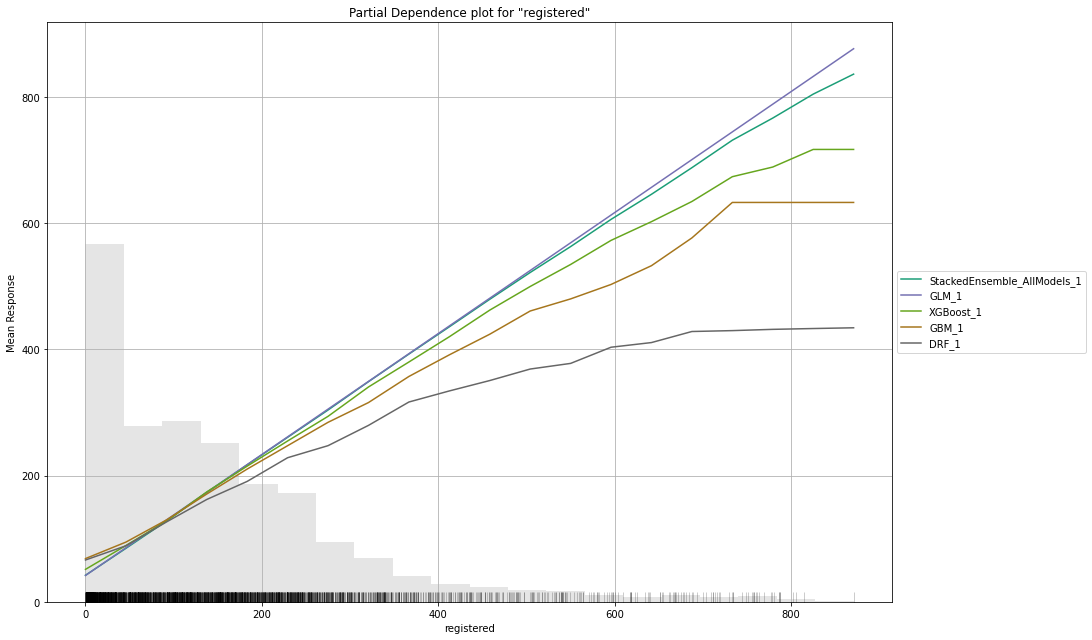

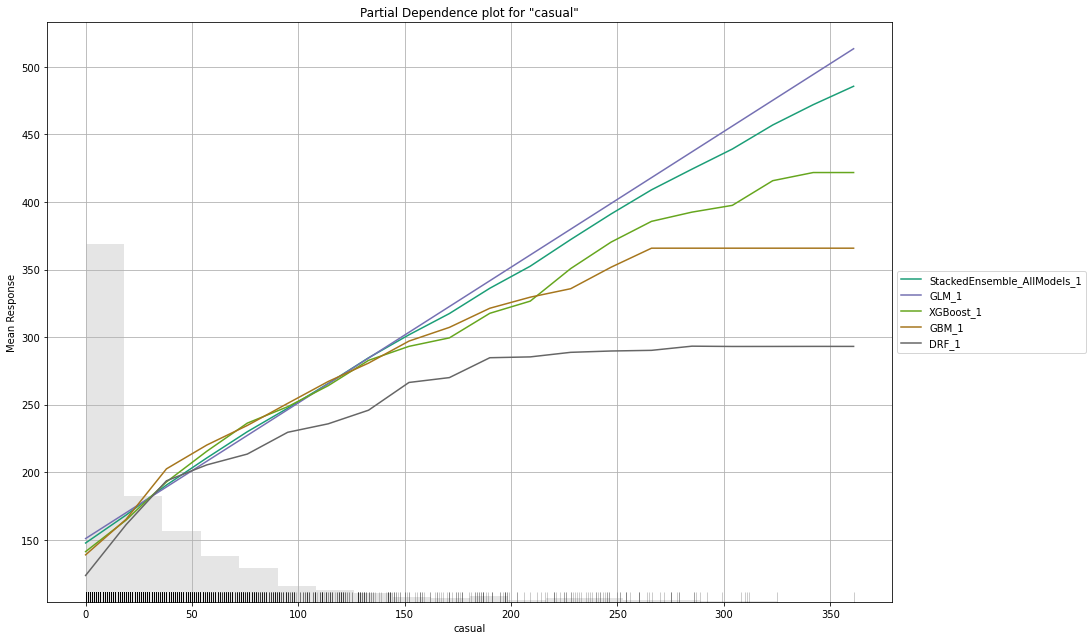

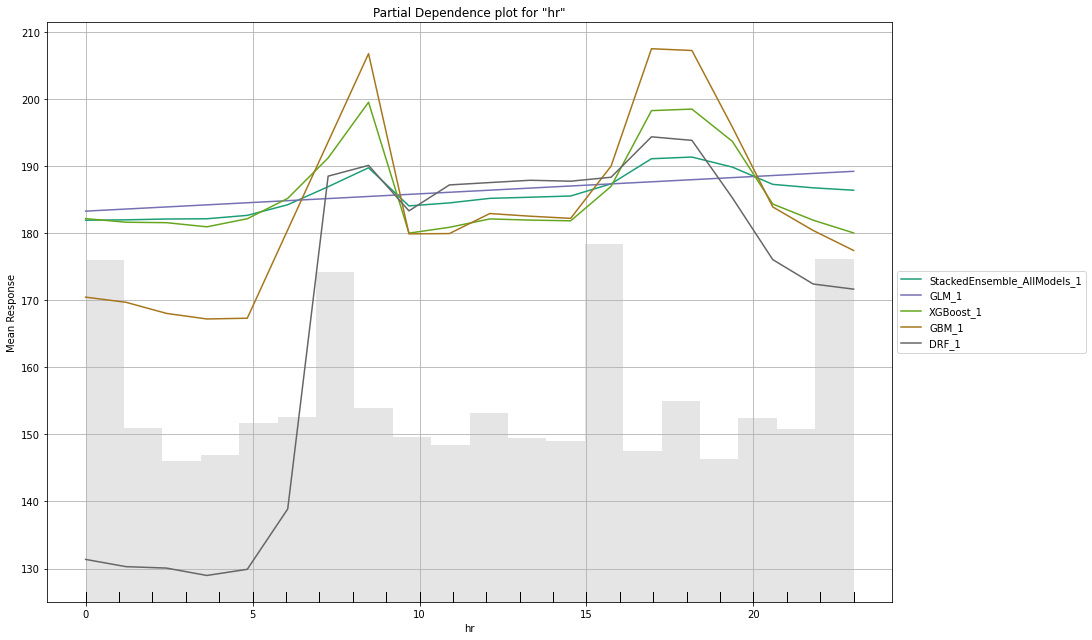

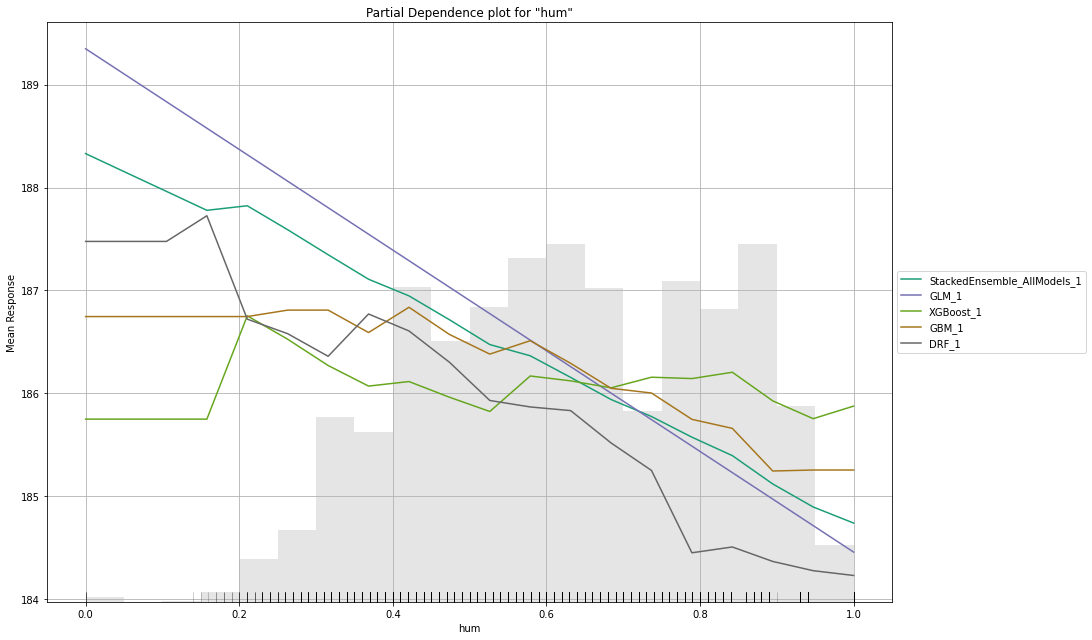

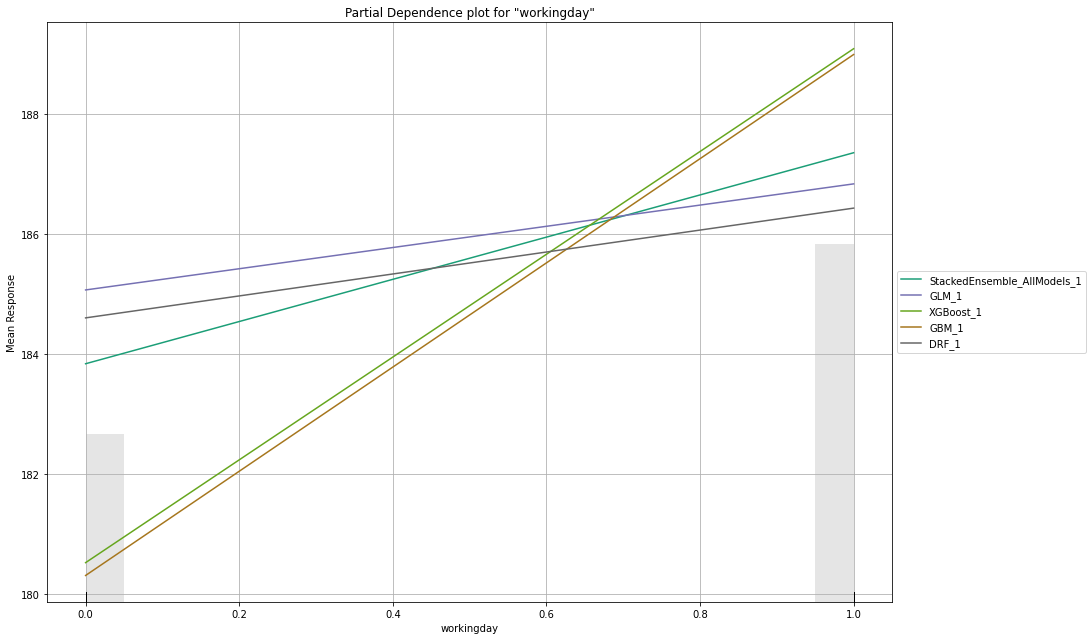

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

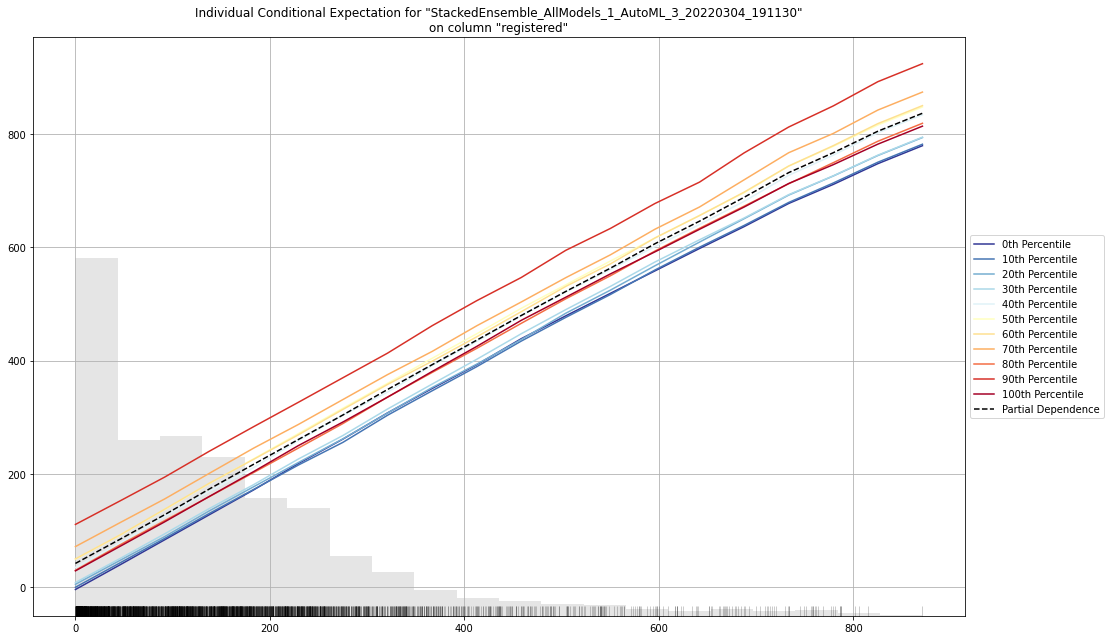

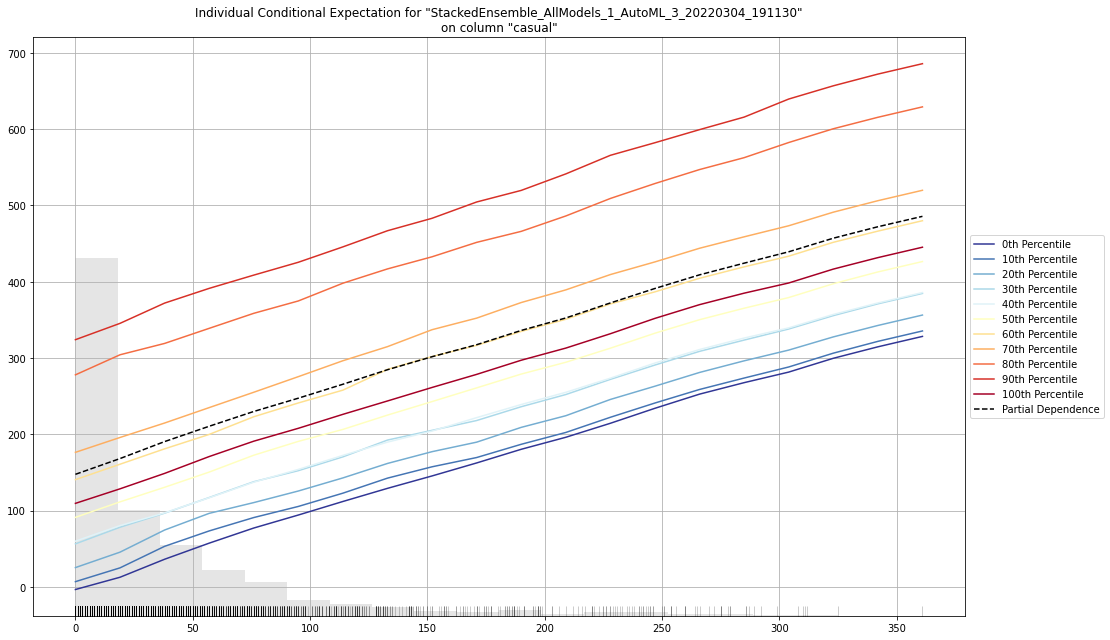

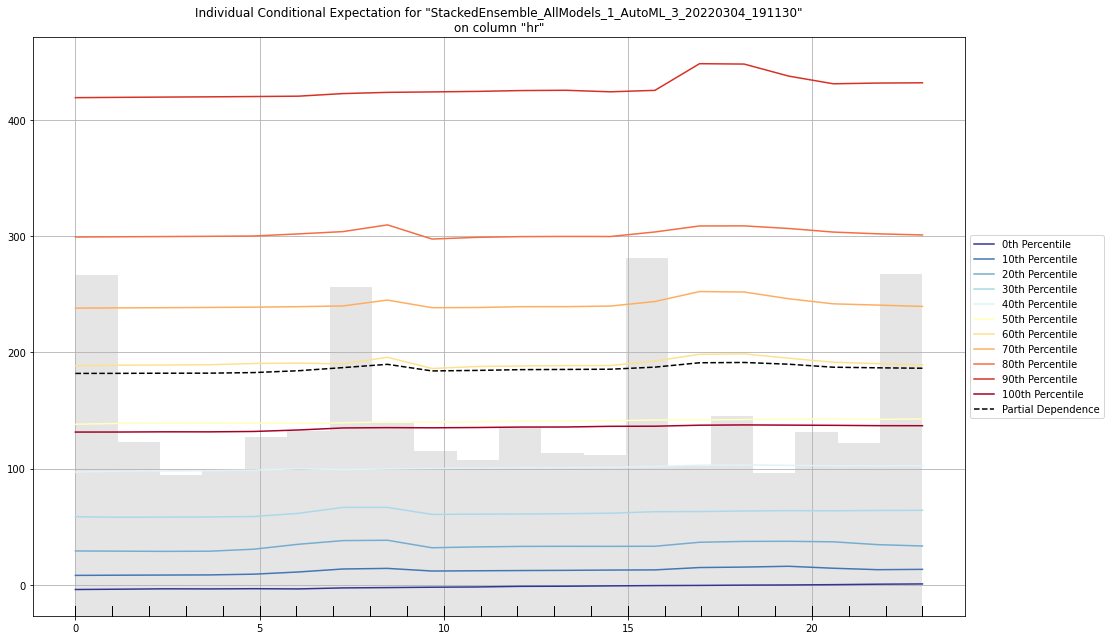

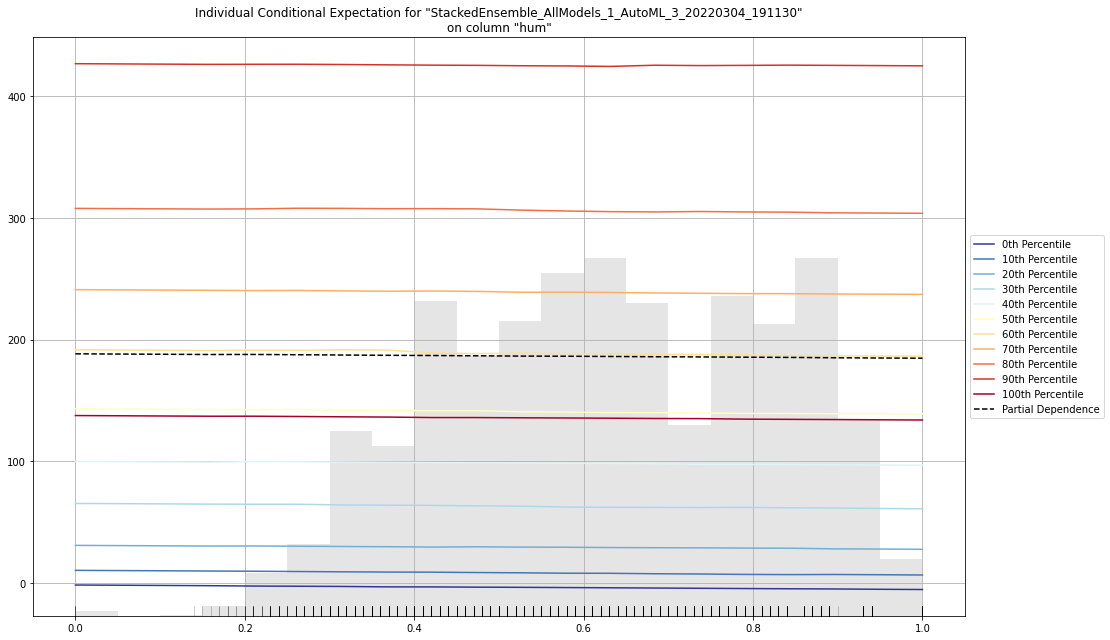

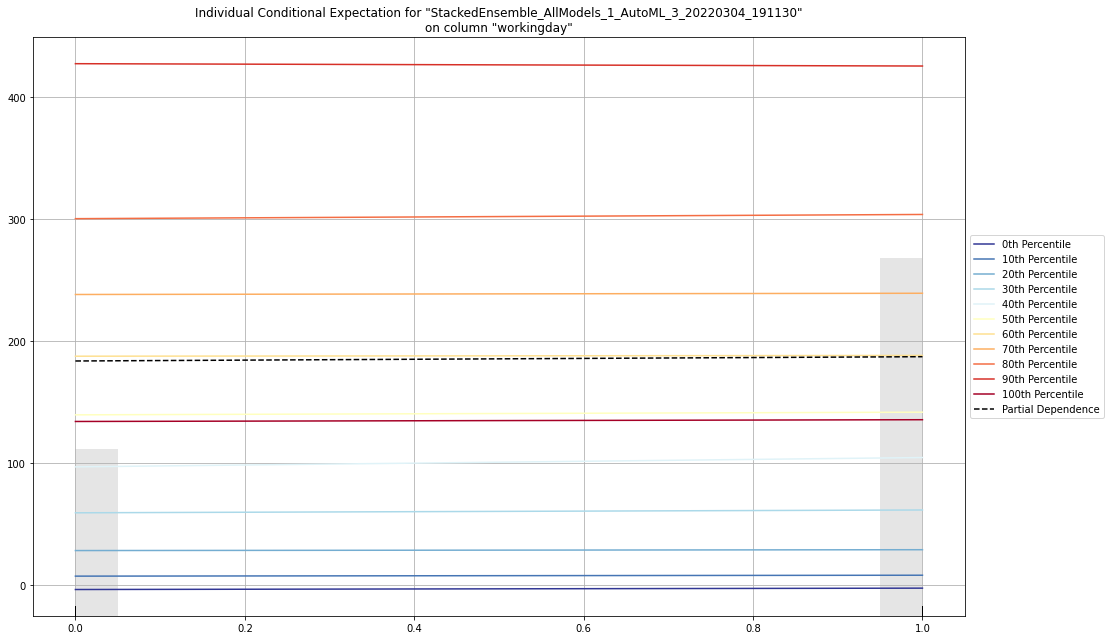

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

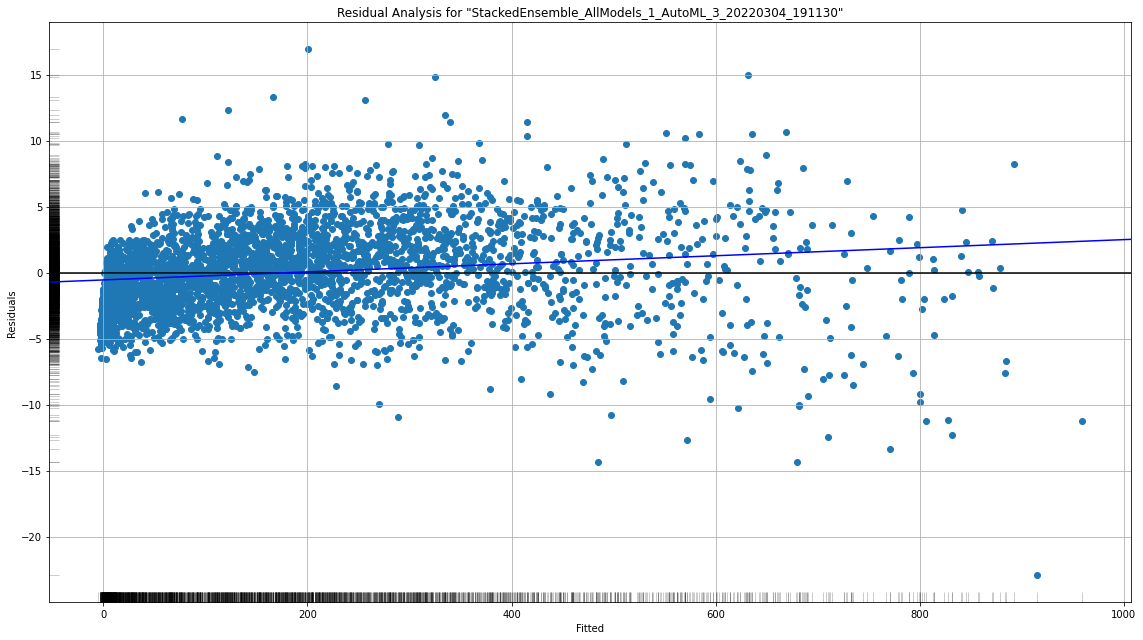

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

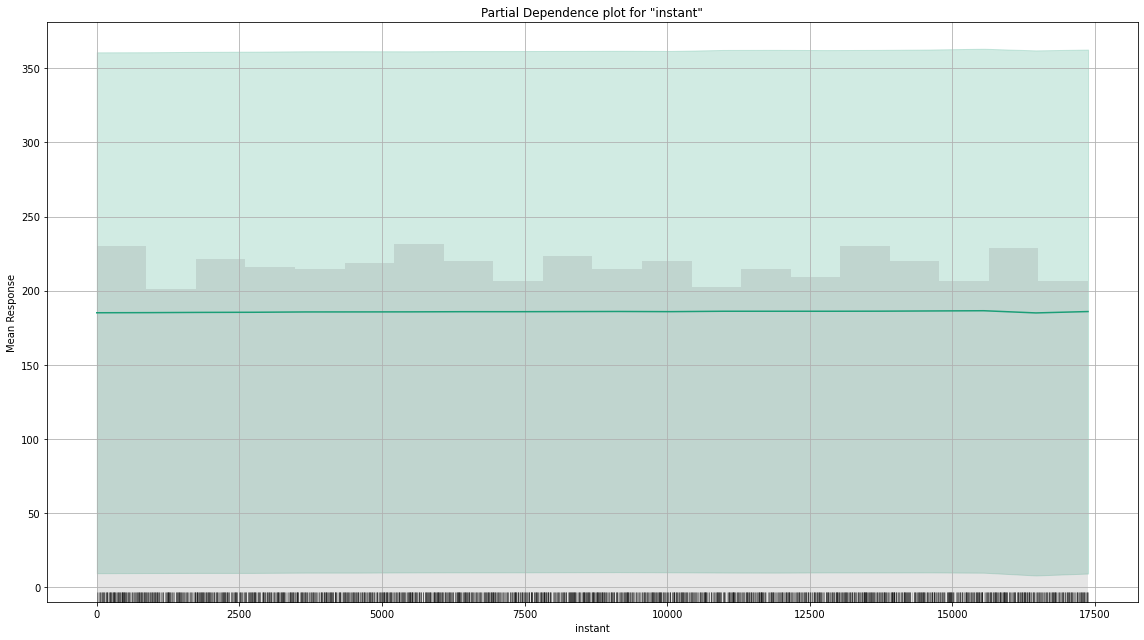

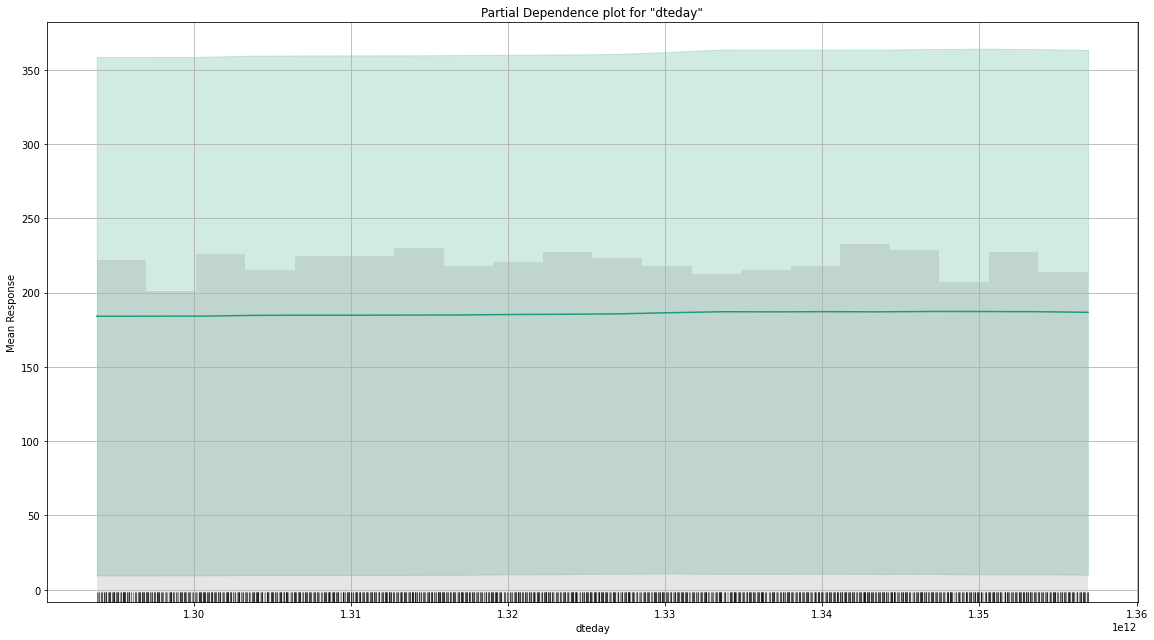

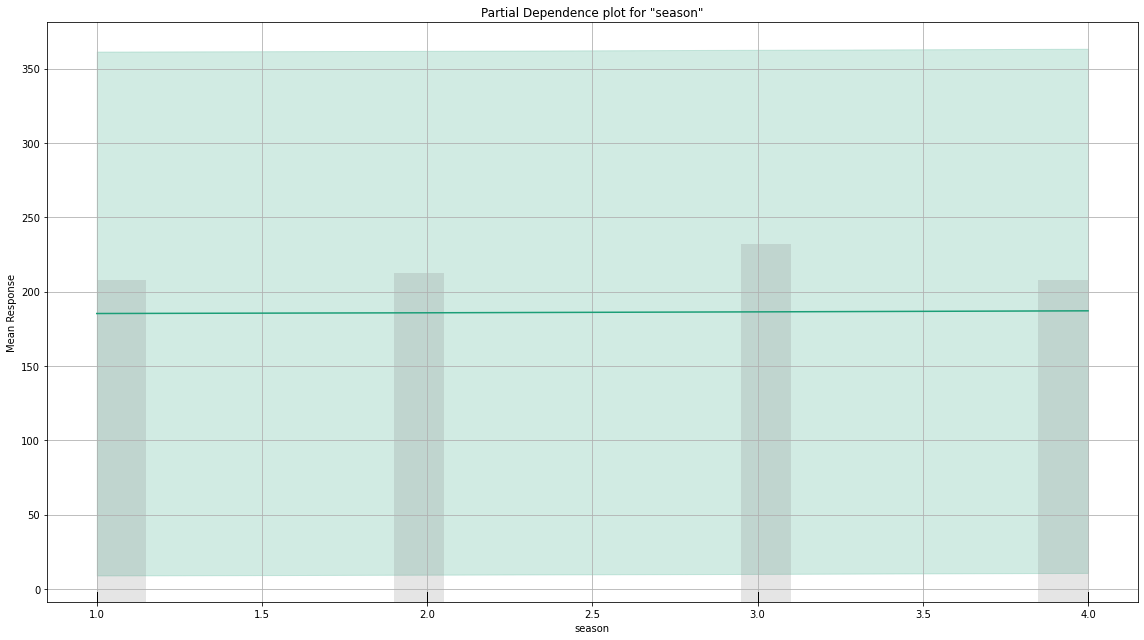

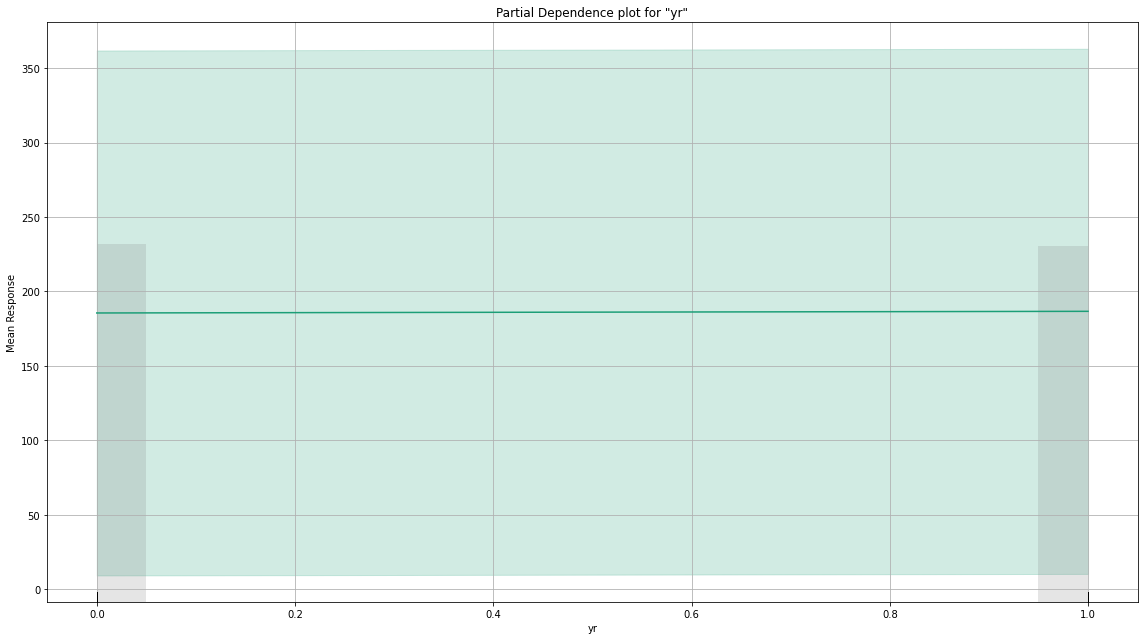

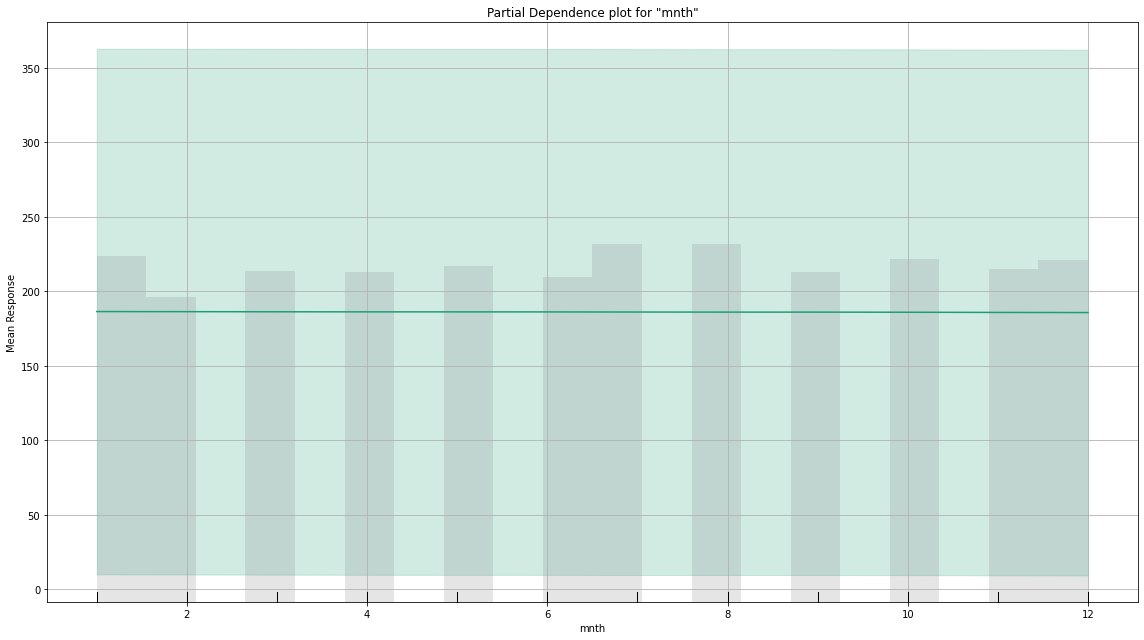

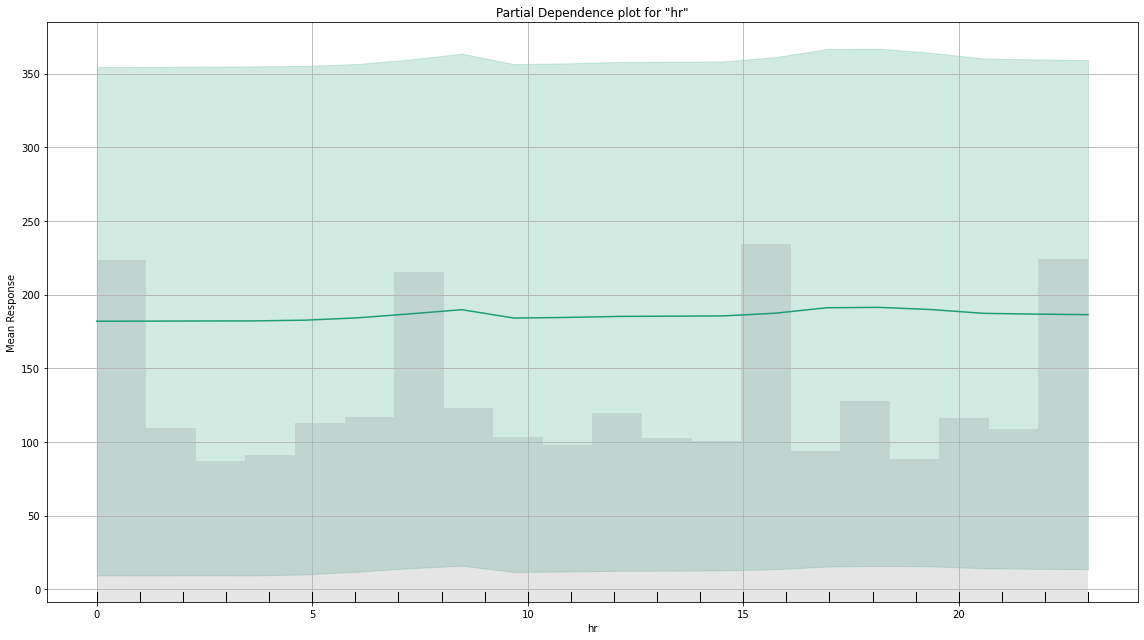

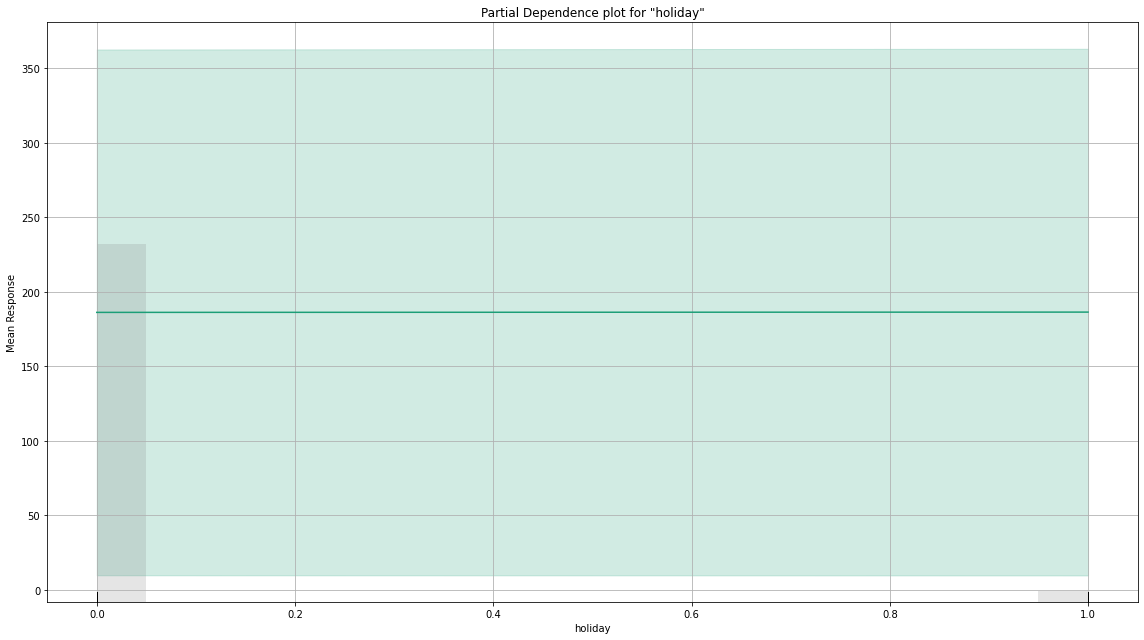

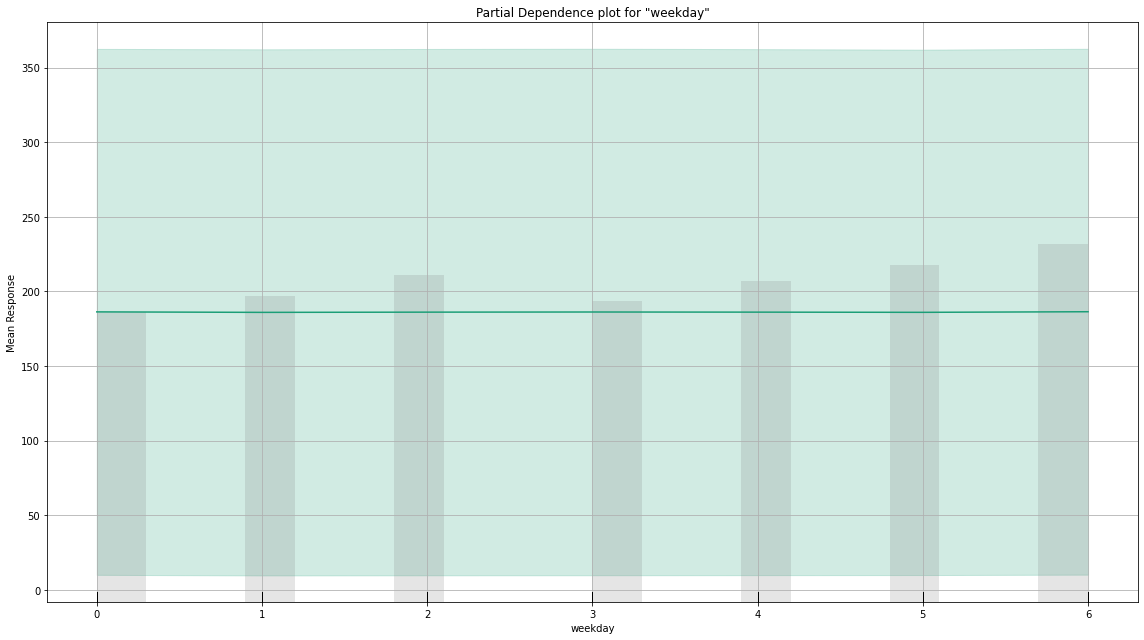

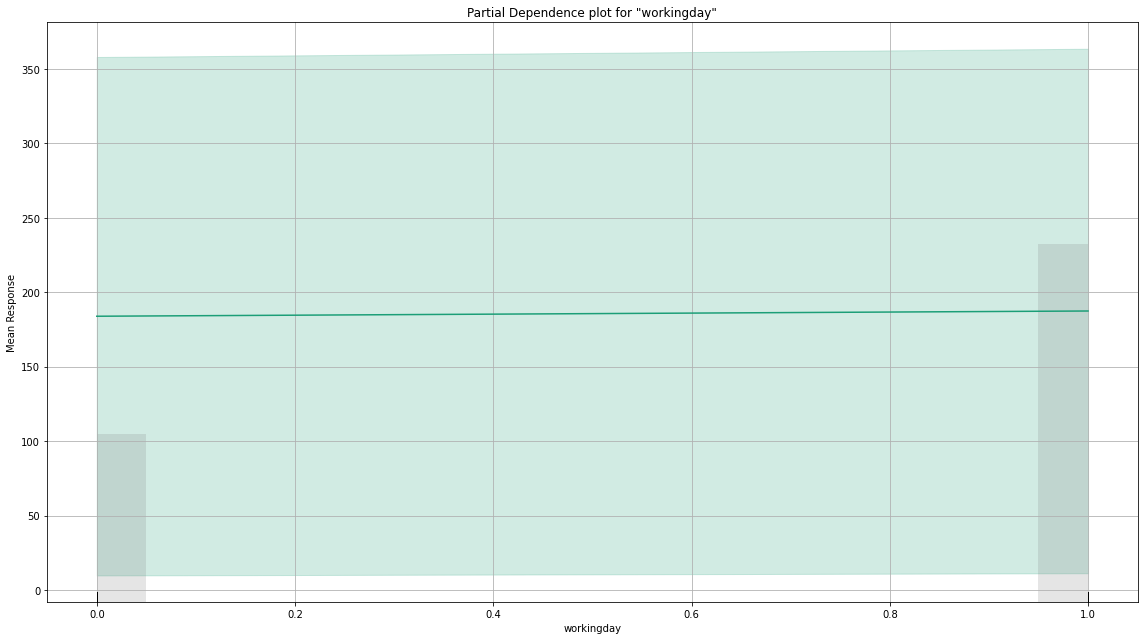

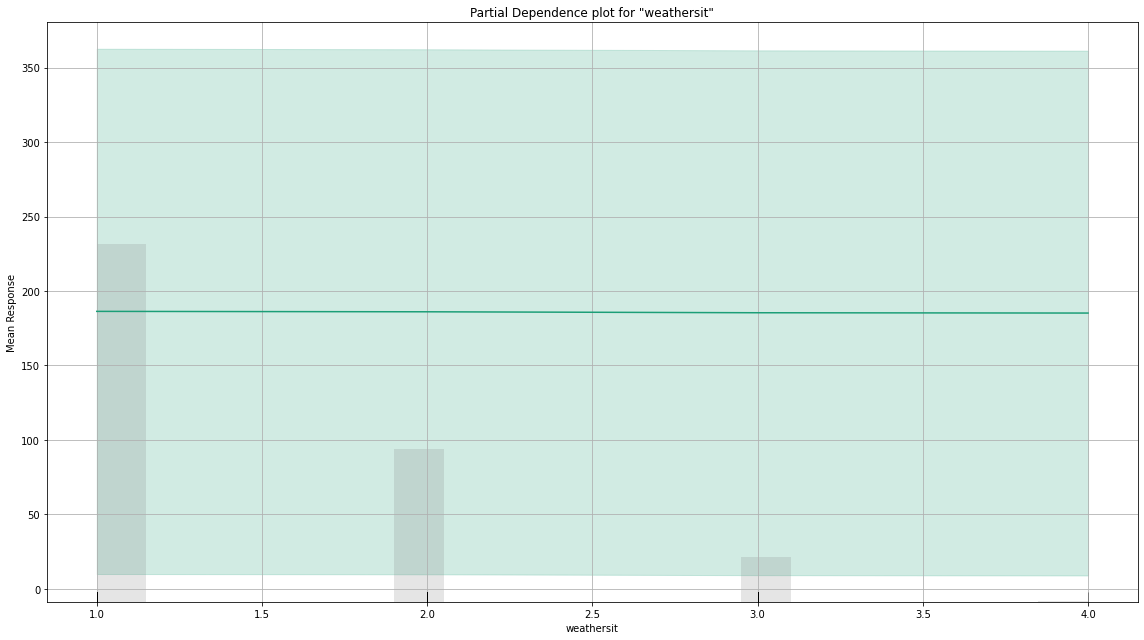

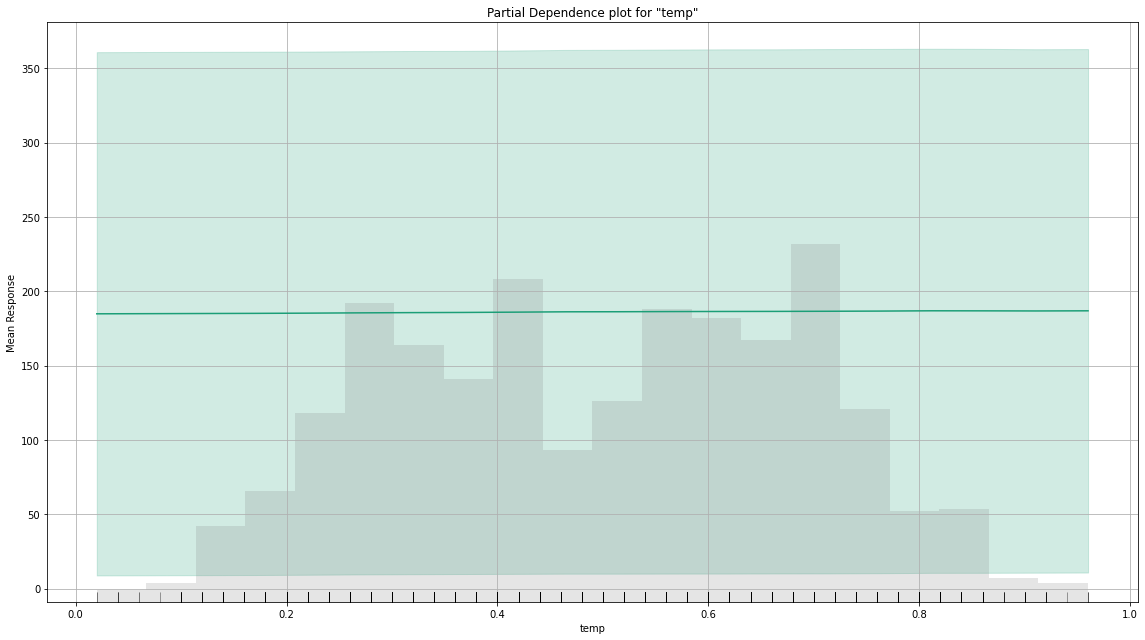

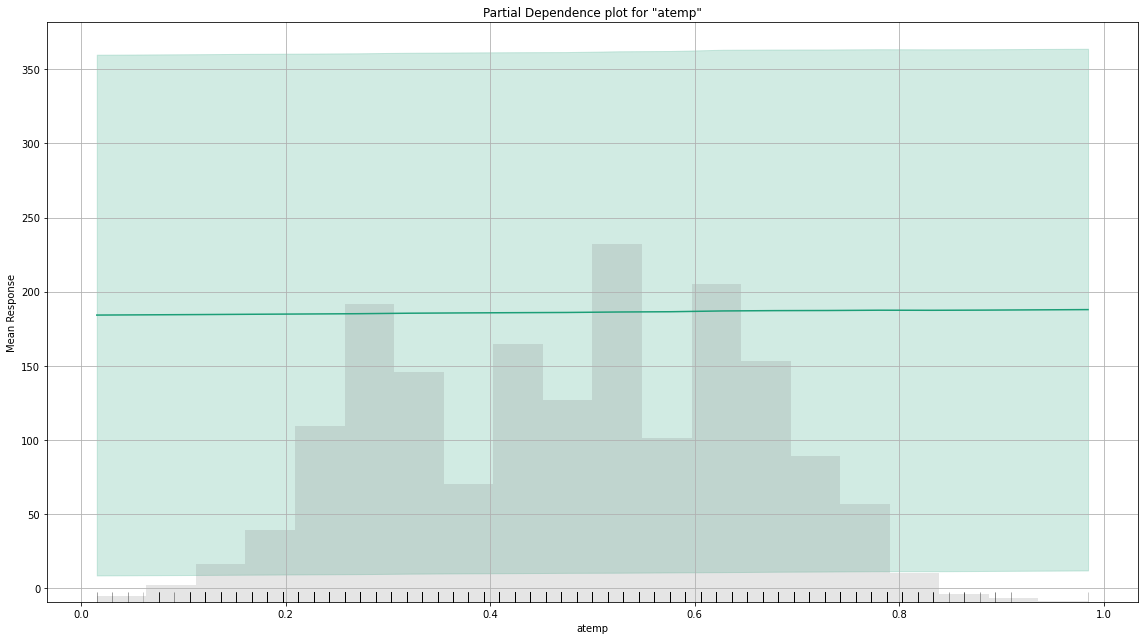

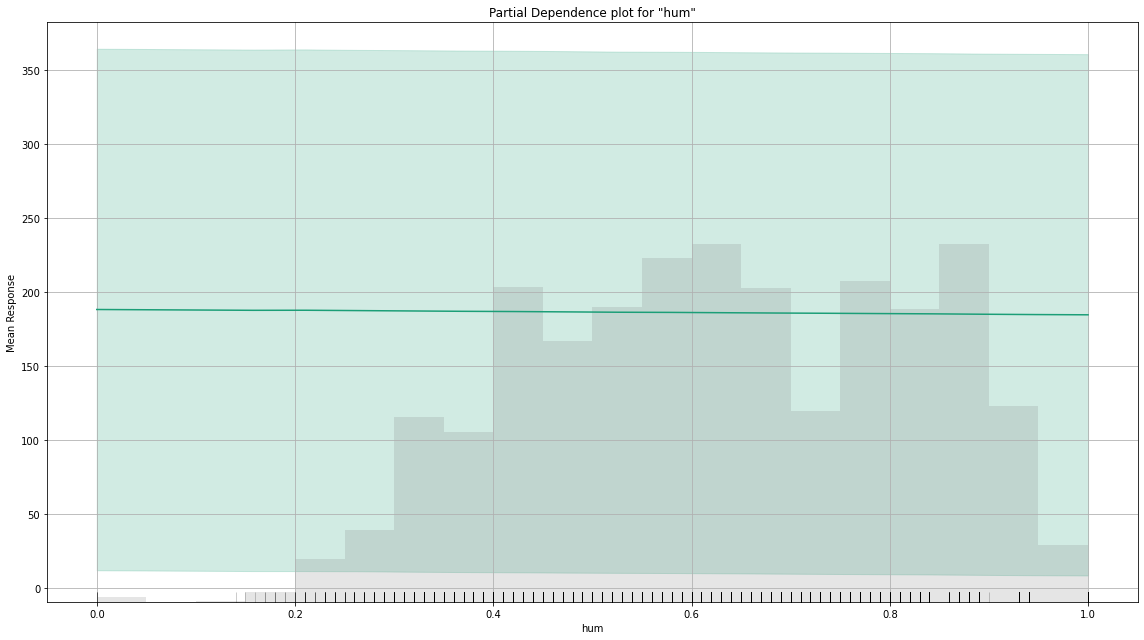

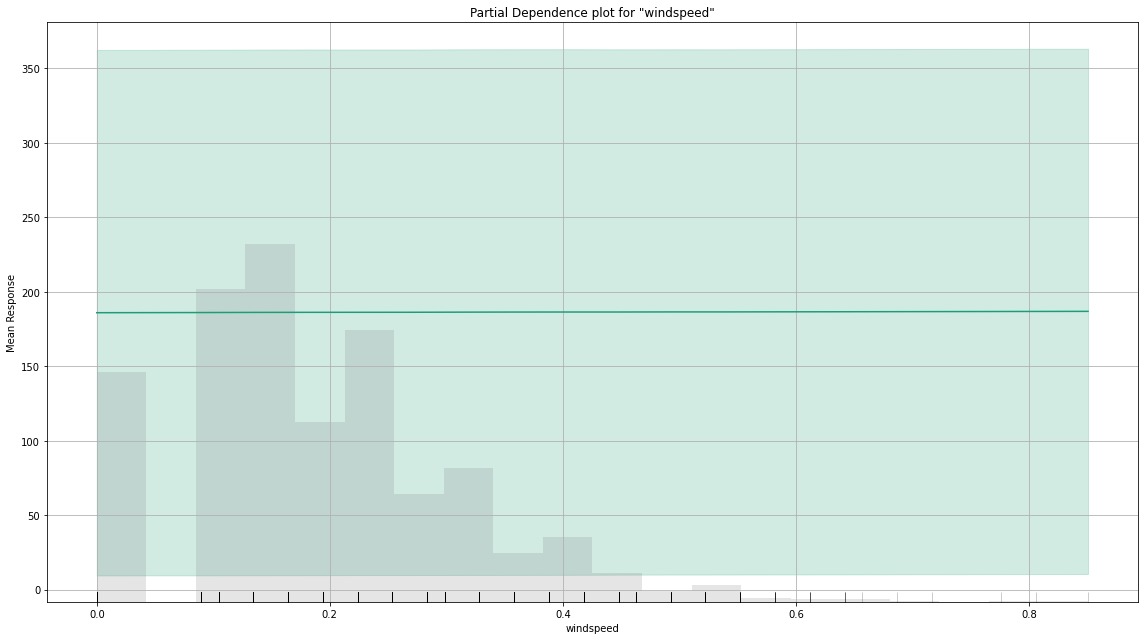

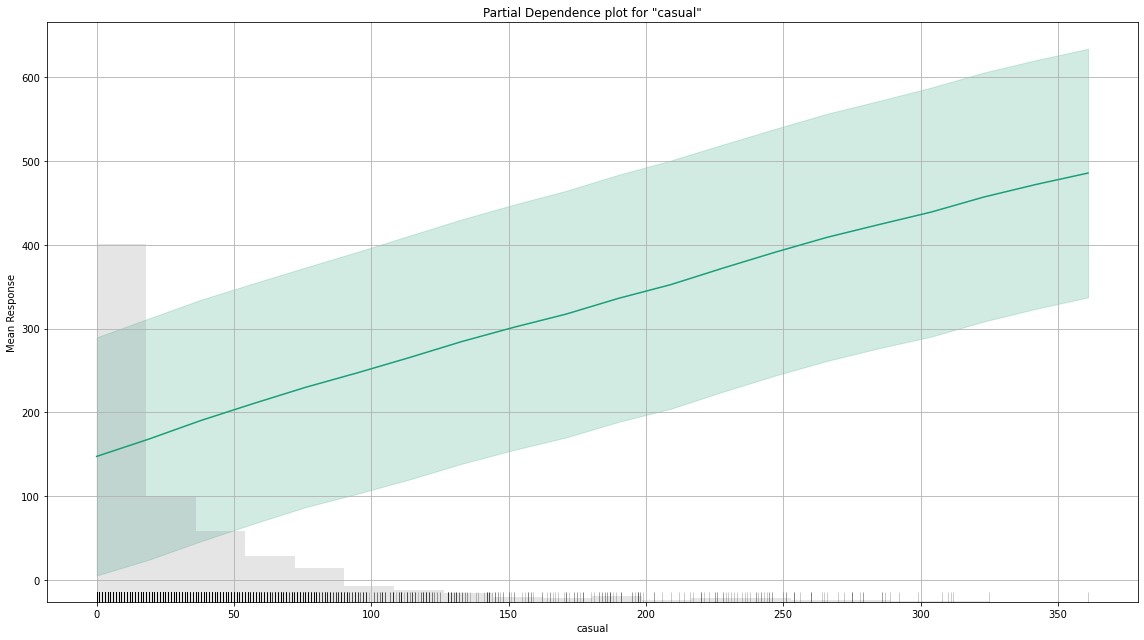

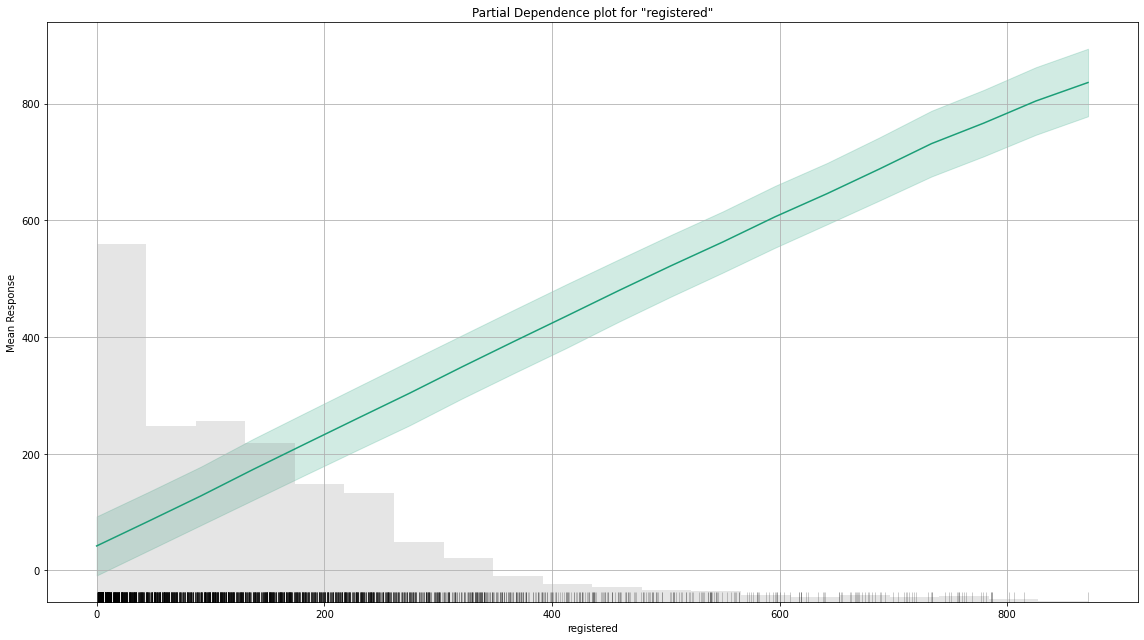

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

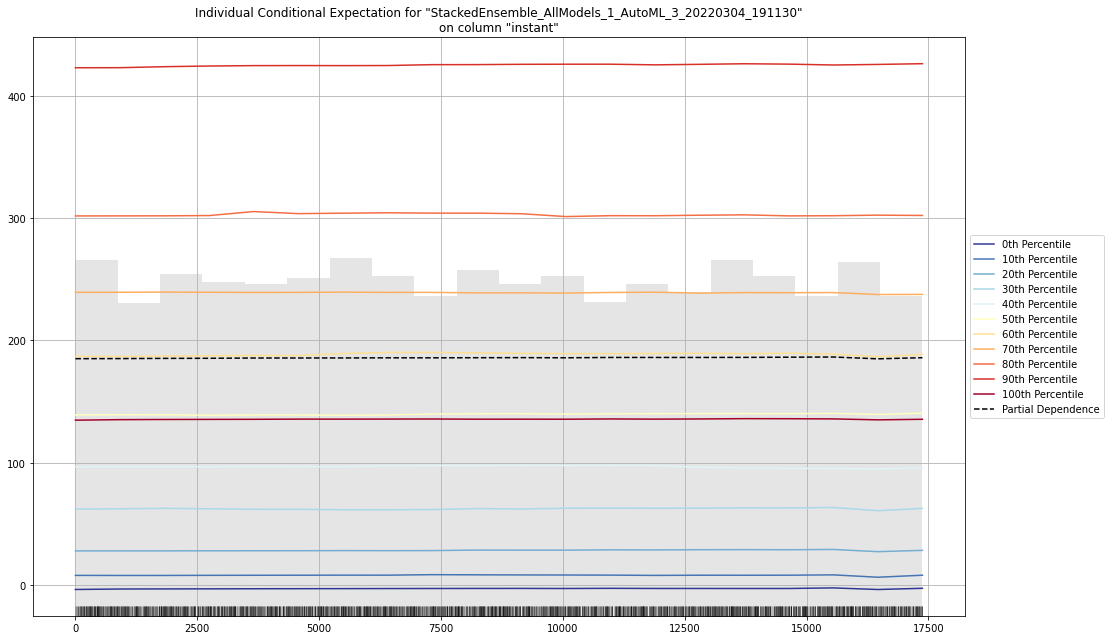

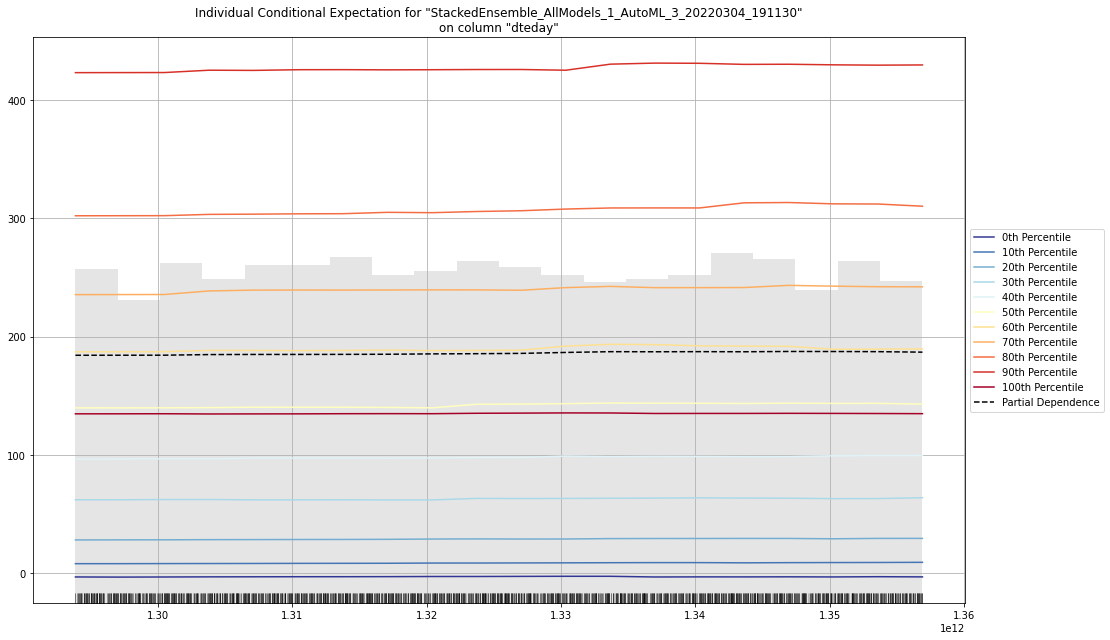

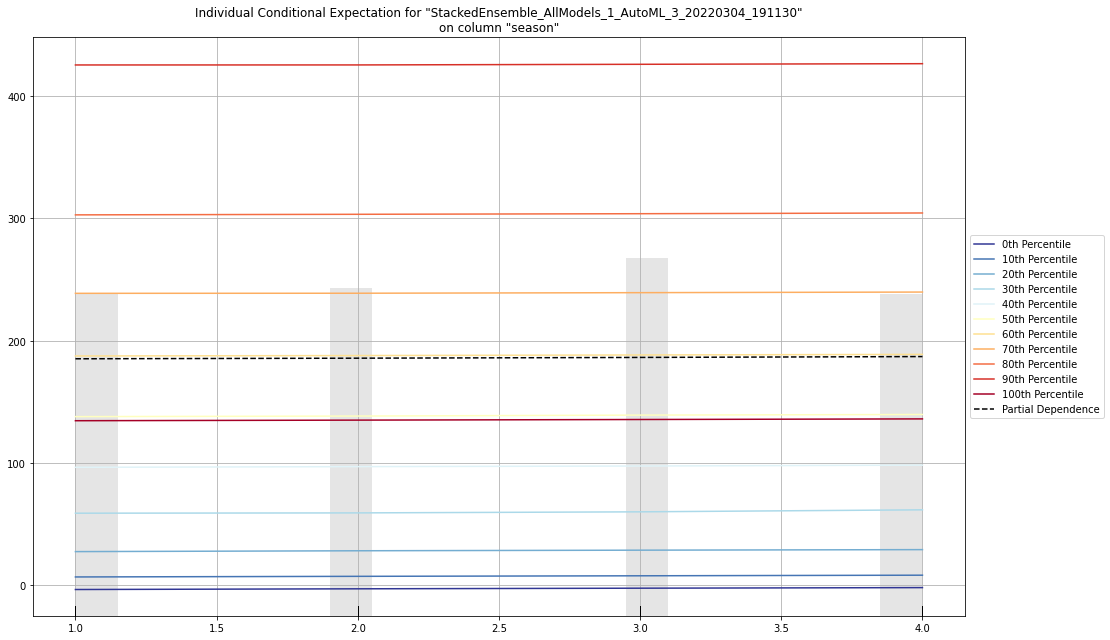

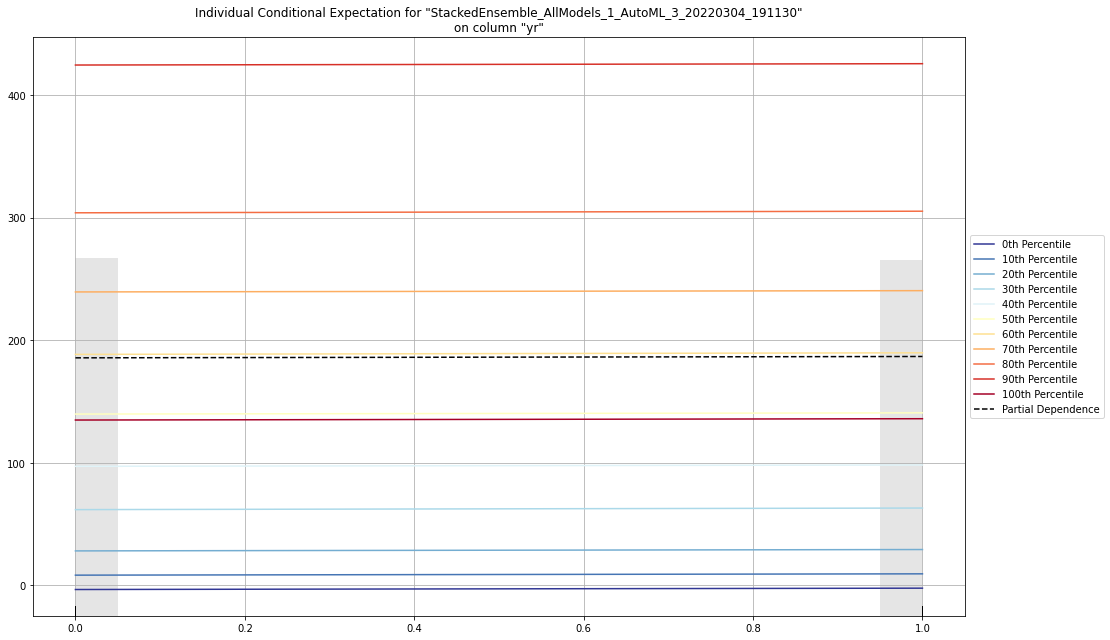

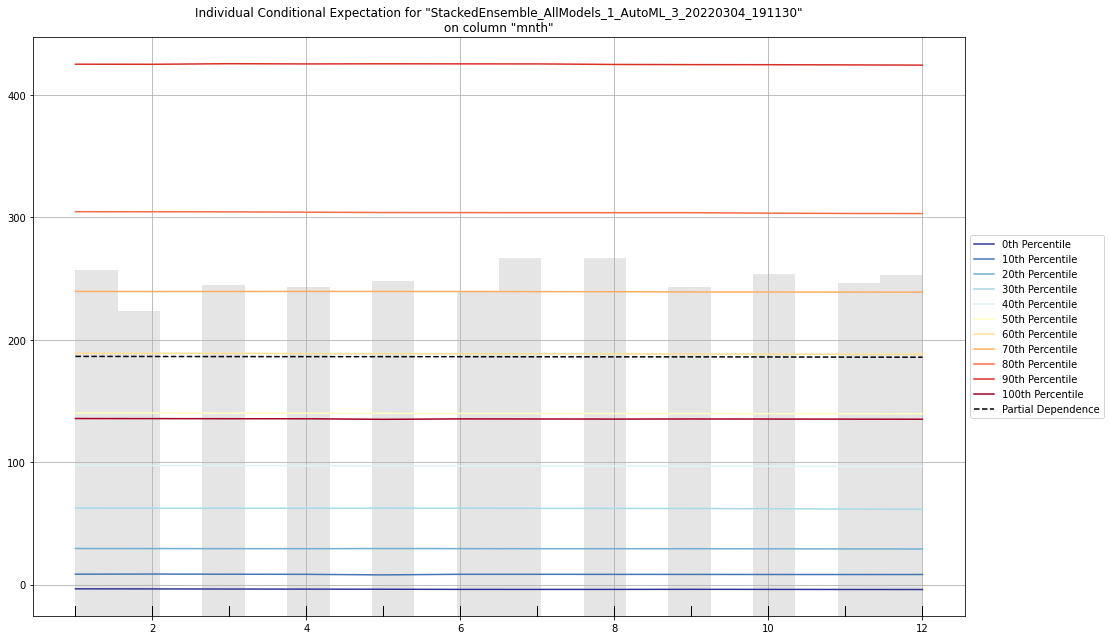

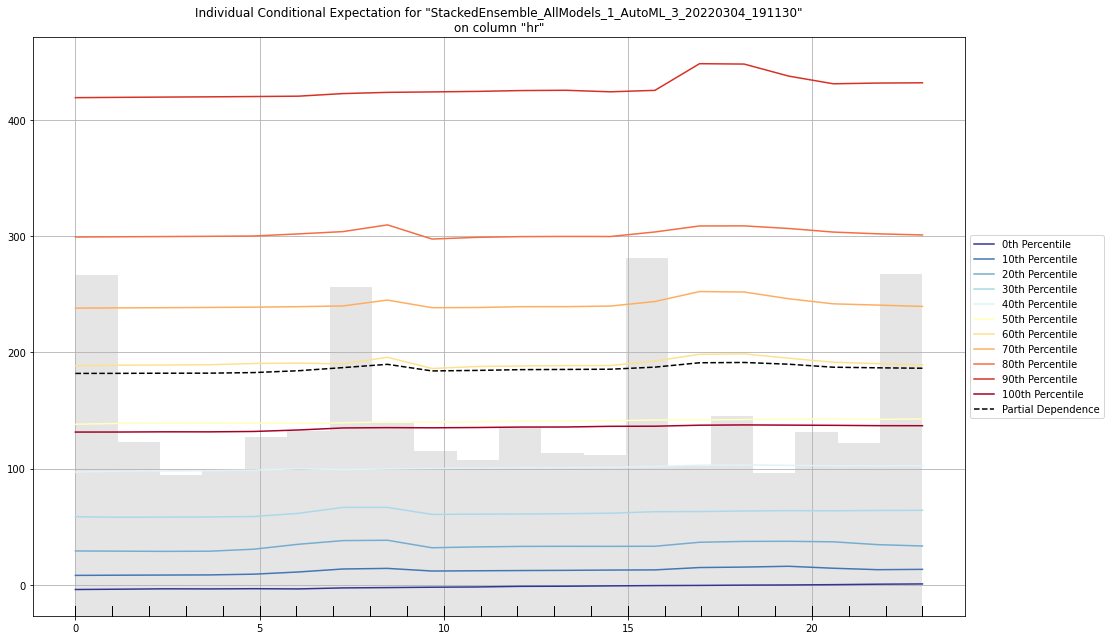

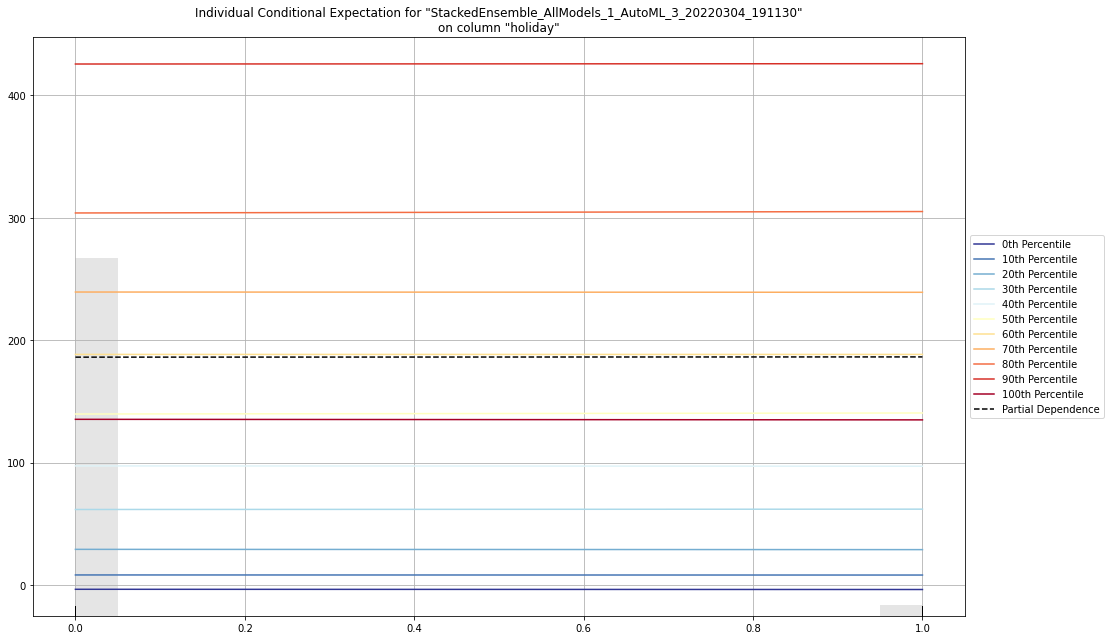

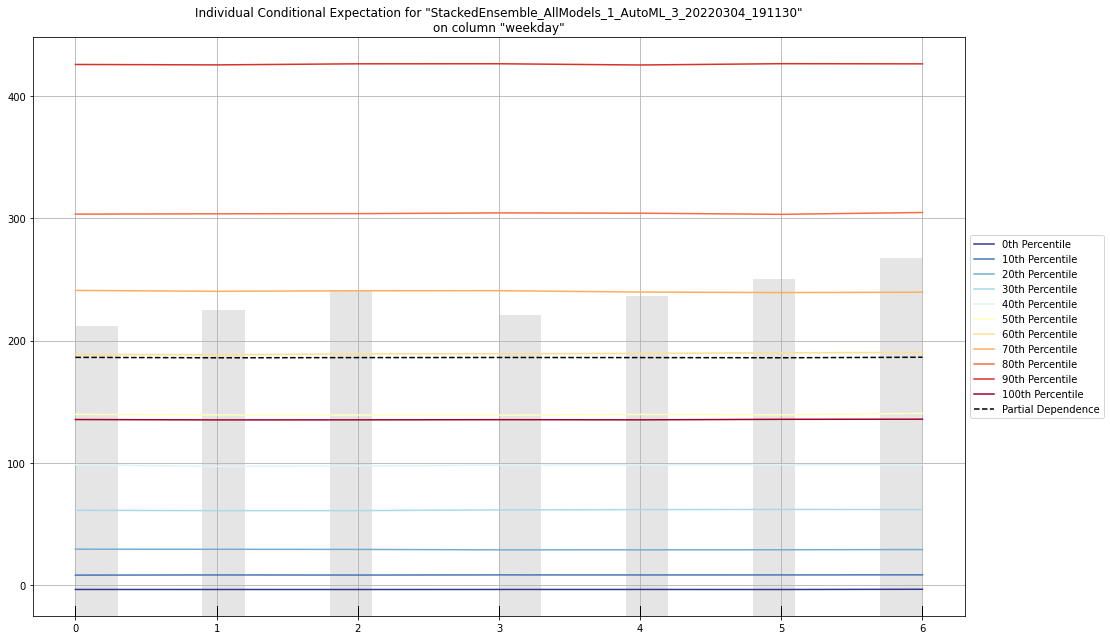

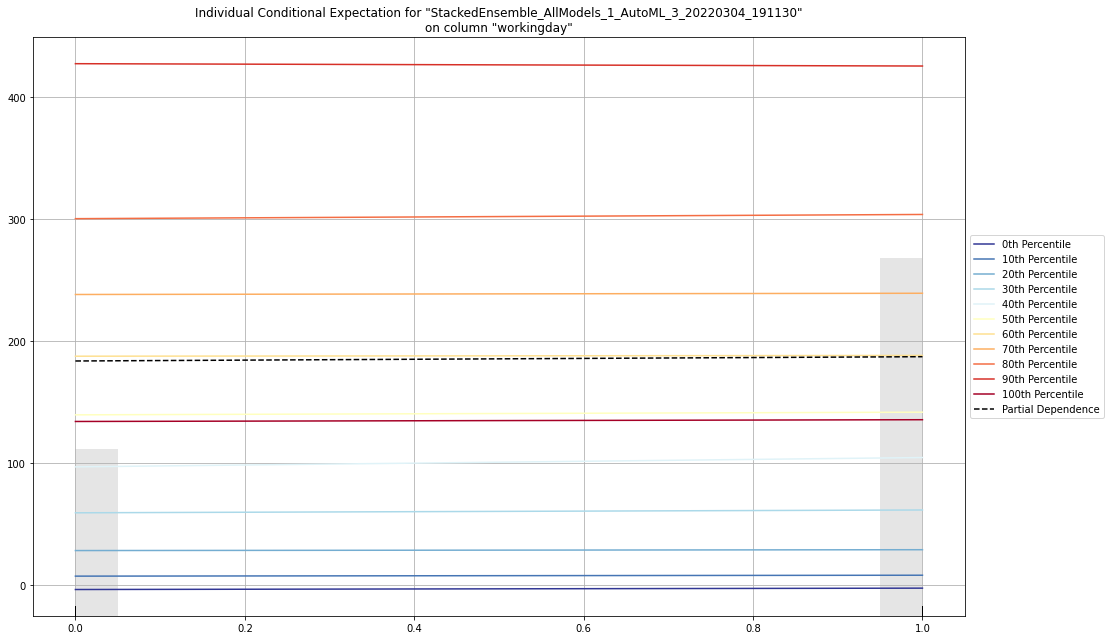

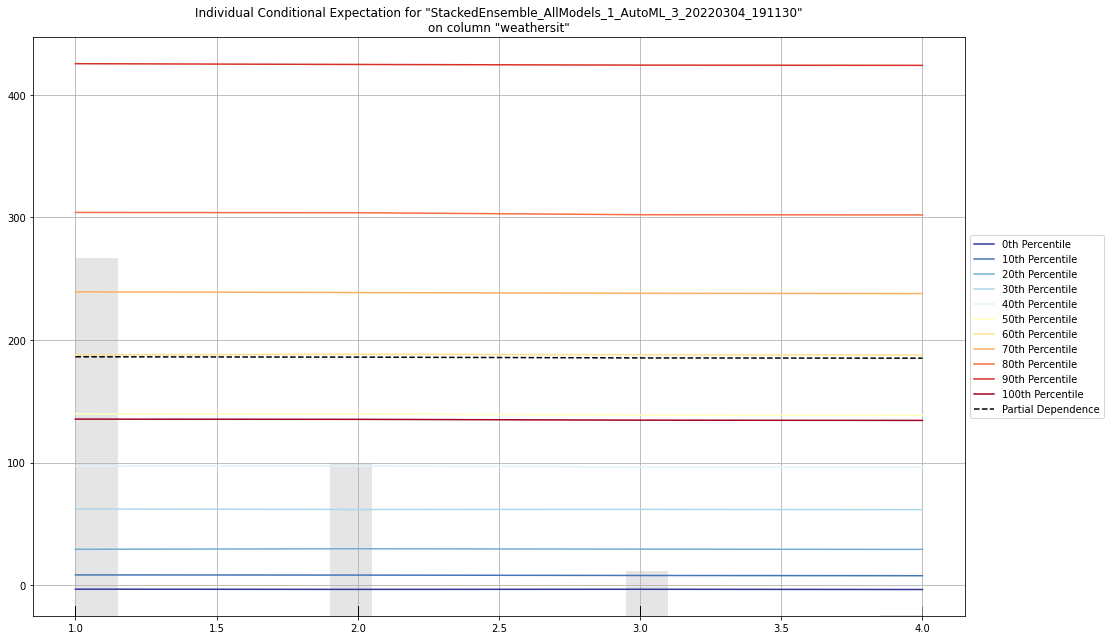

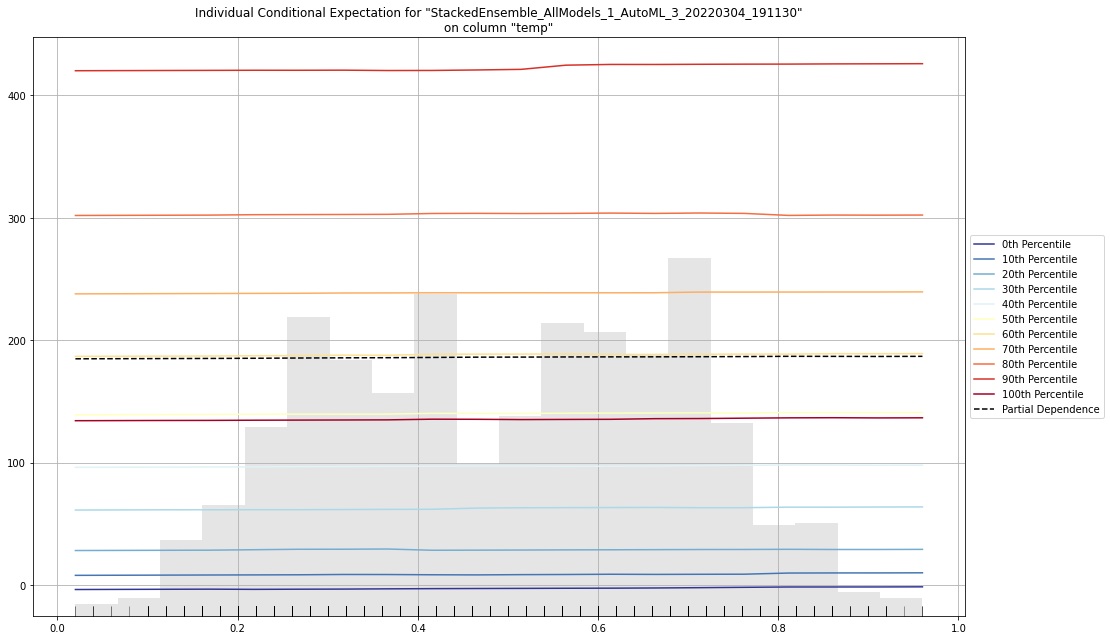

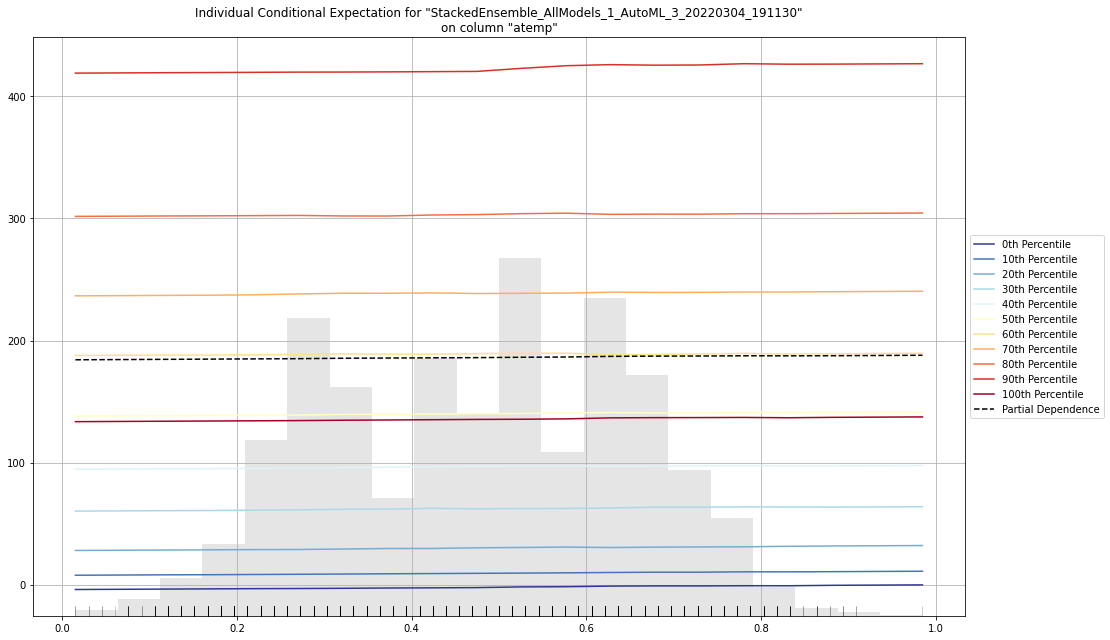

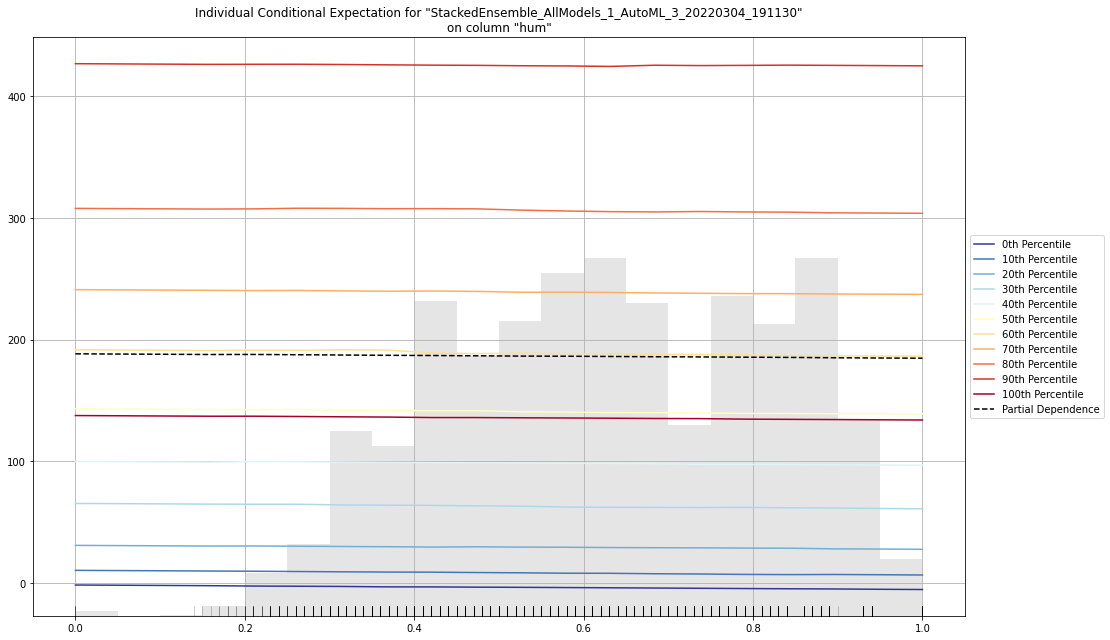

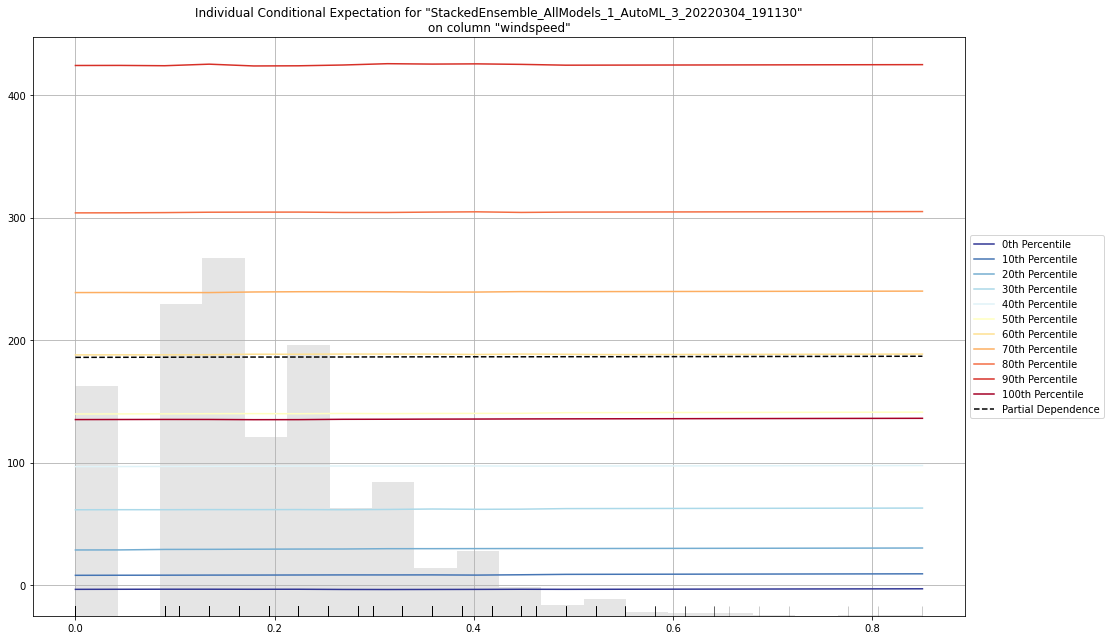

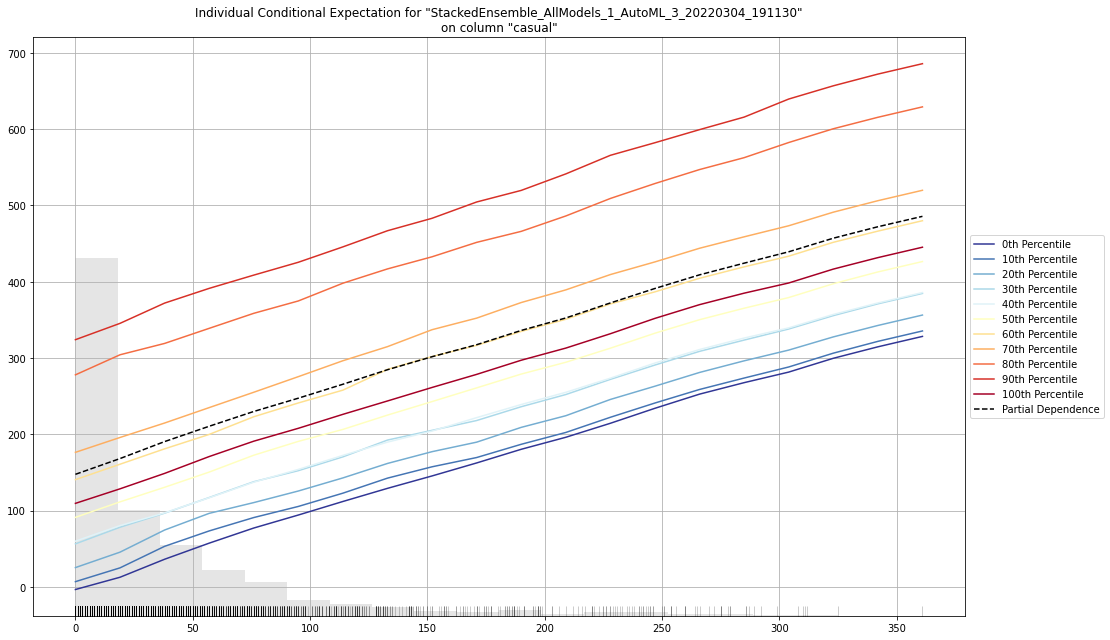

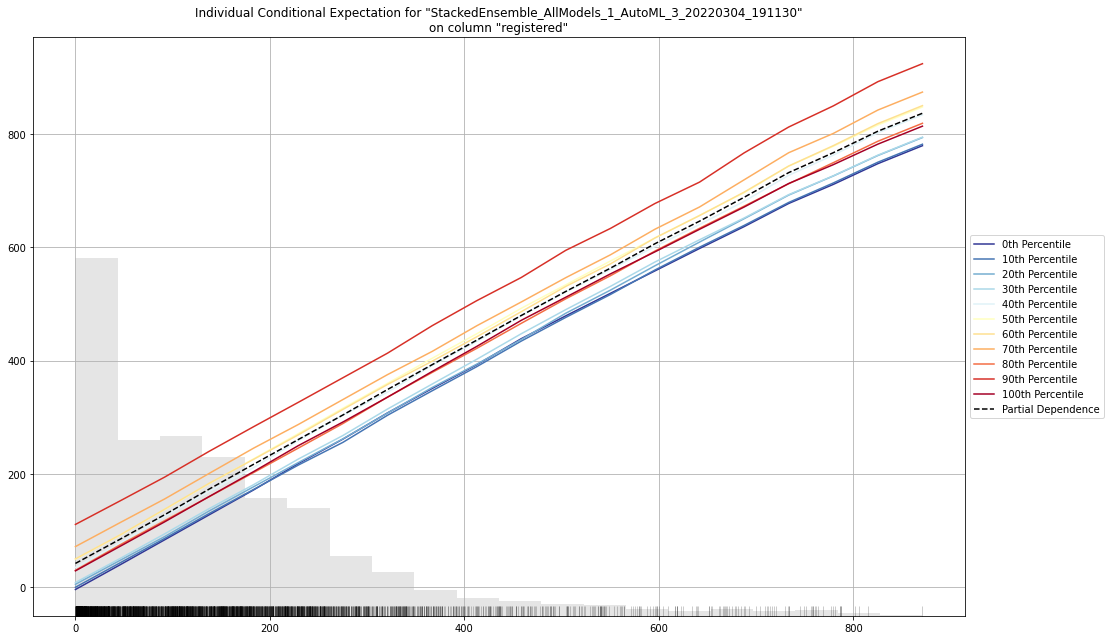

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import data
f = "/content/hour.csv"
df1 = h2o.import_file(f)

# Reponse column
y = "cnt"

# Split into train & test
splits = df1.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

# Explain a generic list of models
# use h2o.explain as follows:
# exl = h2o.explain(model_list, test)

#       1. loc             : numeric % McCabe's line count of code
#       2. v(g)            : numeric % McCabe "cyclomatic complexity"
#       3. ev(g)           : numeric % McCabe "essential complexity"
#       4. iv(g)           : numeric % McCabe "design complexity"
#       5. n               : numeric % Halstead total operators + operands
#       6. v               : numeric % Halstead "volume"
#       7. l               : numeric % Halstead "program length"
#       8. d               : numeric % Halstead "difficulty"
#       9. i               : numeric % Halstead "intelligence"
#      10. e               : numeric % Halstead "effort"
#      11. b               : numeric % Halstead 
#      12. t               : numeric % Halstead's time estimator
#      13. lOCode          : numeric % Halstead's line count
#      14. lOComment       : numeric % Halstead's count of lines of comments
#      15. lOBlank         : numeric % Halstead's count of blank lines
#      16. lOCodeAndComment: numeric
#      17. uniq_Op         : numeric % unique operators
#      18. uniq_Opnd       : numeric % unique operands
#      19. total_Op        : numeric % total operators
#      20. total_Opnd      : numeric % total operands
#      21: branchCount     : numeric % of the flow graph
#      22. defects         : {false,true} % module has/has not one or more 
#                                         % reported defects


## 6. Interpretation for hourly dataset

Interpretation for hourly dataset

1. Ensumble modeled stacked tree model give good result.

2. Registered users are using bike rent more than casual users on hourly basis.

3. Temparature,season,wether is also influencing bike rental user counts.

4. In weekday users are taking more than workingdays.

5. Instant users also influing total users count.

6. From residual analysis all are bavaving random nature except some of them

7. Humudity,holiday will impact less number of people taking rental bikes.

8. Need to tune parametres for better result.